In [1]:
##Importing 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import date, datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
import sklearn

In [2]:
##Reading the data as consumer electornics data has \N considering it as null while importing the csv file
df01 = pd.read_csv("./ConsumerElectronics.csv", na_values=['\\N', ' '])
df01.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,NaN,NaN,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,NaN,NaN,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,NaN,NaN,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,NaN,NaN,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,NaN,NaN,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [3]:
df01.shape

(1648824, 20)

In [4]:
df01.describe()

,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,sla,cust_id,pincode,product_mrp,product_procurement_sla
count,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.643920e+06,1.648824e+06,335852.000000,335853.000000,1.648824e+06,1.643920e+06,1.643920e+06,1.648824e+06,1.648824e+06
mean,2.015519e+03,6.585650e+00,2.842445e+15,1.375628e+16,2.461124e+03,1.022087e+00,4.575358,5.248299,5.687832e+00,-7.057686e+15,1.002128e+17,4.108309e+03,5.403451e+00
std,4.996557e-01,3.623351e+00,1.269134e+15,5.594598e+16,5.618842e+03,2.535318e-01,3.382710,12.521473,2.983336e+00,5.327064e+18,5.312979e+18,8.510918e+03,5.346618e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,0.000000e+00,1.000000e+00,-98.000000,-5345.000000,0.000000e+00,-9.223351e+18,-9.221830e+18,0.000000e+00,-1.000000e+00
25%,2.015000e+03,3.000000e+00,1.602589e+15,1.606725e+15,3.400000e+02,1.000000e+00,3.000000,3.000000,4.000000e+00,-4.616854e+18,-4.414802e+18,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611825e+15,2.619185e+15,7.500000e+02,1.000000e+00,4.000000,5.000000,6.000000e+00,-1.738055e+16,1.240911e+17,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610614e+15,4.397706e+15,1.999000e+03,1.000000e+00,6.000000,7.000000,7.000000e+00,4.603580e+18,4.786651e+18,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,2.269470e+05,5.000000e+01,238.000000,278.000000,1.006000e+03,9.223362e+18,9.222980e+18,2.999990e+05,1.000000e+03


In [5]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1643920 non-null  float64
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    335852 non-null   float64
 9   deliverycdays                    335853 non-null   float64
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [6]:
# Find the unique number of values for each variable
df01.nunique()

fsn_id                               21219
order_date                         1155192
Year                                     2
Month                                   12
order_id                           1501177
order_item_id                      1480765
gmv                                  12523
units                                   27
deliverybdays                          142
deliverycdays                          170
s1_fact.order_payment_type               2
sla                                     60
cust_id                            1201089
pincode                               7564
product_analytic_super_category          1
product_analytic_category                5
product_analytic_sub_category           14
product_analytic_vertical               73
product_mrp                           1929
product_procurement_sla                 17
dtype: int64

In [7]:
df01.duplicated().sum()

104843

In [8]:
print(len(df01.drop_duplicates(subset = ["order_id"], keep = False))/len(df01)*100)

83.02159599811745


In [9]:
#Therefore dropping duplicates on basis of order date,order id,order item id and number of units
df01 = df01.drop_duplicates(subset = ["order_date", "order_id", "order_item_id" ,"units"], keep = 'first', inplace = False)

In [10]:
df01.shape

(1536296, 20)

In [11]:
# Data  type conversion due to type mismatch
df01['order_datetime'] = pd.to_datetime(df01['order_date'], format='%Y-%m-%d %H:%M:%S')
#Removing sceintific notation in the following collumns
df01['cust_id']=  df01['cust_id'].apply(lambda x: '{:.0f}'.format(x))
df01['order_id']=  df01['order_id'].apply(lambda x: '{:.0f}'.format(x))
df01['order_item_id']=  df01['order_item_id'].apply(lambda x: '{:.0f}'.format(x))
df01['pincode']= df01['pincode'].apply(lambda x: '{:.0f}'.format(x))

### Data Preparation

In [12]:
# Creating order_date column from order_datetime column
df01['order_date'] = df01['order_datetime'].dt.date

In [13]:
# As its mentioned to only use the data from date range - July 2015 to June 2016, filtering out the other dates
start_date = pd.to_datetime("2015-07-01").date()
end_date = pd.to_datetime("2016-06-30").date()
df01 = df01.loc[(df01['order_date']>=start_date) & (df01['order_date']<=end_date)]

In [14]:
# need to create models aggregated weekly, a new column "order_week," which contains the week number as per the order date.
df01['order_week'] = df01['order_datetime'].dt.week
df01.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000,3419300926147000,6400.0,1,NaN,NaN,...,-1012991307785880064,-7791755829057349632,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200,1420830839915200,6900.0,1,NaN,NaN,...,-8990324579055120384,7335411490974310400,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,NaN,NaN,...,-1040442942046599936,-7477687762286570496,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,NaN,NaN,...,-7604960843527140352,-5835931638776609792,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,NaN,NaN,...,2894557208345299968,534735360997241984,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


In [15]:
# Finding and correcting null values by either dropping columns or by imputation
round(100*(df01.isnull().sum()/len(df01.index)),2).sort_values(ascending = False)

deliverybdays                      78.29
deliverycdays                      78.29
product_analytic_vertical           0.38
gmv                                 0.26
fsn_id                              0.00
pincode                             0.00
order_datetime                      0.00
product_procurement_sla             0.00
product_mrp                         0.00
product_analytic_sub_category       0.00
product_analytic_category           0.00
product_analytic_super_category     0.00
sla                                 0.00
cust_id                             0.00
order_date                          0.00
s1_fact.order_payment_type          0.00
units                               0.00
order_item_id                       0.00
order_id                            0.00
Month                               0.00
Year                                0.00
order_week                          0.00
dtype: float64

In [16]:
#Let's remove the columns deliverybdays and deliverycdays as there are 79% null values.
df01.drop(['deliverybdays', 'deliverycdays'], axis = 1, inplace = True)

# As the product_analytic_vertical column is null in some rows, we are dropping the rows as they don't serve any purpose.
df01 = df01.loc[~pd.isnull(df01['product_analytic_vertical'])]

In [17]:
round(100*(df01.isnull().sum()/len(df01.index)),2).sort_values(ascending = False)

gmv                                0.26
fsn_id                             0.00
pincode                            0.00
order_datetime                     0.00
product_procurement_sla            0.00
product_mrp                        0.00
product_analytic_vertical          0.00
product_analytic_sub_category      0.00
product_analytic_category          0.00
product_analytic_super_category    0.00
cust_id                            0.00
order_date                         0.00
sla                                0.00
s1_fact.order_payment_type         0.00
units                              0.00
order_item_id                      0.00
order_id                           0.00
Month                              0.00
Year                               0.00
order_week                         0.00
dtype: float64

In [18]:
# As gmv is our dependent variable, drop rows that have null values in the gmv column.
df01 = df01.loc[~pd.isnull(df01['gmv'])]

In [19]:
round(100*(df01.isnull().sum()/len(df01.index)),2).sort_values(ascending = False)

fsn_id                             0.0
order_date                         0.0
order_datetime                     0.0
product_procurement_sla            0.0
product_mrp                        0.0
product_analytic_vertical          0.0
product_analytic_sub_category      0.0
product_analytic_category          0.0
product_analytic_super_category    0.0
pincode                            0.0
cust_id                            0.0
sla                                0.0
s1_fact.order_payment_type         0.0
units                              0.0
gmv                                0.0
order_item_id                      0.0
order_id                           0.0
Month                              0.0
Year                               0.0
order_week                         0.0
dtype: float64

In [20]:
#checking order week along with order date for year 2016 to verify the correctness of order weeek for our analysis
df01.loc[(df01.Year == 2016) & (df01.Month==2)].loc[:,['order_date','order_week']].sort_values(by='order_date')

,order_date,order_week
649674,2016-02-01,5
782835,2016-02-01,5
662072,2016-02-01,5
689782,2016-02-01,5
652520,2016-02-01,5
...,...,...
729508,2016-02-29,9
711276,2016-02-29,9
762672,2016-02-29,9
775647,2016-02-29,9


In [21]:
# The order weeks need to be adjusted to ensure continuity from 2015 for our analysis.
def mapWeek(order_week,year):
    if((year == 2016) & (order_week <= 26)):
         return order_week+53
    else:
        return order_week

In [22]:
df01['order_week'] = df01.apply(lambda x: mapWeek(x['order_week'],x['Year']), axis = 1)
df01.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000,3419300926147000,6400.0,1,COD,5,-1012991307785880064,-7791755829057349632,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200,1420830839915200,6900.0,1,COD,7,-8990324579055120384,7335411490974310400,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1040442942046599936,-7477687762286570496,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,-5835931638776609792,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,534735360997241984,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


In [23]:
#check if we have transactions where MRP of the product is 0
len(df01.loc[df01.product_mrp == 0])

4864

In [24]:
# droping the same as it makes no sense to keep it as is serves no purpose
df01 = df01.loc[df01.product_mrp != 0]
len(df01.loc[df01.product_mrp == 0])

0

In [25]:
#checking if gmv is 0
len(df01.loc[df01.gmv == 0])

940

In [26]:
# drop the same 
df01 = df01.loc[~(df01.gmv == 0)]

In [27]:
# check if we have GMV greater than or equal to the MRP x Number of units sold and drop them if they are, as that shouldn't be practically possible
df01.loc[df01.gmv > (df01.product_mrp * df01.units)]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
511,ACCCX3SGJRUGH99Z,2015-10-06,2015,10,4409414274572400,4409414274572400,38839.0,1,Prepaid,6,-1617884985499729920,-5488422414876180480,CE,CameraAccessory,CameraAccessory,Lens,34980,0,2015-10-06 04:41:01,41
512,ACCCX3SGN4BGZGQY,2015-10-16,2015,10,2417955407141700,2417955407141700,30155.0,1,Prepaid,4,7810252194098679808,-3845369806734649856,CE,CameraAccessory,CameraAccessory,Lens,24696,1,2015-10-16 05:36:04,42
818,ACCCX3SUBDTT3GMA,2015-10-08,2015,10,1411811239304700,1411811239304700,450.0,1,COD,7,1094225417257330048,-4625296276251990016,CE,CameraAccessory,CameraAccessory,Lens,405,0,2015-10-08 23:12:54,41
819,ACCCX3SUBDTT3GMA,2015-10-22,2015,10,4423484217011800,4423484217011800,900.0,2,Prepaid,8,6138352773202599936,-6222871012507570176,CE,CameraAccessory,CameraAccessory,Lens,405,0,2015-10-22 11:23:26,43
820,ACCCX3SUBXAF4QRK,2015-10-07,2015,10,1410601049371400,1410601049371400,380.0,1,COD,5,-8616460973717909504,1948276093461929984,CE,CameraAccessory,CameraAccessory,Lens,285,-1,2015-10-07 13:31:33,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543909,VPLEAFCSDSGDN3MQ,2015-09-26,2015,9,3401056309287700,3401056309287700,2090.0,1,COD,9,1223067848602500096,-4064396209165700096,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,1990,5,2015-09-26 12:25:44,39
1543910,VPLEAFCSDSGDN3MQ,2015-09-30,2015,9,3404733643285700,3404733643285700,2090.0,1,COD,5,-5351940551013839872,-1947801225867869952,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,1990,5,2015-09-30 18:33:06,40
1543911,VPLEAFCSDSGDN3MQ,2015-09-01,2015,9,2378842904697260,2378842904749150,2090.0,1,COD,4,958094493904413952,3186507829414430208,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,1990,5,2015-09-01 22:03:47,36
1543912,VPLEAFCSDSGDN3MQ,2015-09-20,2015,9,3395898721883800,3395898721883800,2090.0,1,COD,6,1636911729380720128,-6698071009621180416,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,1990,5,2015-09-20 13:08:17,38


In [28]:
# Removing the rows where the GMV is greater than the number of units sold multiplied by the MRP of the product
df01= df01.loc[df01.gmv <= (df01.product_mrp * df01.units)]

In [29]:
#checking the shape
df01.shape

(1490019, 20)

In [30]:
df01.describe()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,order_week
count,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06
mean,2.015556e+03,6.411632e+00,2.495538e+03,1.021619e+00,5.683975e+00,4.214486e+03,5.269346e+00,5.556354e+01
std,4.968865e-01,3.690315e+00,5.677618e+03,2.504660e-01,2.998176e+00,8.686505e+03,5.209425e+01,1.354709e+01
min,2.015000e+03,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,4.900000e+01,-1.000000e+00,2.700000e+01
25%,2.015000e+03,3.000000e+00,3.390000e+02,1.000000e+00,4.000000e+00,8.000000e+02,1.000000e+00,4.400000e+01
50%,2.016000e+03,6.000000e+00,7.500000e+02,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00,5.600000e+01
75%,2.016000e+03,1.000000e+01,1.999000e+03,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00,6.700000e+01
max,2.016000e+03,1.200000e+01,2.269470e+05,5.000000e+01,1.006000e+03,2.999990e+05,1.000000e+03,7.900000e+01


In [31]:
df01['sla'].value_counts()/len(df01.index)*100

6       14.394984
5       14.179081
4       13.380970
7       12.222126
3       10.827043
8        9.393370
2        6.566426
9        5.954219
1        4.526922
10       3.502841
11       2.041518
12       1.170254
13       0.668448
0        0.356841
14       0.354492
15       0.193487
16       0.111140
17       0.053959
18       0.030872
19       0.018188
20       0.009799
21       0.006913
25       0.004899
24       0.004564
22       0.004497
23       0.003893
26       0.003758
27       0.002886
28       0.002349
30       0.002081
29       0.001342
31       0.000805
32       0.000604
38       0.000470
35       0.000470
33       0.000403
42       0.000336
39       0.000336
34       0.000268
36       0.000201
61       0.000201
44       0.000201
41       0.000201
40       0.000201
45       0.000134
37       0.000134
184      0.000067
1004     0.000067
1006     0.000067
145      0.000067
46       0.000067
175      0.000067
52       0.000067
51       0.000067
60       0.000067
43       0

In [32]:
len(df01.loc[df01.sla>30])/len(df01)

5.8388517193404915e-05

In [33]:
# 0.0058% of the data has sla more than 30 days Therefore let's cap it to 30 days as thats the maximum practical value
df01 = df01.loc[df01.sla<=30]

In [34]:
#product_procurement_sla has negative value thus let's remove those records
df01 = df01.loc[df01.product_procurement_sla>=0]

In [35]:
## check for outliers in product_procurement_sla
df01['product_procurement_sla'].value_counts()/len(df01.index)*100

2       34.043203
3       19.386683
1       19.342379
5       13.973453
4        7.662434
0        2.678575
6        1.010862
7        0.779668
15       0.426847
14       0.333542
1000     0.284962
13       0.033719
8        0.030985
9        0.005959
12       0.003996
10       0.002734
Name: product_procurement_sla, dtype: float64

In [36]:
##  the number of rows have product procuremnt sla greater than 15 are very less and also there is no value after 15. 
# thus let's cap it to 15 days
df01 = df01.loc[df01.product_procurement_sla<=15]

In [37]:
## filtering  the dataset  for the 3  sub-categories which are required for analysis
df01= df01[(df01['product_analytic_sub_category']=='GamingAccessory')|(df01['product_analytic_sub_category']=='CameraAccessory')|(df01['product_analytic_sub_category']=='HomeAudio')]

In [38]:
# checking the length of the data present now
df01.shape

(497561, 20)

In [39]:
df01.describe()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,order_week
count,497561.000000,497561.000000,497561.000000,497561.000000,497561.000000,497561.000000,497561.000000,497561.000000
mean,2015.580580,6.204186,1268.510002,1.025587,5.888470,2497.172984,2.635916,55.949996
std,0.493465,3.663982,2377.020413,0.251929,2.688981,4705.444523,1.656838,13.525343
min,2015.000000,1.000000,10.000000,1.000000,0.000000,99.000000,0.000000,27.000000
25%,2015.000000,3.000000,295.000000,1.000000,4.000000,766.000000,2.000000,45.000000
50%,2016.000000,6.000000,545.000000,1.000000,6.000000,1200.000000,2.000000,57.000000
75%,2016.000000,10.000000,1499.000000,1.000000,7.000000,2800.000000,3.000000,67.000000
max,2016.000000,12.000000,148050.000000,39.000000,30.000000,180000.000000,15.000000,79.000000


<AxesSubplot:xlabel='product_analytic_sub_category', ylabel='gmv'>

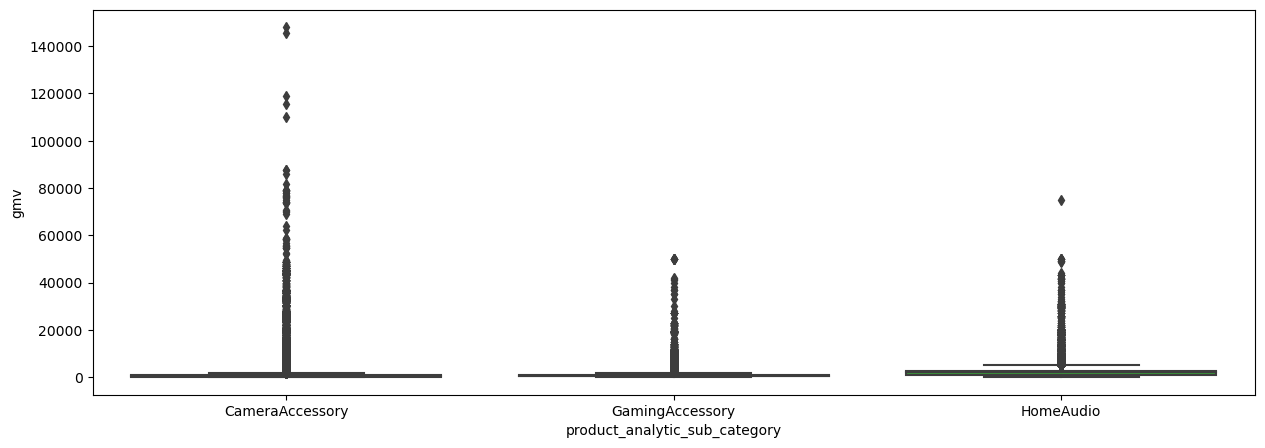

In [40]:
#Let's check outliers in gmv individaully for the three categories
plt.figure(figsize = (15,5))
sns.boxplot(y = 'gmv',data = df01, x = 'product_analytic_sub_category')

##### observed a large number of outliers in the category CameraAccessory & also some outliers in the other two categories. This needs to be handled

In [41]:
##Capping the values to 0.95 quantile
df01.loc[(df01.product_analytic_sub_category=='CameraAccessory')]['gmv'].quantile(0.95)

6079.0

In [42]:
df01.loc[(df01.product_analytic_sub_category=='HomeAudio')]['gmv'].quantile(0.95)

4706.249999999913

In [43]:
# Gaming Accessory - capping value for gmv for outlier removal
df01.loc[(df01.product_analytic_sub_category=='GamingAccessory')]['gmv'].quantile(0.95)

2890.0

<AxesSubplot:xlabel='gmv'>

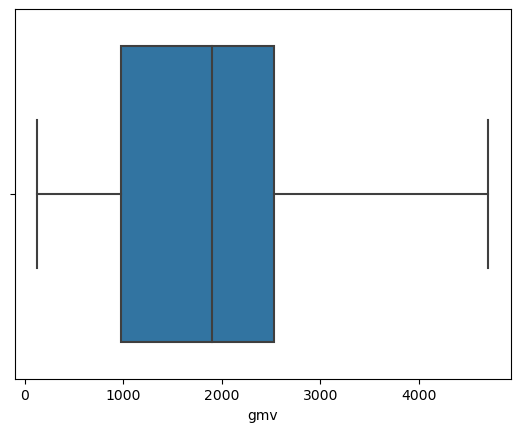

In [44]:
sns.boxplot(df01.loc[(df01.product_analytic_sub_category=='HomeAudio') & (df01.gmv<4706)]['gmv'])

<AxesSubplot:xlabel='gmv'>

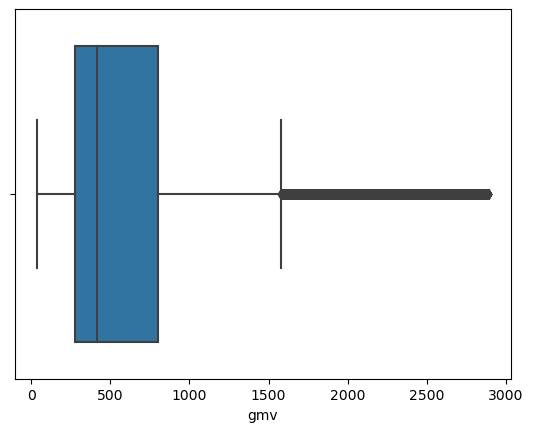

In [45]:
sns.boxplot(df01.loc[(df01.product_analytic_sub_category=='GamingAccessory') & (df01.gmv<2890)]['gmv'])

<AxesSubplot:xlabel='gmv'>

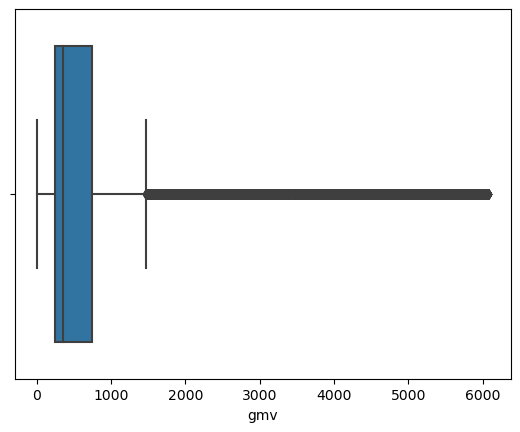

In [46]:
sns.boxplot(df01.loc[(df01.product_analytic_sub_category=='CameraAccessory') & (df01.gmv<6079)]['gmv'])

In [47]:
camera_data = df01.loc[(df01.product_analytic_sub_category=='CameraAccessory') & (df01.gmv<6079)]
gaming_data = df01.loc[(df01.product_analytic_sub_category=='GamingAccessory') & (df01.gmv<3000)]
homeaudio_data = df01.loc[(df01.product_analytic_sub_category=='HomeAudio') & (df01.gmv<4706)]

In [48]:
## checking the shape of the 3 categories
print(camera_data.shape)
print(gaming_data.shape)
print(homeaudio_data.shape)

(199598, 20)
(172870, 20)
(100755, 20)


In [49]:
## concatenating the three categories to a single dataframe data
df01 = pd.concat([camera_data, gaming_data, homeaudio_data], axis = 0)

In [50]:
## drop the columns which give us no relevant information for analysis
df01.drop(['fsn_id','order_item_id','pincode','product_analytic_super_category','product_analytic_category'],inplace = True, axis = 1)

In [51]:
##converting data types for Year, Month & order_week to int

df01['Year'] = df01['Year'].astype('int')
df01['Month'] = df01['Month'].astype('int')
df01['order_week'] = df01['order_week'].astype('int')

### EDA 

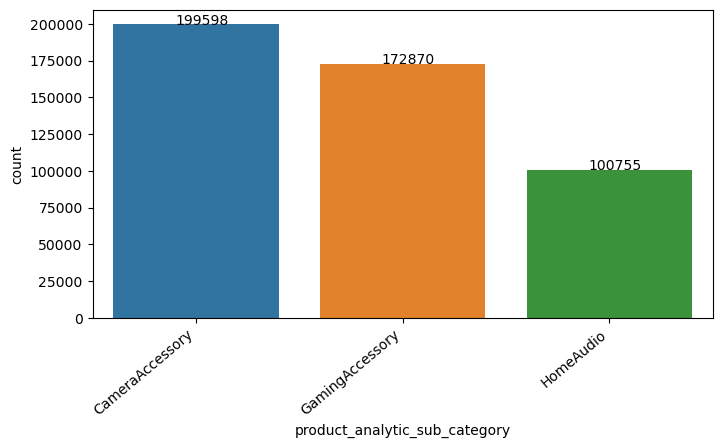

In [52]:
## No of transactions by Sub-Category
plt.figure(figsize = (8,4))
ax = sns.countplot(df01['product_analytic_sub_category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context(font_scale = 1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

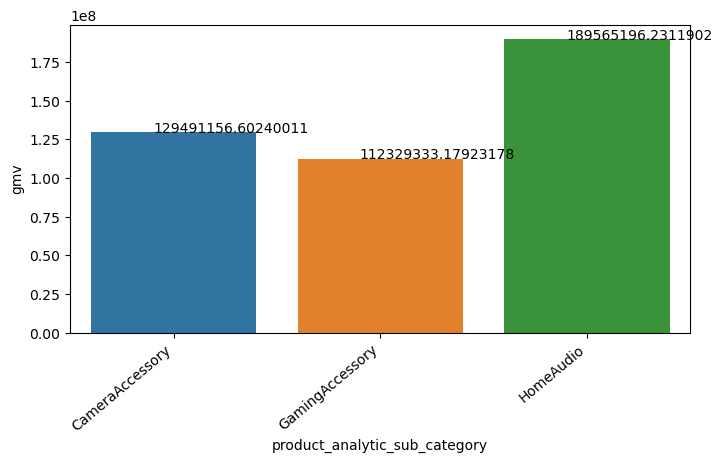

In [53]:
total_revenue= df01.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()
plt.figure(figsize = (8,4))
ax = sns.barplot(x='product_analytic_sub_category', y='gmv', data=total_revenue)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context(font_scale = 1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

<AxesSubplot:>

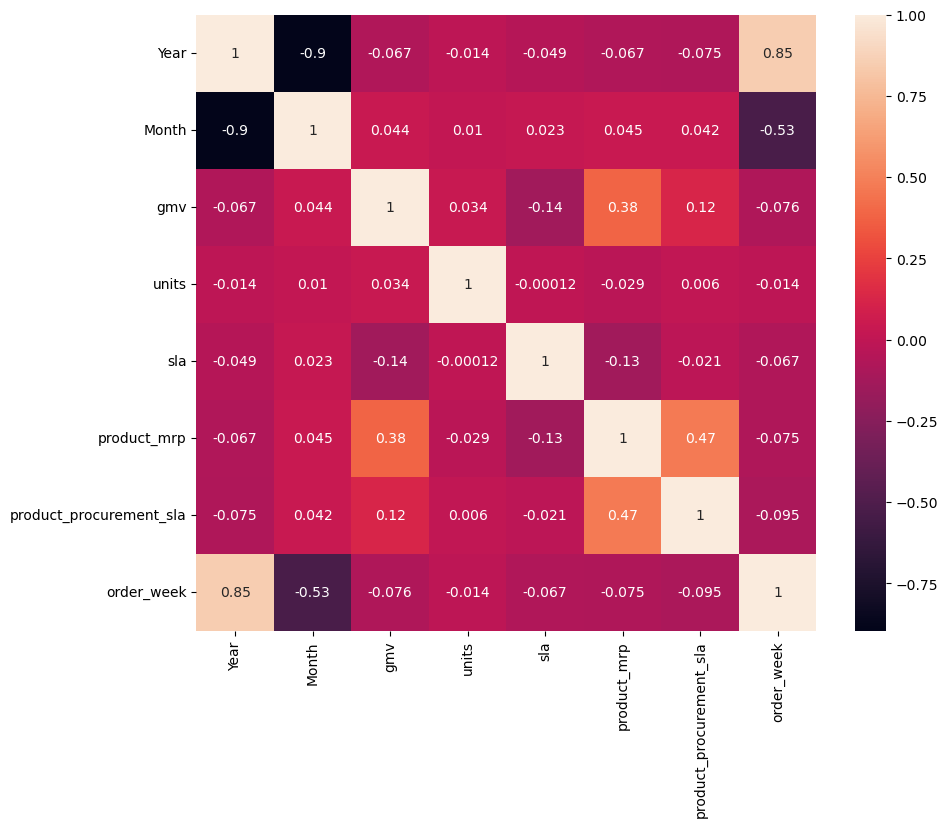

In [54]:
## corelation of the different variables to check for multi-colinearity
plt.figure(figsize = (10,8))
sns.heatmap(df01.corr(), annot=True)

<AxesSubplot:xlabel='product_analytic_sub_category', ylabel='gmv'>

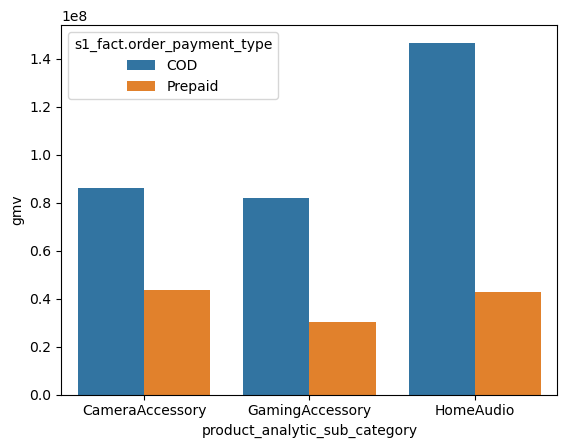

In [55]:
## visualize the total revenue for each of the sub-categories (total gmv) vs Payment Type
revenue_by_payment_type = df01.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].sum().reset_index()
sns.barplot(x='product_analytic_sub_category', y='gmv', hue="s1_fact.order_payment_type", data=revenue_by_payment_type)

<AxesSubplot:xlabel='product_analytic_sub_category', ylabel='transaction_count'>

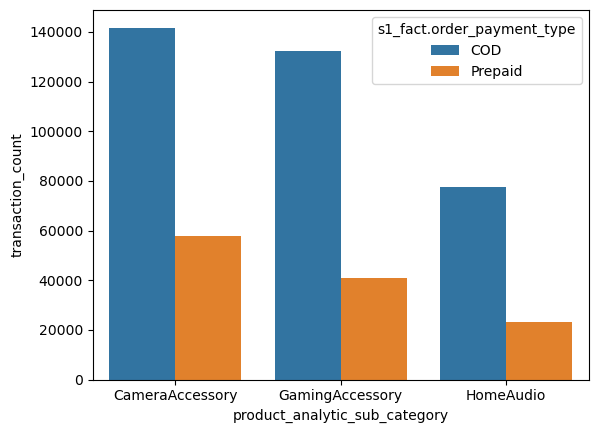

In [56]:
## visualize the total number of orders for each of the sub-categories vs Payment Type
norders_by_Payment_type = df01.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].count().reset_index().rename(columns={'gmv':'transaction_count'})
sns.barplot(x='product_analytic_sub_category', y='transaction_count', hue="s1_fact.order_payment_type", data=norders_by_Payment_type)

In [57]:
## Creating the data set for each sub-category
gaming_data = df01[(df01['product_analytic_sub_category']=='GamingAccessory')].drop('product_analytic_sub_category', axis = 1)
camera_data = df01[(df01['product_analytic_sub_category']=='CameraAccessory')].drop('product_analytic_sub_category', axis = 1)
homeaudio_data = df01[(df01['product_analytic_sub_category']=='HomeAudio')].drop('product_analytic_sub_category', axis = 1)

In [58]:
print(gaming_data.shape)
print(camera_data.shape)
print(homeaudio_data.shape)

(172870, 14)
(199598, 14)
(100755, 14)


#### Creating the KPIs

In [59]:
def createDFFromDict(listOfValues, desiredColumnName):
    df = pd.DataFrame(listOfValues)
    df[desiredColumnName] = pd.to_datetime(df[desiredColumnName]).dt.date
    df["total_"+desiredColumnName+"s"] = 1
    df['order_week'] = pd.to_datetime(df[desiredColumnName]).dt.week
    df['year'] = pd.to_datetime(df[desiredColumnName]).dt.year
    df['order_week'] = df.apply(lambda x: mapWeek(x['order_week'],x['year']), axis = 1)
    df = df.groupby('order_week').sum()
    df["is_"+desiredColumnName] = 1
    df.drop('year', axis = 1, inplace = True)
    return df

In [60]:
def createKPIs(df):
#### KPI 1: Payment mode indicator
    df['payment_mode_indicator'] = df['s1_fact.order_payment_type'].apply(lambda x: 0 if x == "COD" else 1)
#### KPI 2: Selling price of each product in every transaction
    df['selling_price'] = df['gmv']/df['units']
#### KPI 3: Discount offered on  each of the products
    df['discount'] = np.round((df['product_mrp']-df['selling_price'])/df['product_mrp'],2)
    
    return df

In [61]:
def createWeeklyAggregatedCollumns():
#### KPI 4: Total Holidays
    holidays = {'holiday':["2016-01-01", "2016-02-16", "2016-02-14", "2016-03-17", "2016-04-03", "2016-04-06", 
            "2016-05-10", "2016-05-18", "2016-06-21", "2016-06-24", "2015-07-01", "2015-08-03", 
            "2015-09-07", "2015-10-12", "2015-10-31", "2015-11-11", "2015-12-25", "2015-12-26"]}
    holiday_df = createDFFromDict(holidays,"holiday")

#### KPI 5: total Special sale days
    special_sale_days = {'special_sale_day':["2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-10-11","2015-10-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27"]}
    special_sale_day_df = createDFFromDict(special_sale_days,'special_sale_day')

#### KPI 6: total pay days
    #Creating order_day column
    pay_days = {'pay_day':["2015-07-01","2015-07-15","2015-08-01","2015-08-15",
                "2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01",
                "2015-11-15","2015-12-01","2015-12-15","2016-01-01","2016-01-15",
                "2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01",
                "2016-04-15","2016-05-01","2016-05-15","2016-06-01","2016-06-15"]}
    pay_days_df = createDFFromDict(pay_days,'pay_day')
    final_df = pd.concat([holiday_df, special_sale_day_df, pay_days_df],axis = 1)
    return final_df.fillna(0).astype('int')

In [62]:
createWeeklyAggregatedCollumns()

,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day
order_week,,,,,,
27,1,1,0,0,1,1
32,1,1,0,0,0,0
37,1,1,0,0,0,0
42,1,1,4,1,1,1
44,1,1,0,0,1,1
46,1,1,4,1,1,1
52,2,1,3,1,0,0
53,1,1,6,1,1,1
59,1,1,1,1,0,0


In [63]:
## Adding the KPIs to the dataframes of each sub-category
gaming_data_with_KPIs = createKPIs(gaming_data)
camera_data_with_KPIs = createKPIs(camera_data)
homeaudio_data_with_KPIs = createKPIs(homeaudio_data)

In [64]:
print(homeaudio_data_with_KPIs.shape)
print(gaming_data_with_KPIs.shape)
print(camera_data_with_KPIs.shape)

(100755, 17)
(172870, 17)
(199598, 17)


In [65]:
gaming_data_with_KPIs.head(10)

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount
1599,2015-10-14,2015,10,1416985339691600,2750.0,1,COD,7,9041577304631719936,GamePad,3999,5,2015-10-14 22:54:54,42,0,2750.0,0.31
1600,2015-10-15,2015,10,1417669228375400,2899.0,1,Prepaid,5,8973831124140309504,GamePad,3999,5,2015-10-15 20:19:38,42,1,2899.0,0.28
1601,2015-10-17,2015,10,1419414998353400,2609.0,1,Prepaid,5,-4824142736471789568,GamePad,3999,5,2015-10-17 18:21:43,42,1,2609.0,0.35
1602,2015-10-26,2015,10,1427167582532600,2772.0,1,Prepaid,5,-3305365297260279808,GamePad,3999,5,2015-10-26 17:49:39,44,1,2772.0,0.31
1603,2015-10-16,2015,10,4417730112316700,2750.0,1,Prepaid,7,2297791966161220096,GamePad,3999,5,2015-10-16 04:02:08,42,1,2750.0,0.31
1604,2015-10-18,2015,10,3420000107033800,2999.0,1,Prepaid,4,-8159330392897349632,GamePad,3999,5,2015-10-18 10:40:06,42,1,2999.0,0.25
1606,2015-10-19,2015,10,1421036227532500,2899.0,1,COD,6,5325410391017360384,GamePad,3999,5,2015-10-19 15:22:35,43,0,2899.0,0.28
1607,2015-10-04,2015,10,4408070947414700,2750.0,1,COD,7,4371929922837940224,GamePad,3999,5,2015-10-04 15:19:00,40,0,2750.0,0.31
1608,2015-10-16,2015,10,3418252708402100,2899.0,1,COD,5,3902463897075030016,GamePad,3999,5,2015-10-16 10:02:58,42,0,2899.0,0.28
1613,2015-10-10,2015,10,1413439979375200,2750.0,1,COD,6,-9095391233747760128,GamePad,3999,5,2015-10-10 20:31:56,41,0,2750.0,0.31


In [66]:
camera_data_with_KPIs.head(10)

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount
2,2015-10-20,2015,10,2421912925714800,1990.0,1,COD,10,-1040442942046599936,CameraTripod,2099,3,2015-10-20 15:45:56,43,0,1990.0,0.05
3,2015-10-14,2015,10,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,CameraTripod,2099,3,2015-10-14 12:05:15,42,1,1690.0,0.19
4,2015-10-17,2015,10,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,CameraTripod,2099,3,2015-10-17 21:25:03,42,1,1618.0,0.23
5,2015-10-17,2015,10,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,CameraTripod,4044,5,2015-10-17 12:07:24,42,1,3324.0,0.18
6,2015-10-16,2015,10,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,CameraTripod,4044,5,2015-10-16 14:59:57,42,1,3695.0,0.09
7,2015-10-15,2015,10,3417799002820700,3695.0,1,COD,5,9173275962341520384,CameraTripod,4044,5,2015-10-15 23:41:39,42,0,3695.0,0.09
9,2015-10-25,2015,10,4426481574167600,3695.0,1,COD,7,-7809156068961630208,CameraTripod,4044,5,2015-10-25 22:52:34,43,0,3695.0,0.09
10,2015-10-19,2015,10,2420828677270800,3695.0,1,COD,8,-8990324579055120384,CameraTripod,4044,5,2015-10-19 09:37:06,43,0,3695.0,0.09
16,2015-10-16,2015,10,3418344978897200,6075.0,1,Prepaid,4,-2517430994597530112,Lens,7150,0,2015-10-16 12:39:30,42,1,6075.0,0.15
25,2015-10-16,2015,10,3418427829117000,6003.0,1,Prepaid,8,1306435547167980032,Lens,7150,0,2015-10-16 14:57:08,42,1,6003.0,0.16


In [67]:
homeaudio_data_with_KPIs.head(10)

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount
2870,2015-10-08,2015,10,1411753777965600,3700.0,1,COD,3,8628124667745449984,HomeAudioSpeaker,4599,0,2015-10-08 21:34:04,41,0,3700.0,0.20
2871,2015-10-11,2015,10,2414104375842400,3700.0,1,COD,5,5684936202558919680,HomeAudioSpeaker,4599,0,2015-10-11 16:54:52,41,0,3700.0,0.20
2872,2015-10-08,2015,10,4411629266828400,3700.0,1,COD,3,-1123729755469779968,HomeAudioSpeaker,4599,0,2015-10-08 18:06:04,41,0,3700.0,0.20
5960,2015-10-01,2015,10,2405684398213000,2159.0,1,Prepaid,6,8509075186971020288,HomeAudioSpeaker,2800,5,2015-10-01 21:02:49,40,1,2159.0,0.23
5961,2015-10-26,2015,10,3427126275487100,2159.0,1,COD,5,349030327610672000,HomeAudioSpeaker,2800,5,2015-10-26 16:41:40,44,0,2159.0,0.23
5962,2015-10-13,2015,10,2415786609460100,2159.0,1,COD,3,-8384811631749669888,HomeAudioSpeaker,2800,5,2015-10-13 13:35:08,42,0,2159.0,0.23
6530,2015-10-26,2015,10,1427207779496000,4279.0,1,COD,4,-4870651767218669568,HomeAudioSpeaker,7899,3,2015-10-26 18:49:04,44,0,4279.0,0.46
6531,2015-10-20,2015,10,2421731305334700,4279.0,1,COD,5,4804046564709080064,HomeAudioSpeaker,7899,3,2015-10-20 10:44:55,43,0,4279.0,0.46
6532,2015-10-15,2015,10,2417766999086100,4279.0,1,Prepaid,5,4660926885145539584,HomeAudioSpeaker,7899,3,2015-10-15 22:46:17,42,1,4279.0,0.46
6533,2015-10-17,2015,10,4419222022770500,4279.0,1,COD,5,8194926984559750144,HomeAudioSpeaker,7899,3,2015-10-17 12:58:30,42,0,4279.0,0.46


In [68]:
# Creating KPIs for product analytical vertical
prd_vert_CA = camera_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
CA_prdvr_KPI = prd_vert_CA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
cols = CA_prdvr_KPI.columns
CA_prdvr_KPI[cols] = CA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
camera_data_with_KPIs = camera_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)

In [69]:
#Counting products sold in each vertical
prd_vrt_units_sold = prd_vert_CA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
prd_vrt_units_sold.head()

,product_analytic_vertical,units
15,Flash,48003
3,CameraBattery,35974
12,CameraTripod,31268
17,Lens,22800
2,CameraBag,15279


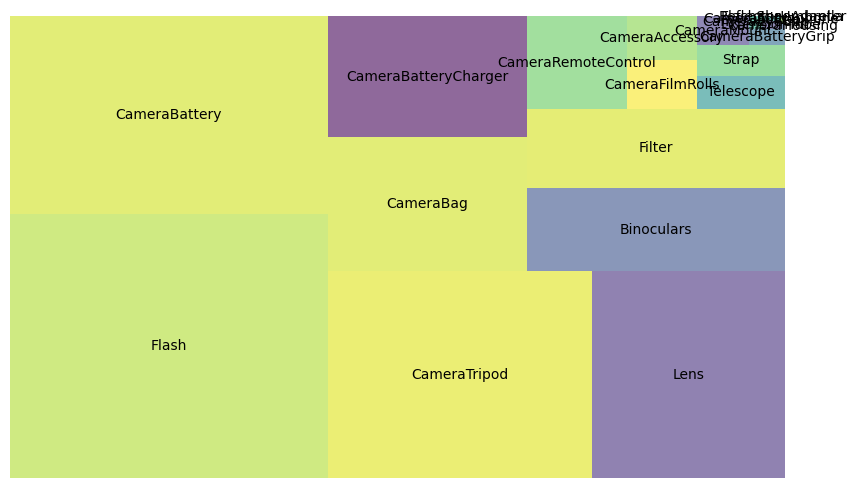

In [70]:
import squarify
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
 
squarify.plot(sizes=prd_vrt_units_sold['units'], label=prd_vrt_units_sold['product_analytic_vertical'], alpha=.6 )
plt.axis('off')
plt.show()

In [71]:
# Creating KPIs for product analytical vertical
prd_vert_GA = gaming_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
GA_prdvr_KPI = prd_vert_GA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0")
cols = GA_prdvr_KPI.columns
GA_prdvr_KPI[cols] = GA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
gaming_data_with_KPIs = gaming_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)

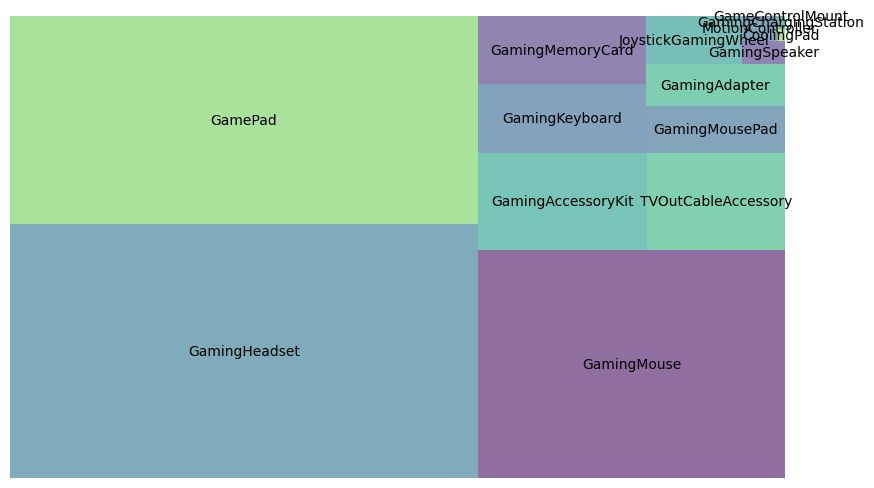

In [72]:
#Creating number of products sold for each vertical & plotting
prd_vrt_units_sold = prd_vert_GA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
 
squarify.plot(sizes=prd_vrt_units_sold['units'], label=prd_vrt_units_sold['product_analytic_vertical'], alpha=.6 )
plt.axis('off')
plt.show()

In [73]:
# Creating KPIs for product analytical vertical
prd_vert_HA = homeaudio_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
HA_prdvr_KPI = prd_vert_HA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
cols = HA_prdvr_KPI.columns
HA_prdvr_KPI[cols] = HA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
homeaudio_data_with_KPIs = homeaudio_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)

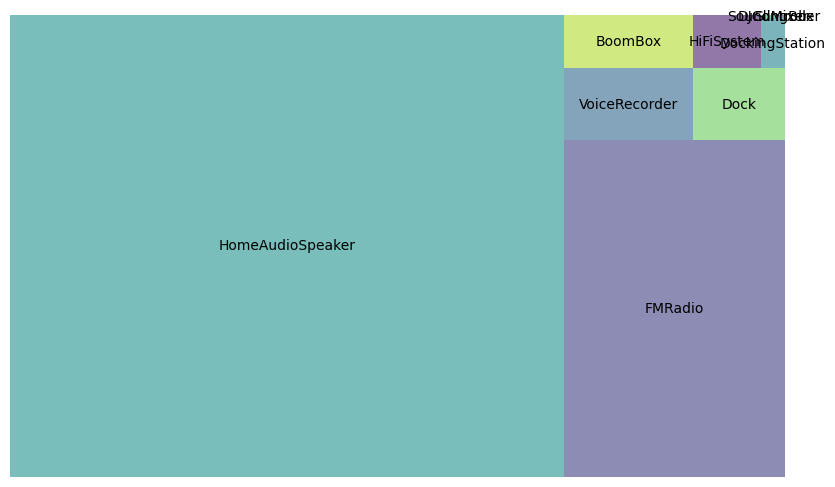

In [74]:
#Creating number of products sold for each vertical & plotting
prd_vrt_units_sold = prd_vert_HA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
 
squarify.plot(sizes=prd_vrt_units_sold['units'], label=prd_vrt_units_sold['product_analytic_vertical'], alpha=.6 )
plt.axis('off')
plt.show()

In [75]:
## Product Premiumness
def createProductPremiumness(df,cut_off):
    df['premium_product'] = df['gmv'].apply(lambda  x:1 if (x >cut_off) else 0)
    return df

In [76]:
camera_data_with_KPIs['gmv'].describe()

count    199598.00000
mean        648.75979
std         781.57022
min          10.00000
25%         248.00000
50%         349.00000
75%         739.00000
max        6078.00000
Name: gmv, dtype: float64

In [77]:
## Therefore the cut-off value for camera acccessory is 739(75% percentile)
camera_data_with_KPIs = createProductPremiumness(camera_data_with_KPIs,739.0)

In [78]:
camera_data_with_KPIs.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount,premium_product
2,2015-10-20,2015,10,2421912925714800,1990.0,1,COD,10,-1040442942046599936,2099,3,2015-10-20 15:45:56,43,0,1990.0,0.05,1
3,2015-10-14,2015,10,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,2099,3,2015-10-14 12:05:15,42,1,1690.0,0.19,1
4,2015-10-17,2015,10,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,2099,3,2015-10-17 21:25:03,42,1,1618.0,0.23,1
5,2015-10-17,2015,10,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,4044,5,2015-10-17 12:07:24,42,1,3324.0,0.18,1
6,2015-10-16,2015,10,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,4044,5,2015-10-16 14:59:57,42,1,3695.0,0.09,1


In [79]:
gaming_data_with_KPIs['gmv'].describe()

count    172870.000000
mean        649.790786
std         580.402575
min          39.000000
25%         279.000000
50%         420.000000
75%         806.000000
max        2999.000000
Name: gmv, dtype: float64

In [80]:
## the cut-off value for gaming accesory is 806(75% percentile)
gaming_data_with_KPIs = createProductPremiumness(gaming_data_with_KPIs,806.0)
gaming_data_with_KPIs.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount,premium_product
1599,2015-10-14,2015,10,1416985339691600,2750.0,1,COD,7,9041577304631719936,3999,5,2015-10-14 22:54:54,42,0,2750.0,0.31,1
1600,2015-10-15,2015,10,1417669228375400,2899.0,1,Prepaid,5,8973831124140309504,3999,5,2015-10-15 20:19:38,42,1,2899.0,0.28,1
1601,2015-10-17,2015,10,1419414998353400,2609.0,1,Prepaid,5,-4824142736471789568,3999,5,2015-10-17 18:21:43,42,1,2609.0,0.35,1
1602,2015-10-26,2015,10,1427167582532600,2772.0,1,Prepaid,5,-3305365297260279808,3999,5,2015-10-26 17:49:39,44,1,2772.0,0.31,1
1603,2015-10-16,2015,10,4417730112316700,2750.0,1,Prepaid,7,2297791966161220096,3999,5,2015-10-16 04:02:08,42,1,2750.0,0.31,1


In [81]:
homeaudio_data_with_KPIs['gmv'].describe()

count    100755.000000
mean       1881.447037
std         976.982316
min         129.000000
25%         975.000000
50%        1899.000000
75%        2525.000000
max        4704.000000
Name: gmv, dtype: float64

In [82]:
## the cut-off value for camera acccessory is 2525.0(75% percentile)
homeaudio_data_with_KPIs = createProductPremiumness(homeaudio_data_with_KPIs,2525.0)
homeaudio_data_with_KPIs.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount,premium_product
2870,2015-10-08,2015,10,1411753777965600,3700.0,1,COD,3,8628124667745449984,4599,0,2015-10-08 21:34:04,41,0,3700.0,0.20,1
2871,2015-10-11,2015,10,2414104375842400,3700.0,1,COD,5,5684936202558919680,4599,0,2015-10-11 16:54:52,41,0,3700.0,0.20,1
2872,2015-10-08,2015,10,4411629266828400,3700.0,1,COD,3,-1123729755469779968,4599,0,2015-10-08 18:06:04,41,0,3700.0,0.20,1
5960,2015-10-01,2015,10,2405684398213000,2159.0,1,Prepaid,6,8509075186971020288,2800,5,2015-10-01 21:02:49,40,1,2159.0,0.23,0
5961,2015-10-26,2015,10,3427126275487100,2159.0,1,COD,5,349030327610672000,2800,5,2015-10-26 16:41:40,44,0,2159.0,0.23,0


In [83]:
 ## Including NPS & Stock Index. Creating them separately & merging with 3 dataframes
    
#Reading media data from the excel file
nps_df = pd.read_excel("./Media data and other information.xlsx", sheet_name = 'Monthly NPS Score', header = 1).T.reset_index()

# Skipping the first row (index 0) as it contains column names
nps_df = nps_df.iloc[1:]

# resetting index
nps_df.reset_index(drop=True, inplace=True)

# renaming columns
nps_df.columns = ['NPS', 'Stock Index']
nps_df

,NPS,Stock Index
0,54.599588,1177
1,59.987101,1206
2,46.925419,1101
3,44.398389,1210
4,47.0,1233
5,45.8,1038
6,47.093031,1052
7,50.327406,1222
8,49.02055,1015
9,51.827605,1242


In [84]:
nps_df['Year']=[2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016]
nps_df['Month']=[7,8,9,10,11,12,1,2,3,4,5,6]

In [85]:
nps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NPS          12 non-null     object
 1   Stock Index  12 non-null     object
 2   Year         12 non-null     int64 
 3   Month        12 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 512.0+ bytes


In [86]:
## Check unique values in 'NPS'
print(nps_df['NPS'].unique())

[54.599588092376216 59.987101024 46.925418687263985 44.3983889339963
 46.99999999999999 45.8 47.09303132503366 50.32740649908032
 49.02055041461363 51.82760501909438 47.306951226359324 50.516687050376724]


In [87]:
# Clean 'NPS' column
nps_df['NPS'] = pd.to_numeric(nps_df['NPS'], errors='coerce')

# Convert to float
nps_df['NPS'] = nps_df['NPS'].astype('float64')

# Verify changes
print(nps_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NPS          12 non-null     float64
 1   Stock Index  12 non-null     object 
 2   Year         12 non-null     int64  
 3   Month        12 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 512.0+ bytes
None


In [88]:
## Adding NPS KPI to each of the dataframes
gaming_data_with_KPIs = pd.merge(nps_df,gaming_data_with_KPIs,on=['Month','Year'],how='inner')
camera_data_with_KPIs = pd.merge(nps_df,camera_data_with_KPIs,on=['Month','Year'],how='inner')
homeaudio_data_with_KPIs = pd.merge(nps_df,homeaudio_data_with_KPIs,on=['Month','Year'],how='inner')

In [89]:
# Creating dataframes for plots for each of the category
GamingAccessory_data_with_KPIs_for_plot = gaming_data_with_KPIs
GamingAccessory_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Gaming Accessory"
CameraAccessory_data_with_KPIs_for_plot = camera_data_with_KPIs
CameraAccessory_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Camera Accessory"
HomeAudio_data_with_KPIs_for_plot = homeaudio_data_with_KPIs
HomeAudio_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Home Audio"

all_data_with_kpi = pd.concat([GamingAccessory_data_with_KPIs_for_plot, CameraAccessory_data_with_KPIs_for_plot, HomeAudio_data_with_KPIs_for_plot], axis = 0)

In [90]:
all_data_with_kpi

,NPS,Stock Index,Year,Month,order_date,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount,premium_product,product_analytic_sub_category
0,54.599588,1177,2015,7,2015-07-10,169460596,2800.0,1,Prepaid,9,8996931547933859840,3999,5,2015-07-10 22:22:38,28,1,2800.0,0.30,1,Gaming Accessory
1,54.599588,1177,2015,7,2015-07-20,173845985,2700.0,1,COD,7,1095002556734790016,3999,5,2015-07-20 09:47:28,30,0,2700.0,0.32,1,Gaming Accessory
2,54.599588,1177,2015,7,2015-07-26,176570219,2679.0,1,Prepaid,5,-8900627232445830144,3999,5,2015-07-26 20:26:01,30,1,2679.0,0.33,1,Gaming Accessory
3,54.599588,1177,2015,7,2015-07-08,168513415,2789.0,1,Prepaid,7,6515060272718419968,3999,5,2015-07-08 23:17:31,28,1,2789.0,0.30,1,Gaming Accessory
4,54.599588,1177,2015,7,2015-07-17,172787973,2884.0,1,COD,6,-7661168602558889984,3999,5,2015-07-17 20:47:03,29,0,2884.0,0.28,1,Gaming Accessory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100750,50.516687,1194,2016,6,2016-06-03,2618299505150600,4250.0,1,Prepaid,5,4646154941616119808,10500,5,2016-06-03 22:56:20,75,1,4250.0,0.60,1,Home Audio
100751,50.516687,1194,2016,6,2016-06-05,2619609259003700,4300.0,1,Prepaid,8,-1282246418299980032,10500,5,2016-06-05 11:22:02,75,1,4300.0,0.59,1,Home Audio
100752,50.516687,1194,2016,6,2016-06-07,2621667629404200,4300.0,1,COD,6,35088536456114800,10500,5,2016-06-07 20:29:23,76,0,4300.0,0.59,1,Home Audio
100753,50.516687,1194,2016,6,2016-06-09,3623392164474100,4349.0,1,COD,5,-2150890080550419968,10500,5,2016-06-09 20:23:52,76,0,4349.0,0.59,1,Home Audio


In [91]:
## Weekly Agrregation of Data
#GamingAccessory Data - Aggregating weekly some features being summed up & for some taking mean
GamingAccessory_data_sum = gaming_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
GamingAccessory_data_mean = gaming_data_with_KPIs[['sla','product_procurement_sla','order_week',
                                                            'product_mrp','selling_price',"NPS",'discount',]].groupby('order_week').mean()
GamingAccessory_data_count = gaming_data_with_KPIs[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumness'})

final_gaming_data = pd.concat([GamingAccessory_data_sum, GamingAccessory_data_mean,GamingAccessory_data_count], axis = 1).reset_index()

In [92]:
#Merging with the weekly aggregate collumns
final_gaming_data = pd.merge(final_gaming_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_gaming_data.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,NPS,discount,total_transactions,total_premiumness,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day
0,27,2.234400e+04,24,3.458333,3.208333,3504.125000,931.000000,54.599588,0.316250,24,24,1.0,1.0,0.0,0.0,1.0,1.0
1,28,1.931187e+06,2791,5.367141,3.238024,1682.665793,702.495135,54.599588,0.419663,2672,2672,0.0,0.0,0.0,0.0,0.0,0.0
2,29,1.614474e+06,2714,5.268874,2.715785,1646.805006,639.854000,54.599588,0.450262,2477,2477,0.0,0.0,2.0,1.0,1.0,1.0
3,30,1.748798e+06,2240,5.453665,2.589212,2144.942370,793.871139,54.599588,0.396985,2169,2169,0.0,0.0,0.0,0.0,0.0,0.0
4,31,1.336692e+06,1636,5.696372,3.225334,5294.440484,832.935710,54.603017,0.462120,1571,1571,0.0,0.0,0.0,0.0,1.0,1.0


In [93]:
final_gaming_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'NPS', 'discount', 'total_transactions',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day'],
      dtype='object')

In [94]:
#Camera data  - Aggregating weekly some features being summed up & for some taking mean
CameraAccessory_data_sum = camera_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
CameraAccessory_data_mean = camera_data_with_KPIs[['sla','product_procurement_sla','order_week','product_mrp',
                                                            'selling_price','discount','NPS']].groupby('order_week').mean()
CameraAccessory_data_count = camera_data_with_KPIs[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumness'})
final_camera_data = pd.concat([CameraAccessory_data_sum, CameraAccessory_data_mean,CameraAccessory_data_count], axis = 1).reset_index()

In [95]:
#Merging with the weekly aggregate KPIs i.e. total_paydays, total_holidays, is_payday, is_holiday, total_special_days, is_special_day
final_camera_data = pd.merge(final_camera_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_camera_data.shape

(52, 17)

In [96]:
#Merging with Product Analytical Vertical KPI
final_camera_data = pd.merge(final_camera_data,CA_prdvr_KPI,on=['order_week'],how='left')
final_camera_data.shape

(52, 39)

In [97]:
final_camera_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [98]:
# Home Audio data
HomeAudio_data_sum = homeaudio_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
HomeAudio_data_mean = homeaudio_data_with_KPIs[['sla','product_procurement_sla','order_week','product_mrp','selling_price','discount','NPS']].groupby('order_week').mean()
HomeAudio_data_count = homeaudio_data_with_KPIs[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumness'})
final_home_audio_data = pd.concat([HomeAudio_data_sum, HomeAudio_data_mean,HomeAudio_data_count], axis = 1).reset_index()

In [99]:
#Merging with the weekly aggregate KPIs i.e. total_paydays, total_holidays, is_payday, is_holiday, total_special_days, is_special_day
final_home_audio_data = pd.merge(final_home_audio_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_home_audio_data.shape

(50, 17)

In [100]:
#Merging with Product Analytical Vertical KPI
final_home_audio_data = pd.merge(final_home_audio_data,HA_prdvr_KPI,on=['order_week'],how='left')
final_home_audio_data.shape

(50, 27)

In [101]:
final_home_audio_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'BoomBox', 'DJController', 'Dock', 'DockingStation',
       'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker', 'SlingBox', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

In [102]:
print("Shape of Gaming Accessory DF",final_gaming_data.shape)
print("Shape of Camera Accessory DF",final_camera_data.shape)
print("Shape of Home Audio DF",final_home_audio_data.shape)

Shape of Gaming Accessory DF (53, 17)
Shape of Camera Accessory DF (52, 39)
Shape of Home Audio DF (50, 27)


In [103]:
## Media Investment data - Creating separately & merging with the 3 dataframes of each category
# Reading the media data from the provided file
media_investment = pd.read_excel("./Media data and other information.xlsx", sheet_name = 'Media Investment', header = 2)
media_investment

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,NaN,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,NaN,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,NaN,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,NaN,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,NaN,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN
5,NaN,2015.0,12.0,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,NaN,NaN
6,NaN,2016.0,1.0,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,NaN,2016.0,2.0,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,NaN,NaN
8,NaN,2016.0,3.0,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,NaN,2016.0,4.0,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,NaN,NaN


In [104]:
#Formatting the dataframe in the required format i.e. removing the extra rows & columns
media_investment = media_investment.iloc[:-4].reset_index()
media_investment.drop('index', inplace = True, axis = 1)

In [105]:
#Converting columns year & month in int type
media_investment['Year']  = media_investment['Year'] .astype('int')
media_investment['Month']  = media_investment['Month'] .astype('int')

In [106]:
#Filling NaN values as 0 assuming that the investment done in respective area was 0
media_investment  = media_investment.fillna(0)

In [107]:
#Checking the final media_investment DF
media_investment

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,0.0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000
1,0.0,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000
2,0.0,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000
3,0.0,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000
4,0.0,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000
5,0.0,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000
6,0.0,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,0.0,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000
8,0.0,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,0.0,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000


In [108]:
#Creating a mapping of the Months & no of weeks in order to find the media data weekly for each of the months
number_of_weeks = {'Month':[1,2,3,4,5,6,7,8,9,10,11,12], 'number_of_weeks':[4,4,5,4,4,5,4,4,5,4,4,5]}
number_of_weeks_df = pd.DataFrame(number_of_weeks)
number_of_weeks_df

,Month,number_of_weeks
0,1,4
1,2,4
2,3,5
3,4,4
4,5,4
5,6,5
6,7,4
7,8,4
8,9,5
9,10,4


In [109]:
#Merging the media_investment data with DF containing the mapping of months & no of weeks in that month
media_investment = pd.merge(media_investment,number_of_weeks_df, on = 'Month', how = 'inner')
media_investment

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,number_of_weeks
0,0.0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000,4
1,0.0,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000,4
2,0.0,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000,5
3,0.0,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000,4
4,0.0,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000,4
5,0.0,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000,5
6,0.0,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000,4
7,0.0,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000,4
8,0.0,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545,5
9,0.0,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000,4


In [110]:
# Calculating the final media_investments weekly by dividing the value in a month with the respecitve number_of_weeks in the month
media_investment['TV']  = media_investment['TV']/media_investment['number_of_weeks']
media_investment['Digital']  = media_investment['Digital']/media_investment['number_of_weeks']
media_investment['Sponsorship']  = media_investment['Sponsorship']/media_investment['number_of_weeks']
media_investment['Content Marketing']  = media_investment['Content Marketing']/media_investment['number_of_weeks']
media_investment['Online marketing']  = media_investment['Online marketing']/media_investment['number_of_weeks']
media_investment[' Affiliates']  = media_investment[' Affiliates']/media_investment['number_of_weeks']
media_investment['SEM']  = media_investment['SEM']/media_investment['number_of_weeks']
media_investment['Radio']  = media_investment['Radio']/media_investment['number_of_weeks']
media_investment['Other']  = media_investment['Other']/media_investment['number_of_weeks']

In [111]:
# Checking the media investment data
media_investment

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,number_of_weeks
0,0.0,2015,7,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.000,0.000000,4
1,0.0,2015,8,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,0.628382,0.000,0.000000,4
2,0.0,2015,9,96.254380,0.775901,0.271306,12.557530,0.122058,3.275998,1.007653,1.240430,0.000,0.000000,5
3,0.0,2015,10,170.156297,1.536178,3.155620,21.168133,0.861019,6.092944,1.743428,7.981753,0.000,0.000000,4
4,0.0,2015,11,51.216220,1.055157,0.318867,3.543029,0.042158,4.890394,1.648942,1.305508,0.000,0.000000,4
5,0.0,2015,12,106.745312,1.079500,0.612672,11.341084,0.213461,4.500751,1.365388,2.236206,0.000,0.000000,5
6,0.0,2016,1,74.196000,1.095000,0.114000,1.050000,0.225000,5.725000,1.842500,1.050000,0.675,6.772500,4
7,0.0,2016,2,48.052000,0.646502,0.478163,2.931389,0.149193,4.973092,1.616255,1.218407,0.000,0.000000,4
8,0.0,2016,3,100.024621,1.860000,0.420000,8.318000,0.074000,3.687564,1.243533,1.038718,0.174,3.189109,5
9,0.0,2016,4,56.848241,1.301299,0.217973,6.077088,0.008719,4.128627,1.423364,1.054990,0.000,0.000000,4


In [112]:
# Getting unique order_week, month & year present in the original DF
order_week_data = df01[['order_week',"Month","Year"]].drop_duplicates(keep = 'first', subset = None).reset_index().drop('index', axis = 1).sort_values(by = 'order_week')
order_week_data = order_week_data.sort_values(by = ['order_week','Month']).drop_duplicates(keep = 'last', subset = 'order_week')
order_week_data

,order_week,Month,Year
53,27,7,2015
51,28,7,2015
49,29,7,2015
52,30,7,2015
55,31,8,2015
60,32,8,2015
61,33,8,2015
62,34,8,2015
15,35,8,2015
58,36,9,2015


In [113]:
# Merging the media_investment_data with the order_week_data to add order_week into this DF for final merging with other DF containing the KPIs
media_investment_weekly = pd.merge(order_week_data, media_investment, on = ["Month","Year"], how = "inner").drop('number_of_weeks', axis =1)
media_investment_weekly.head()

,order_week,Month,Year,Unnamed: 0,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,7,2015,0.0,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
1,28,7,2015,0.0,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
2,29,7,2015,0.0,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
3,30,7,2015,0.0,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
4,31,8,2015,0.0,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,0.628382,0.0,0.0


<AxesSubplot:title={'center':'Other:Weekly Trend'}, xlabel='order_week'>

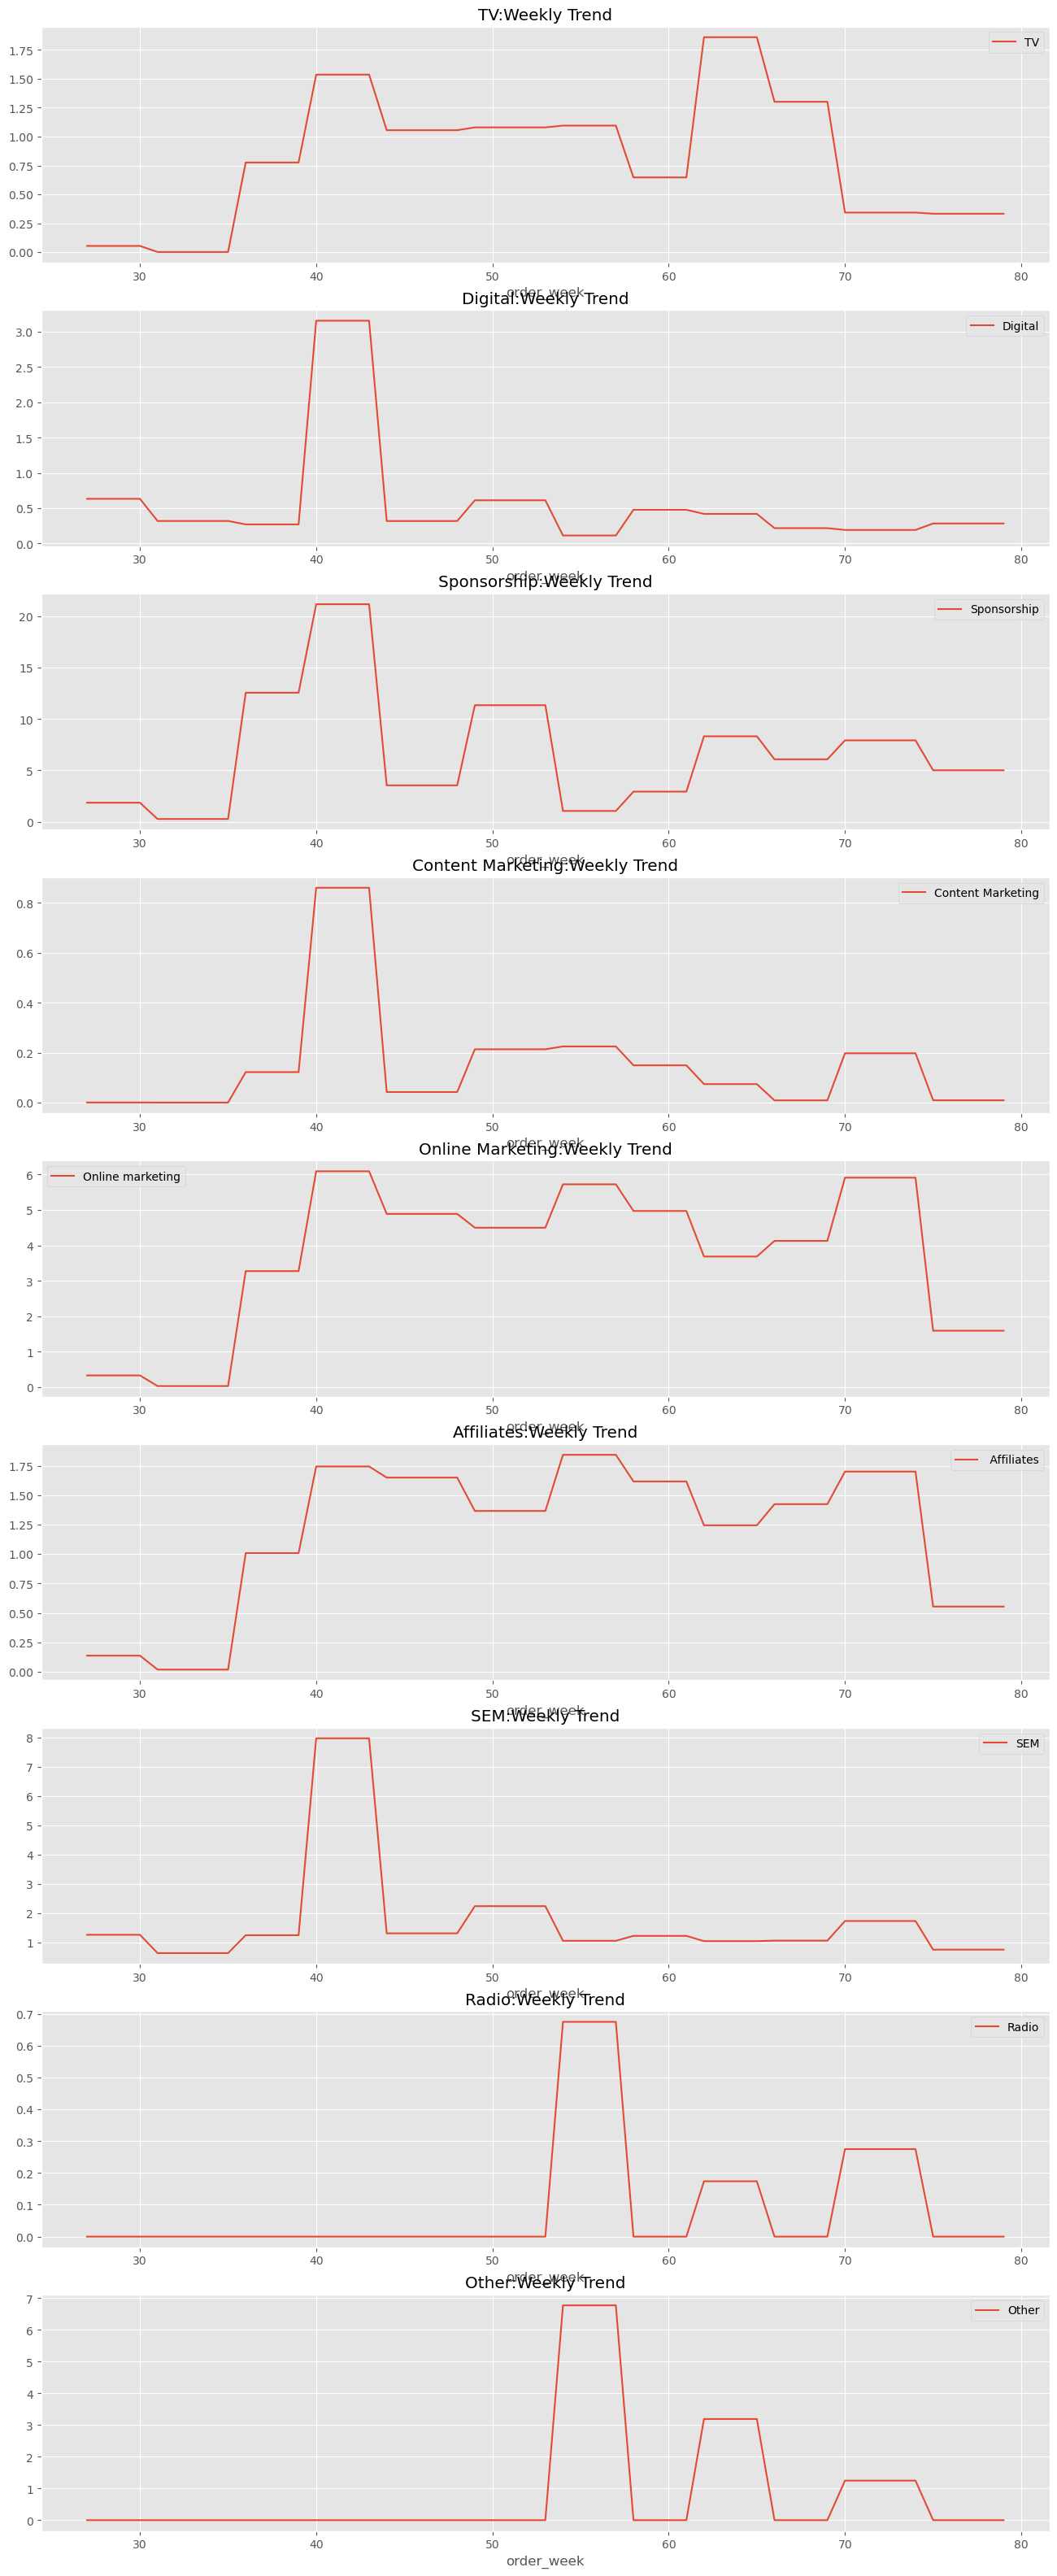

In [114]:
# Lets Analyze the Weekly Spends on different channels
fig = plt.figure(figsize=(16,40))

ax1 = fig.add_subplot(911)
ax1.set_title('TV:Weekly Trend')
ax2 = fig.add_subplot(912)
ax2.set_title('Digital:Weekly Trend')
ax3 = fig.add_subplot(913)
ax3.set_title('Sponsorship:Weekly Trend')
ax4 = fig.add_subplot(914)
ax4.set_title('Content Marketing:Weekly Trend')
ax5 = fig.add_subplot(915)
ax5.set_title('Online Marketing:Weekly Trend')
ax6 = fig.add_subplot(916)
ax6.set_title('Affiliates:Weekly Trend')
ax7 = fig.add_subplot(917)
ax7.set_title('SEM:Weekly Trend')
ax8 = fig.add_subplot(918)
ax8.set_title('Radio:Weekly Trend')
ax9 = fig.add_subplot(919)
ax9.set_title('Other:Weekly Trend')

media_investment_weekly.plot(x= 'order_week',y=['TV'],ax = ax1)
media_investment_weekly.plot(x= 'order_week',y=['Digital'],ax = ax2)
media_investment_weekly.plot(x= 'order_week',y=['Sponsorship'],ax = ax3)
media_investment_weekly.plot(x= 'order_week',y=['Content Marketing'],ax = ax4)
media_investment_weekly.plot(x= 'order_week',y=['Online marketing'],ax = ax5)
media_investment_weekly.plot(x= 'order_week',y=[' Affiliates'],ax = ax6)
media_investment_weekly.plot(x= 'order_week',y=['SEM'],ax = ax7)
media_investment_weekly.plot(x= 'order_week',y=['Radio'],ax = ax8)
media_investment_weekly.plot(x= 'order_week',y=['Other'],ax = ax9)

###### The maximum investments are done between week 39-45 for most channels & maximum investment was done through Sponsorship media

In [115]:
## Adstock creation Fucntion to create adstocks
def getAdStockValue(media_investment_weekly,col_name, adstock_rate):
    media_investment_weekly['week_carry_over_1_value'] = adstock_rate**1 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_2_value'] = adstock_rate**2 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_3_value'] = adstock_rate**3 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_4_value'] = adstock_rate**4 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_5_value'] = adstock_rate**5 * media_investment_weekly[col_name]
    for i in range(0, len(media_investment_weekly)):
        week1CarryOverValue  = media_investment_weekly.loc[i-1,["week_carry_over_1_value"]][0] if(i-1 > -1) else 0
        week2CarryOverValue  = media_investment_weekly.loc[i-2,["week_carry_over_2_value"]][0] if(i-2 > -1) else 0
        week3CarryOverValue  = media_investment_weekly.loc[i-3,["week_carry_over_3_value"]][0] if(i-3 > -1) else 0
        week4CarryOverValue  = media_investment_weekly.loc[i-4,["week_carry_over_4_value"]][0] if(i-4 > -1) else 0
        week5CarryOverValue  = media_investment_weekly.loc[i-5,["week_carry_over_5_value"]][0] if(i-5 > -1) else 0
        media_investment_weekly.loc[i,"adStock_"+col_name] = media_investment_weekly.loc[i,[col_name]][0] + week1CarryOverValue + week2CarryOverValue + week3CarryOverValue + week4CarryOverValue + week5CarryOverValue
    return media_investment_weekly[["order_week","adStock_"+col_name]]

In [116]:
#Creating adstocks for each of the investments by calling the above created function
adStock_TV = getAdStockValue(media_investment_weekly[['TV','order_week']],"TV", 0.5)[["adStock_TV"]]
adStock_digital = getAdStockValue(media_investment_weekly[['Digital','order_week']],"Digital", 0.5)[["adStock_Digital"]]
adStock_sponsorship = getAdStockValue(media_investment_weekly[['Sponsorship','order_week']],"Sponsorship", 0.5)[["adStock_Sponsorship"]]
adStock_content_marketing = getAdStockValue(media_investment_weekly[['Content Marketing','order_week']],"Content Marketing", 0.5)[["adStock_Content Marketing"]]
adStock_online_marketing = getAdStockValue(media_investment_weekly[['Online marketing','order_week']],"Online marketing", 0.5)[["adStock_Online marketing"]]
adStock_affiliates = getAdStockValue(media_investment_weekly[[' Affiliates','order_week']]," Affiliates", 0.5)[["adStock_ Affiliates"]]
adStock_SEM = getAdStockValue(media_investment_weekly[['SEM','order_week']],"SEM", 0.5)[["adStock_SEM"]]
adStock_radio = getAdStockValue(media_investment_weekly[['Radio','order_week']],"Radio", 0.5)[["adStock_Radio"]]
adStock_other = getAdStockValue(media_investment_weekly[['Other','order_week']],"Other", 0.5)

In [117]:
# Concatenating all individual adstocks to form the final DF containing all the adstock data
all_adstock = pd.concat([adStock_TV,adStock_digital,adStock_sponsorship, adStock_content_marketing, adStock_online_marketing, adStock_affiliates, adStock_SEM, adStock_radio, adStock_other], axis = 1)

In [118]:
#Exploring first few rows
all_adstock.head()

,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,order_week,adStock_Other
0,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,27,0.0
1,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,0.0,28,0.0
2,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,0.0,29,0.0
3,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,0.0,30,0.0
4,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,0.0,31,0.0


In [119]:
## Merging the adstock data with the media investment data on order week
final_adstock_data = pd.merge(media_investment_weekly,all_adstock, on = "order_week", how = 'inner')
final_adstock_data.head()

,order_week,Month,Year,Unnamed: 0,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,...,Other,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,adStock_Other
0,27,7,2015,0.0,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,...,0.0,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
1,28,7,2015,0.0,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,...,0.0,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,0.0,0.0
2,29,7,2015,0.0,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,...,0.0,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,0.0,0.0
3,30,7,2015,0.0,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,...,0.0,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,0.0,0.0
4,31,8,2015,0.0,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,...,0.0,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,0.0,0.0


In [120]:
final_adstock_data.drop(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other' , 'Unnamed: 0'],inplace = True, axis = 1)

In [121]:
#Checking again the first few rows
final_adstock_data.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,adStock_Other
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,0.0,0.0
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,0.0,0.0
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,0.0,0.0
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,0.0,0.0


<AxesSubplot:>

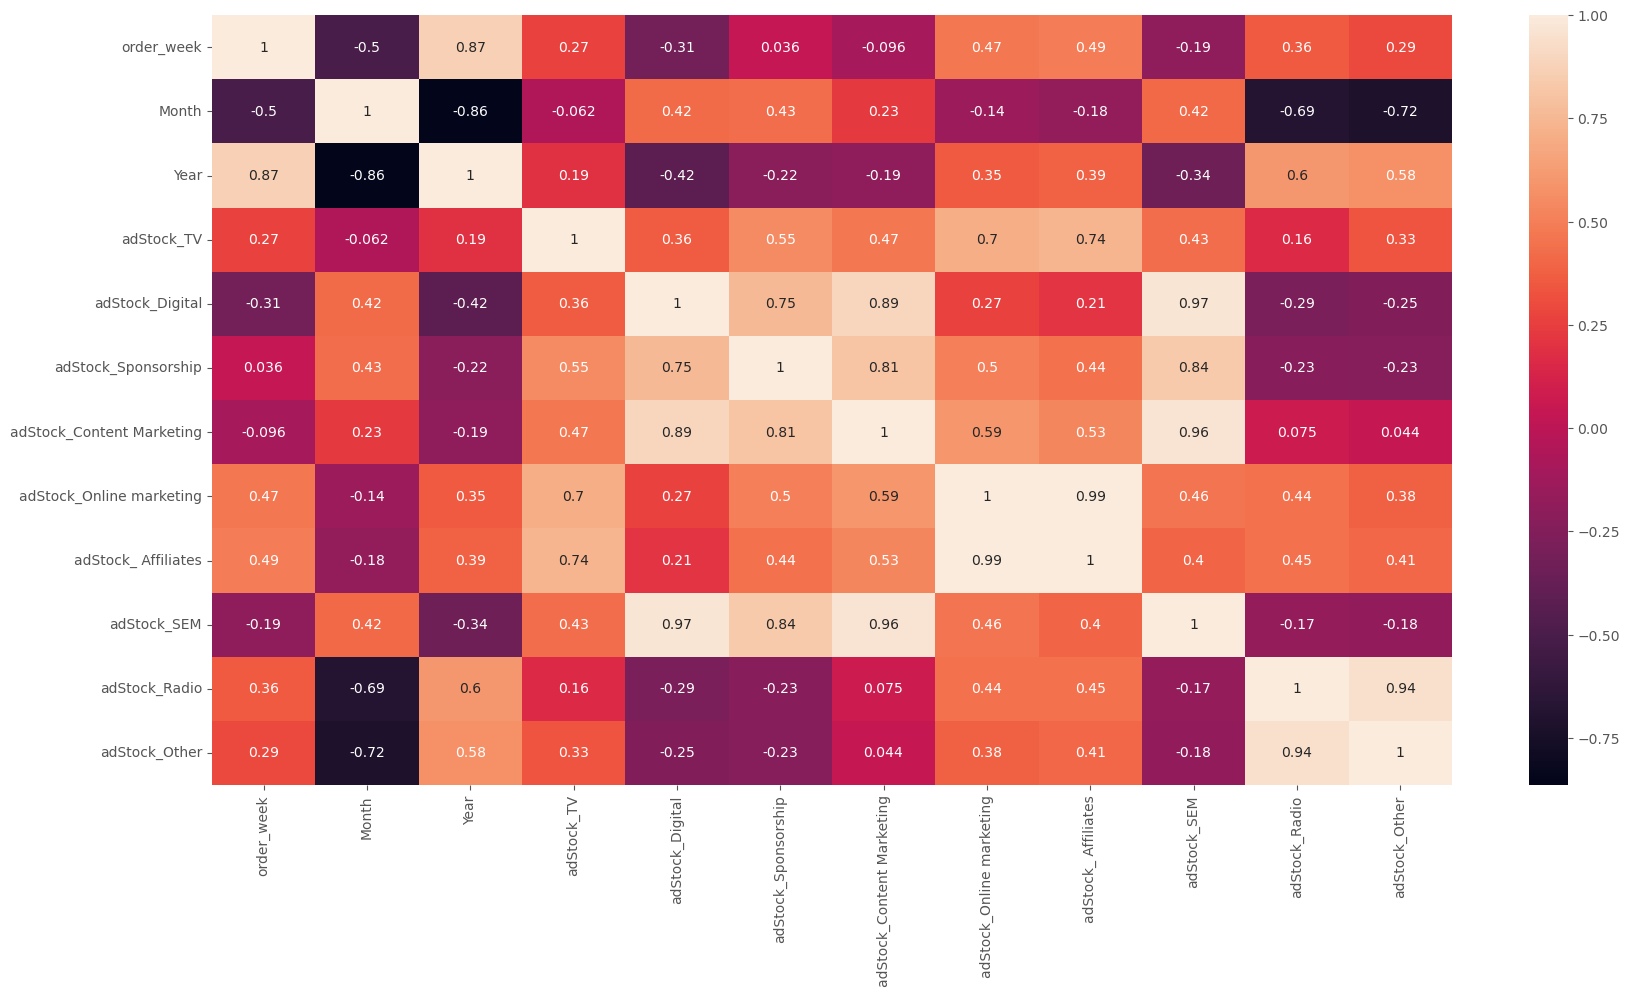

In [122]:
##  the correlations b/w the adstocks to check for colinearity
plt.figure(figsize = (20,10))
sns.heatmap(final_adstock_data.corr(), annot = True)

In [123]:
#Preparing final_data for 3 categories by adding the adstock data
final_camera_data = pd.merge(final_adstock_data,final_camera_data, on = "order_week", how = 'right')
final_gaming_data = pd.merge(final_adstock_data,final_gaming_data, on = "order_week", how = 'right')
final_home_audio_data = pd.merge(final_adstock_data,final_home_audio_data, on = "order_week", how = 'right')

In [124]:
#Checking the shape of the final dataframes
print("Shape of Gaming Accessory DF",final_gaming_data.shape)
print("Shape of Camera Accessory DF",final_camera_data.shape)
print("Shape of Home Audio DF",final_home_audio_data.shape)

Shape of Gaming Accessory DF (53, 28)
Shape of Camera Accessory DF (52, 50)
Shape of Home Audio DF (50, 38)


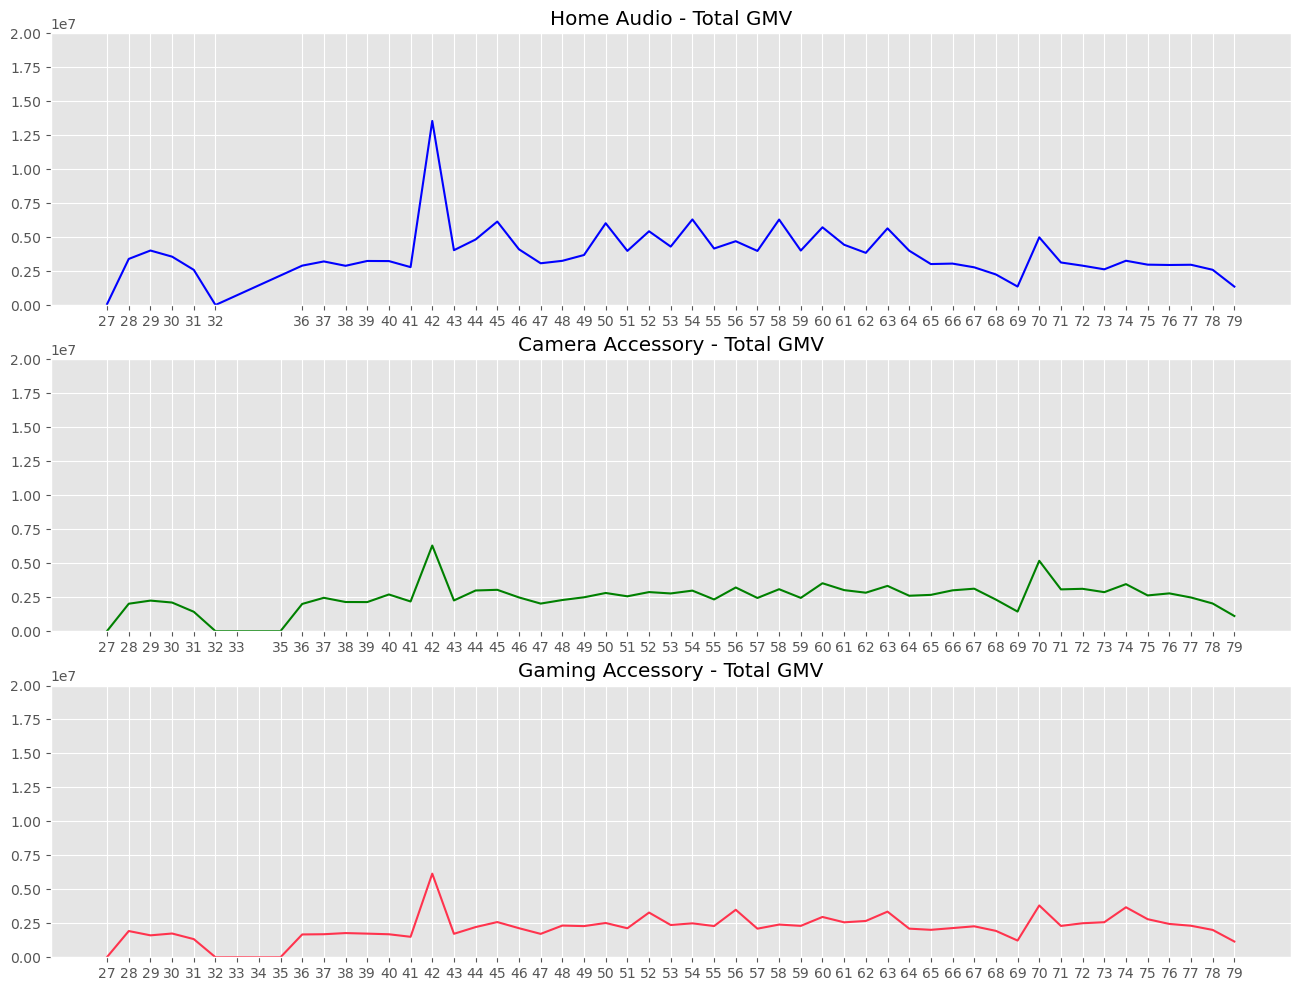

In [125]:
## Total GMV vs Week
fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# subplot 1
ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,20000000)
ax1 = plt.title('Home Audio - Total GMV')
ax1 = plt.plot(final_home_audio_data['order_week'],final_home_audio_data['gmv'],color='blue')
plt.xticks(final_home_audio_data['order_week'])

# subplot 2
ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,20000000)
ax2 = plt.title('Camera Accessory - Total GMV')
ax2 = plt.plot(final_camera_data['order_week'],final_camera_data['gmv'],color='g')
plt.xticks(final_camera_data['order_week'])

# subplot 3
ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,20000000)
ax3 = plt.title('Gaming Accessory - Total GMV')
ax3 = plt.plot(final_gaming_data['order_week'],final_gaming_data['gmv'],color=(1.0,0.2,0.3))
plt.xticks(final_gaming_data['order_week'])

plt.show()


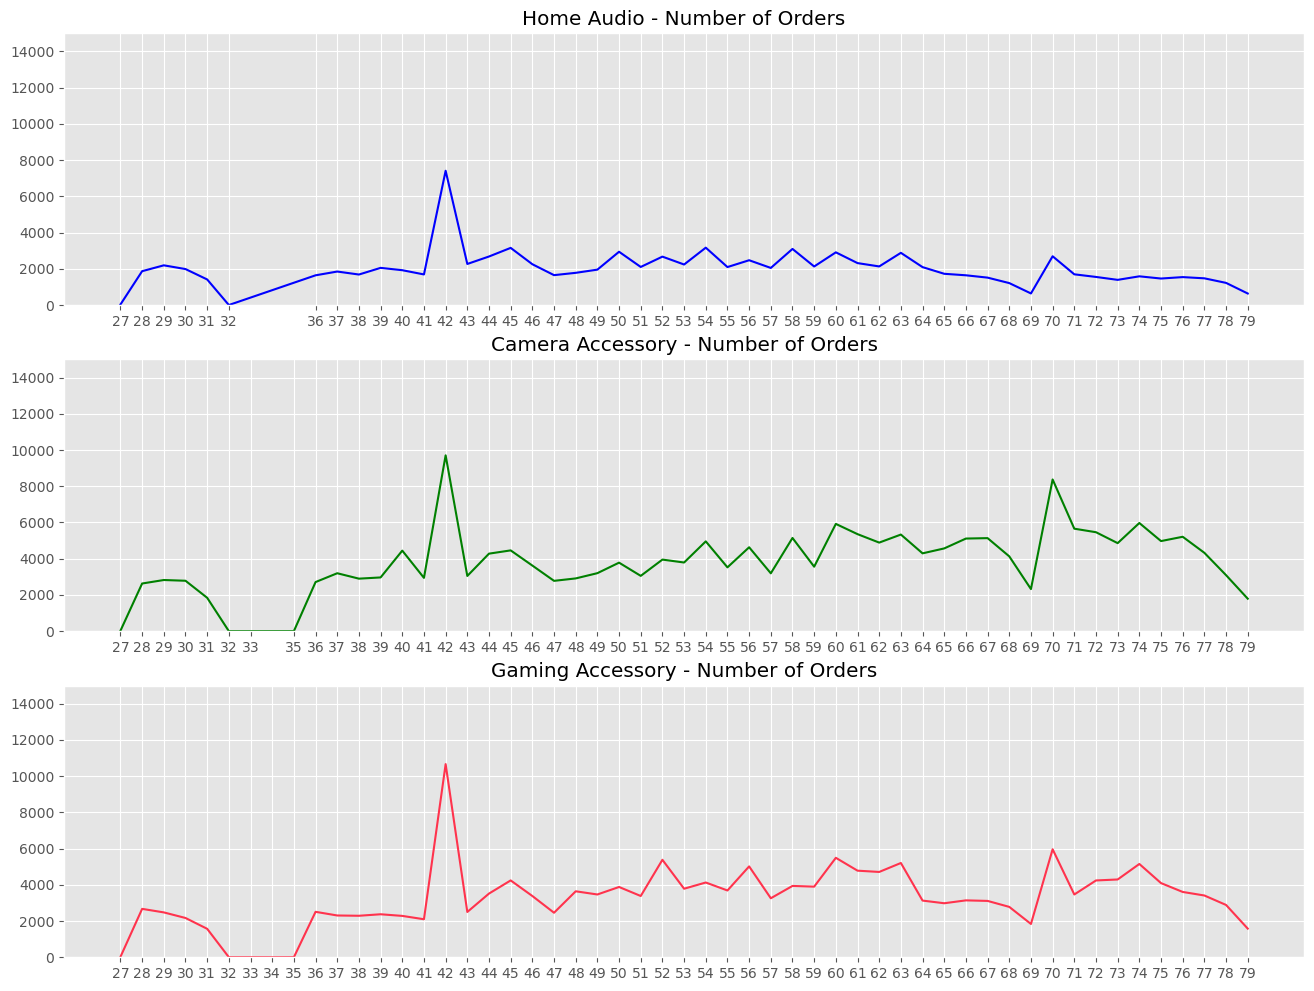

In [126]:
## No of Orders vs Week
fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# subplot 1
ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,15000)
ax1 = plt.title('Home Audio - Number of Orders')
ax1 = plt.plot(final_home_audio_data['order_week'],final_home_audio_data['total_transactions'],color='blue')
plt.xticks(final_home_audio_data['order_week'])

# subplot 2
ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,15000)
ax2 = plt.title('Camera Accessory - Number of Orders')
ax2 = plt.plot(final_camera_data['order_week'],final_camera_data['total_transactions'],color='g')
plt.xticks(final_camera_data['order_week'])

# subplot 3
ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,15000)
ax3 = plt.title('Gaming Accessory - Number of Orders')
ax3 = plt.plot(final_gaming_data['order_week'],final_gaming_data['total_transactions'],color=(1.0,0.2,0.3))
plt.xticks(final_gaming_data['order_week'])

plt.show()

In [127]:
## Holiday week vs Average GMV
Holiday_week_sale_HA = final_home_audio_data.groupby('is_holiday')[['gmv']].mean().reset_index()
Holiday_week_sale_CA = final_camera_data.groupby('is_holiday')[['gmv']].mean().reset_index()
Holiday_week_sale_GA = final_gaming_data.groupby('is_holiday')[['gmv']].mean().reset_index()

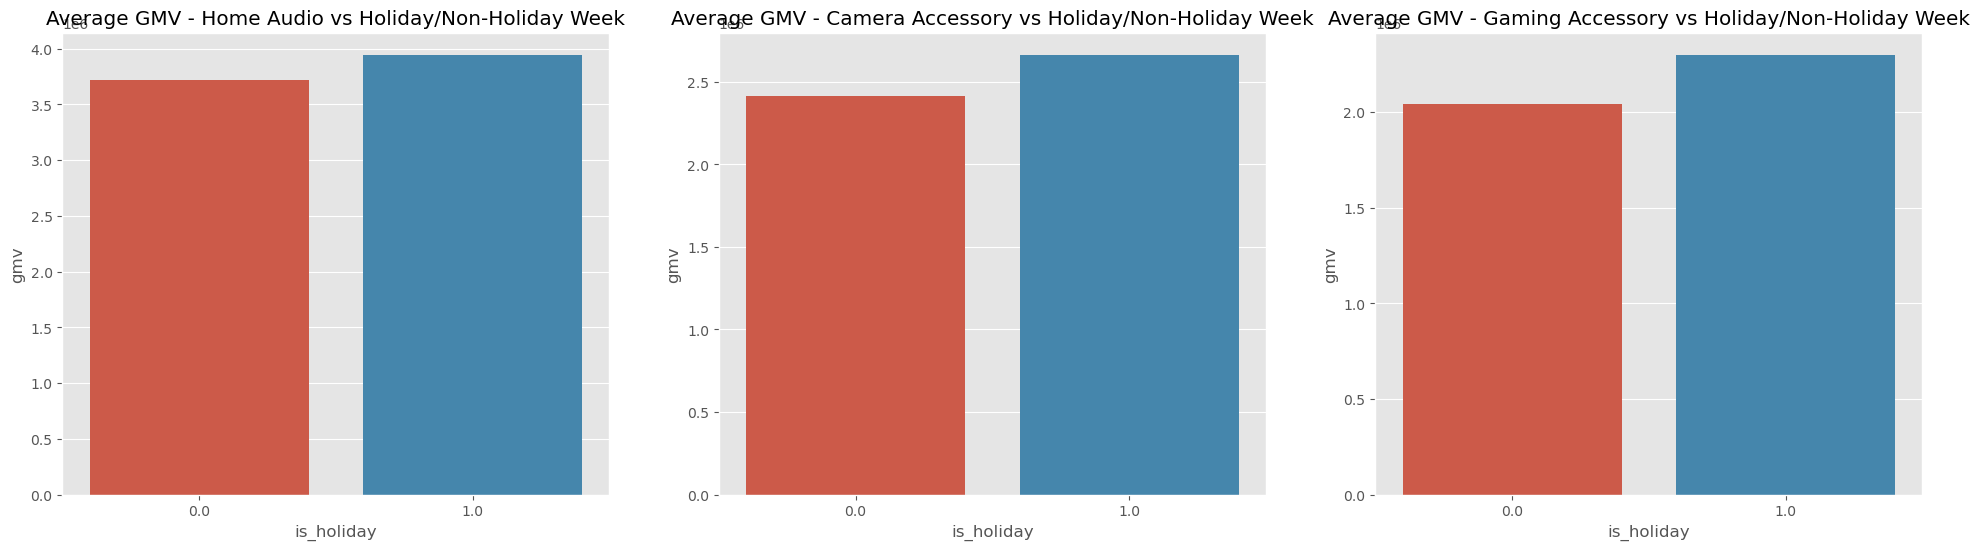

In [128]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Holiday/Non-Holiday Week
ax1 = plt.subplot(1, 3, 1)
# ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Holiday/Non-Holiday Week")

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
# ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Holiday/Non-Holiday Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
# ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week")

plt.show()

In [129]:
## Holiday week vs Average GMV
Holiday_week_sale_HA = final_home_audio_data.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_sale_CA = final_camera_data.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_sale_GA = final_gaming_data.groupby('is_holiday')[['gmv']].sum().reset_index()

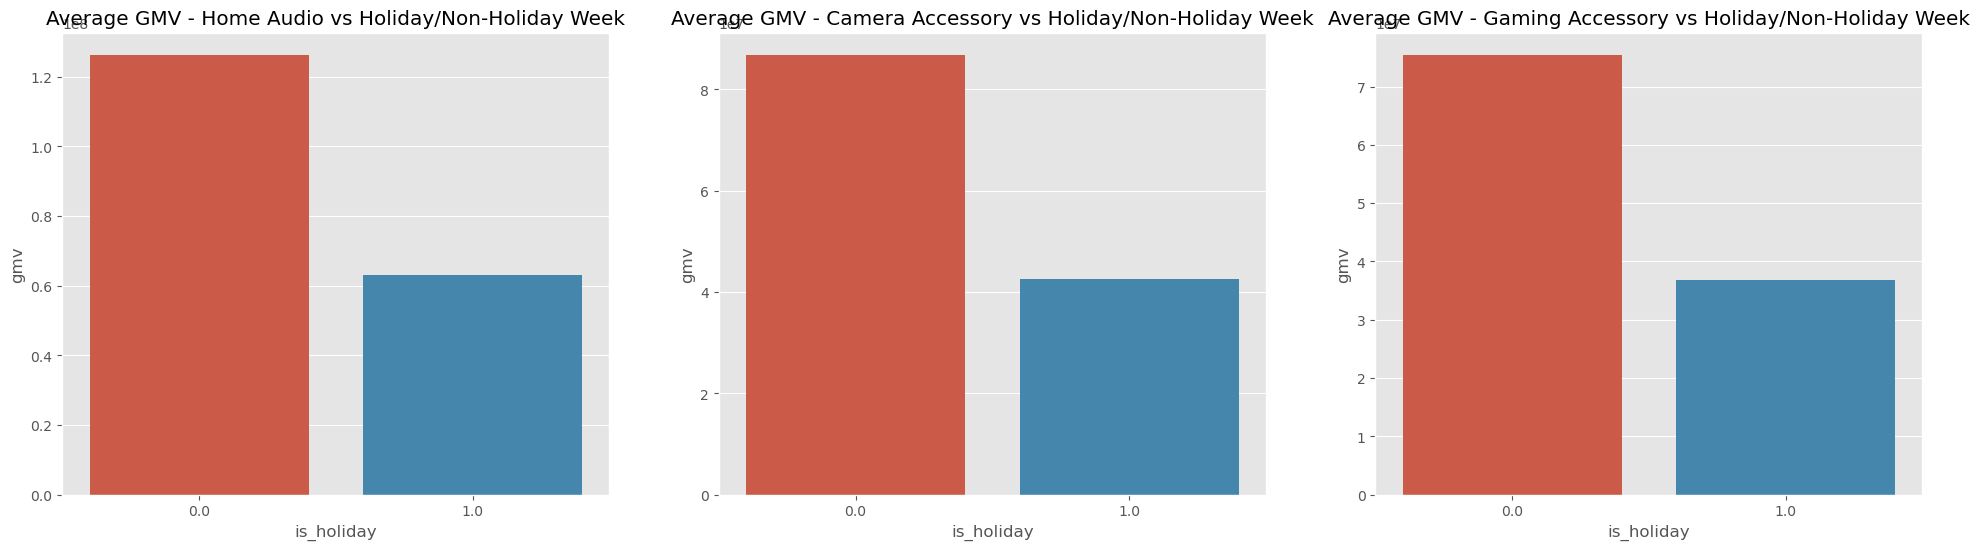

In [130]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Holiday/Non-Holiday Week
ax1 = plt.subplot(1, 3, 1)
# ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Holiday/Non-Holiday Week")

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
# ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Holiday/Non-Holiday Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
# ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week")

plt.show()

In [131]:
## Speacial Sale week vs Average GMV
Special_week_sale_HA = final_home_audio_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
Special_week_sale_CA = final_camera_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
Special_week_sale_GA = final_gaming_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()

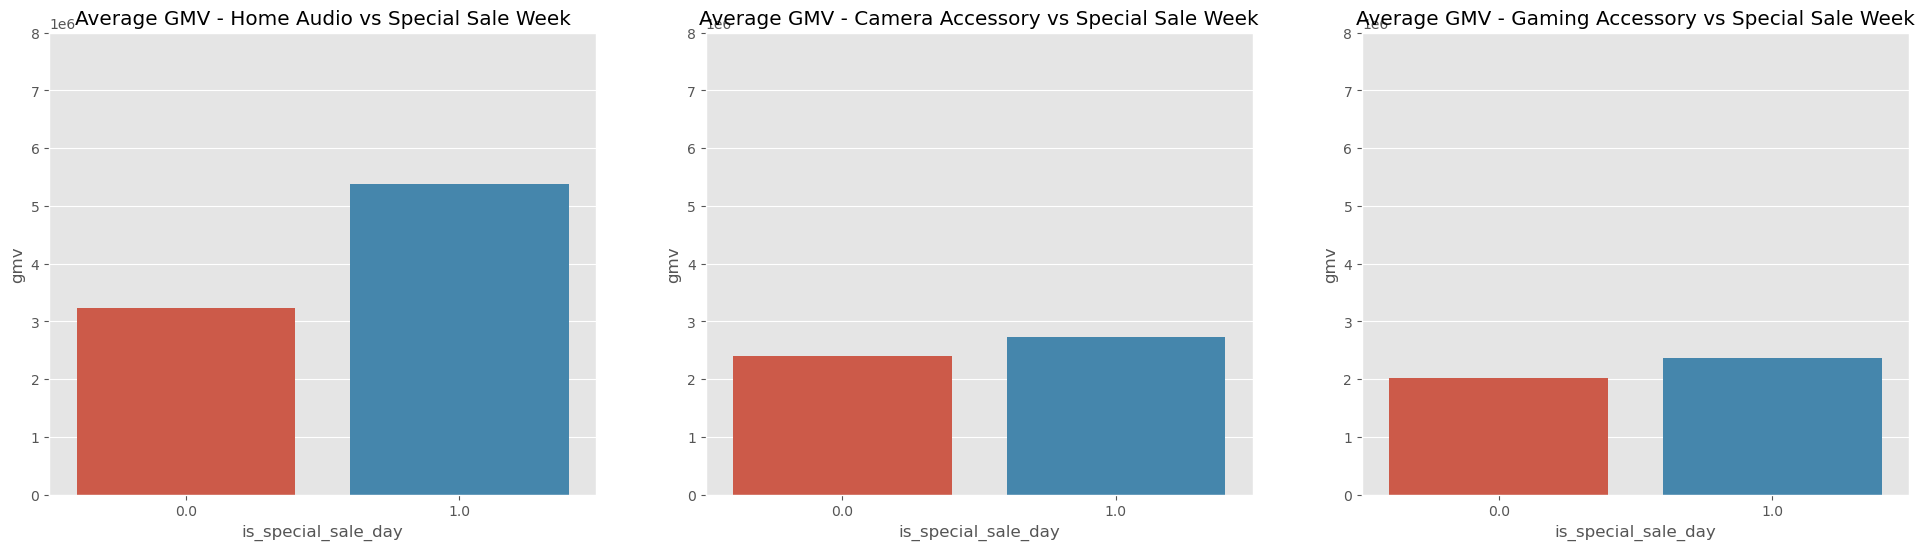

In [132]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Special Sale Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Special Sale Week")

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Special Sale Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Special Sale Week")

plt.show()

In [133]:
## Pay day week vs Average GMV
PayDay_week_sale_HA = final_home_audio_data.groupby('is_pay_day')[['gmv']].mean().reset_index()
PayDay_week_sale_CA = final_camera_data.groupby('is_pay_day')[['gmv']].mean().reset_index()
PayDay_week_sale_GA = final_gaming_data.groupby('is_pay_day')[['gmv']].mean().reset_index()

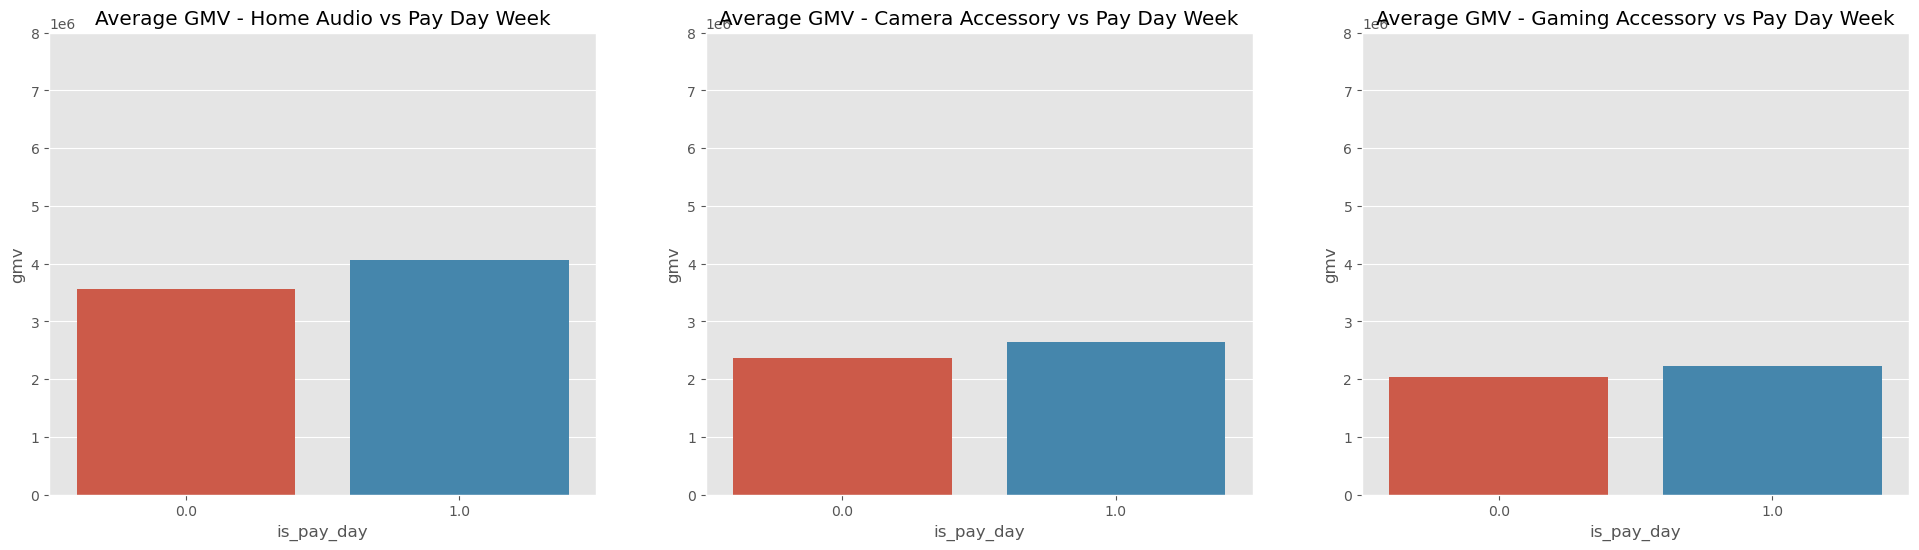

In [134]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Pay Day Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Pay Day Week")

# subplot 3: Average GMV - Camera Accessory vs Pay Day Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Pay Day Week")

# subplot 5: Average GMV - Gaming Accessory vs Pay Day Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Pay Day Week")

plt.show()

In [135]:
## Pay Day week vs Total GMV
PayDay_week_sale_HA = final_home_audio_data.groupby('is_pay_day')[['gmv']].sum().reset_index()
PayDay_week_sale_CA = final_camera_data.groupby('is_pay_day')[['gmv']].sum().reset_index()
PayDay_week_sale_GA = final_gaming_data.groupby('is_pay_day')[['gmv']].sum().reset_index()

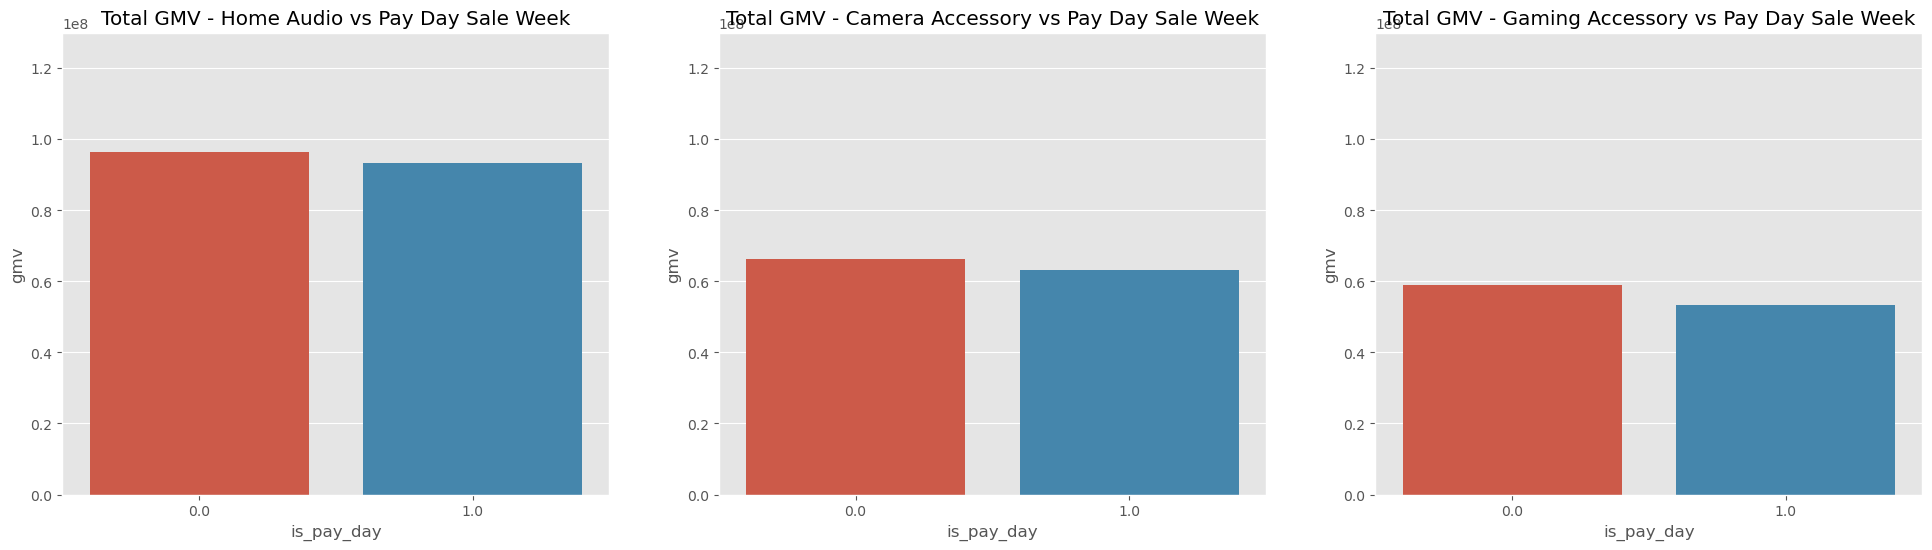

In [136]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Total GMV - Home Audio vs Pay Day Sale Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,130000000)
ax1 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_HA)
ax1 = plt.title("Total GMV - Home Audio vs Pay Day Sale Week")

# subplot 3: Total GMV - Camera Accessory vs Pay Day Sale Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,130000000)
ax2 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_CA)
ax2 = plt.title("Total GMV - Camera Accessory vs Pay Day Sale Week")

# subplot 5: Total GMV - Gaming Accessory vs Pay Day Sale Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,130000000)
ax3 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_GA)
ax3 = plt.title("Total GMV - Gaming Accessory vs Pay Day Sale Week")

plt.show()

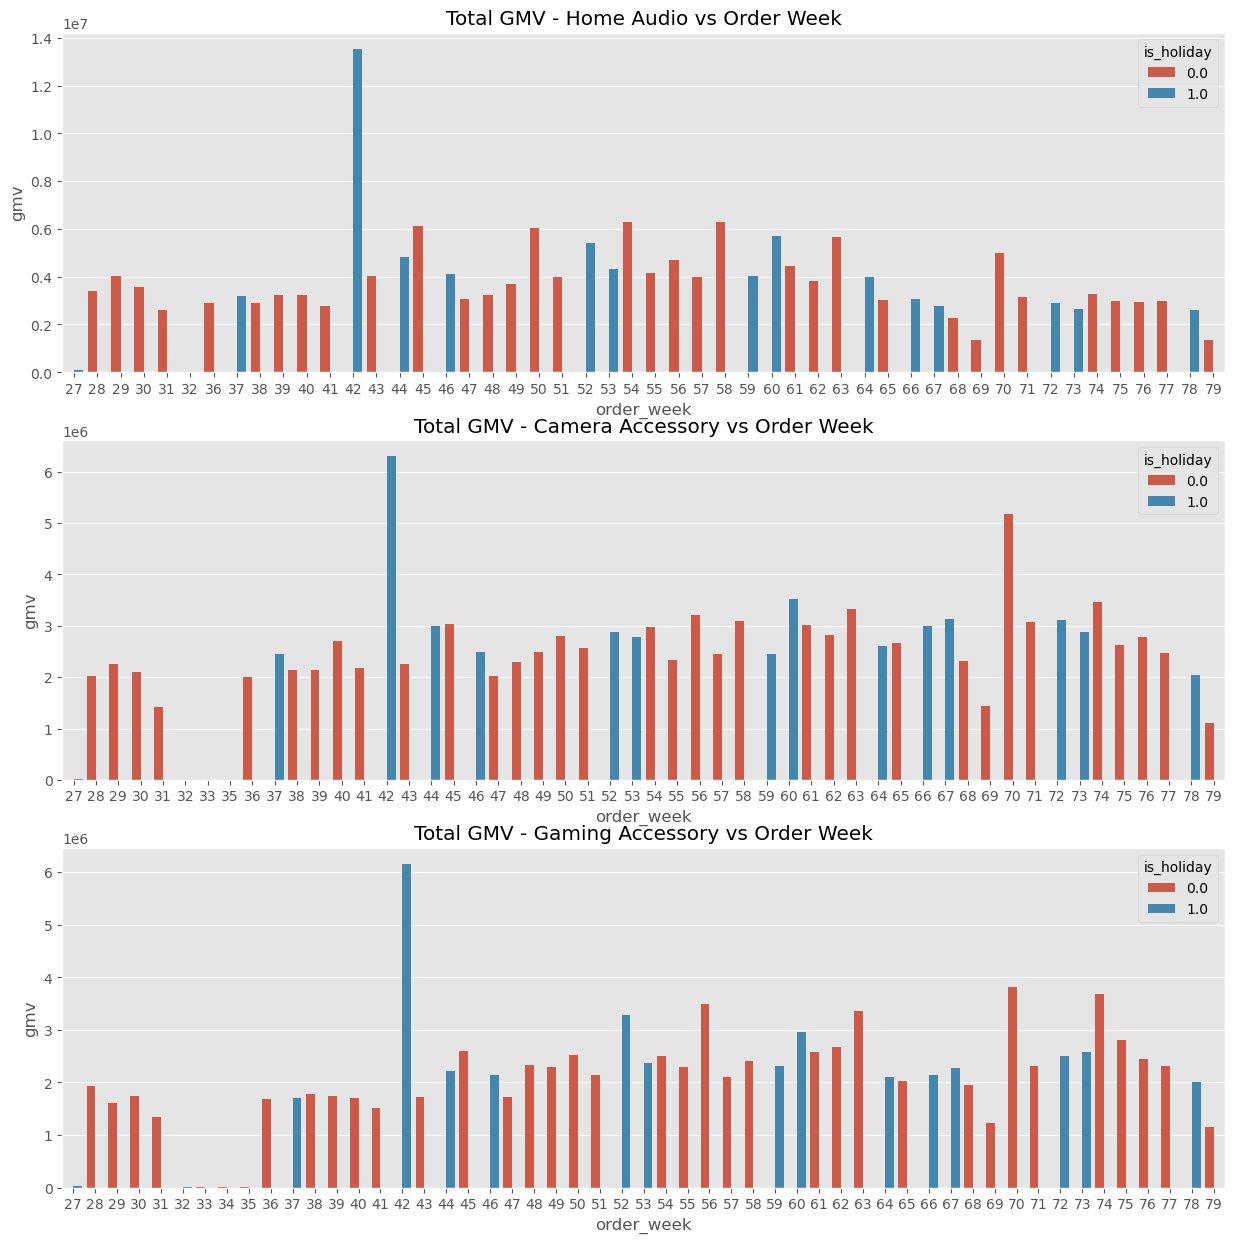

In [137]:
#Analyzing the total gmv over the weeks based upon whether the week contained a holiday or not for all the three categories
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_home_audio_data, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Home Audio vs Order Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_camera_data, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Camera Accessory vs Order Week")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_gaming_data, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Gaming Accessory vs Order Week")


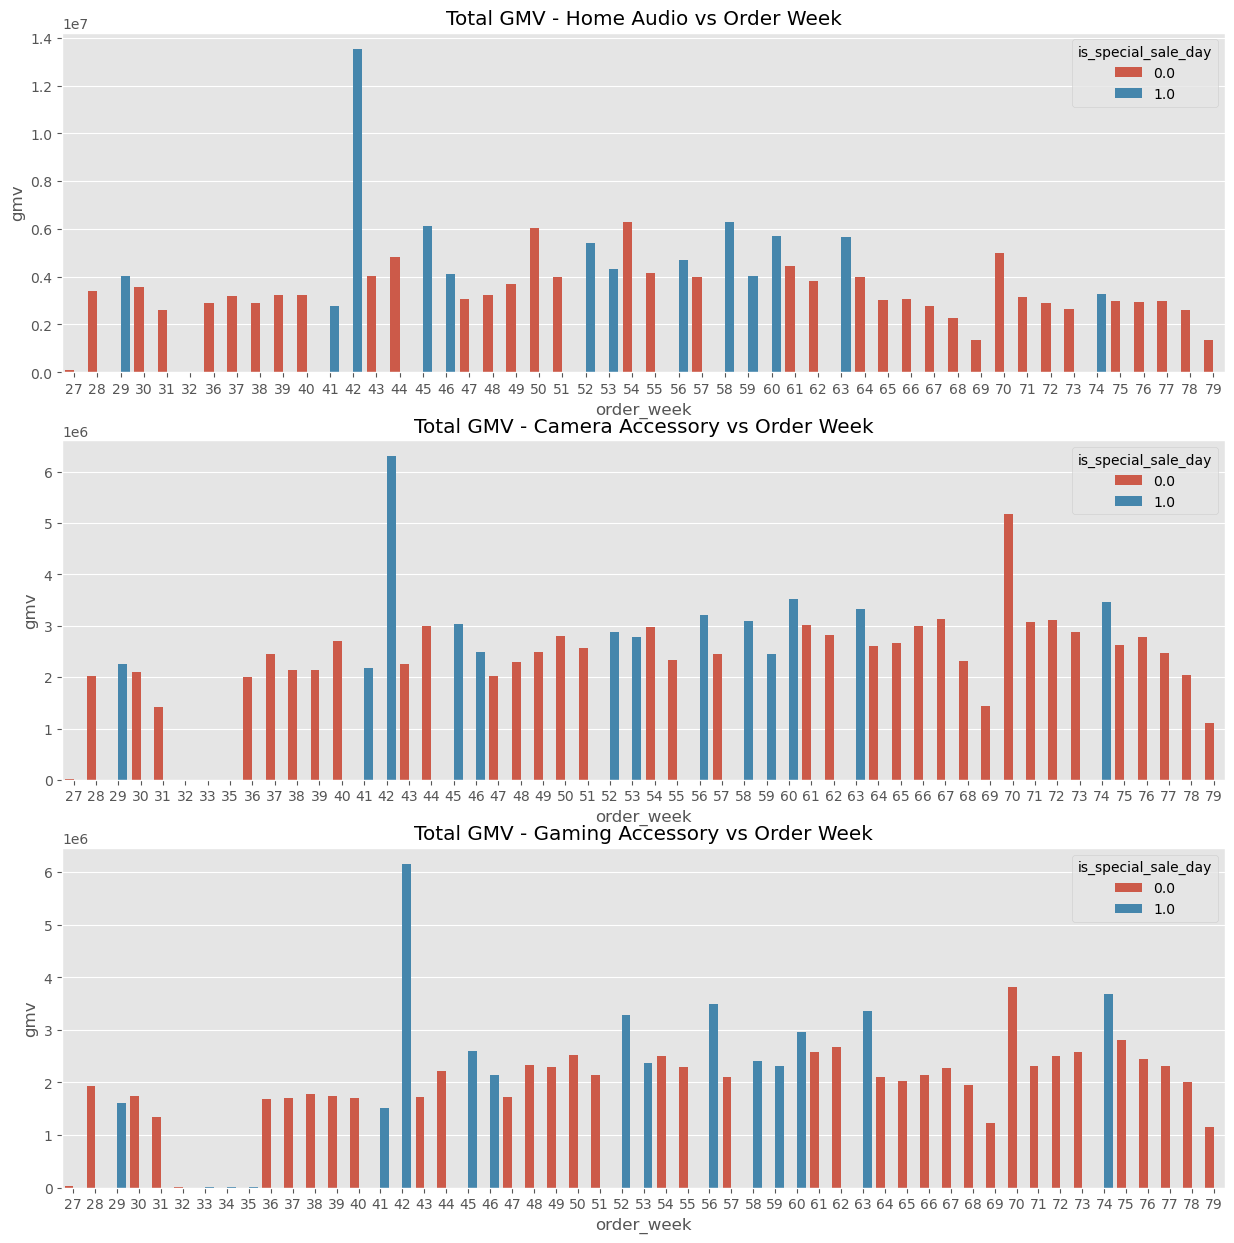

In [138]:
## Analyzing the total gmv over the weeks based upon specialday present in week for all the three categories
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_home_audio_data, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Home Audio vs Order Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_camera_data, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Camera Accessory vs Order Week")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_gaming_data, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Gaming Accessory vs Order Week")


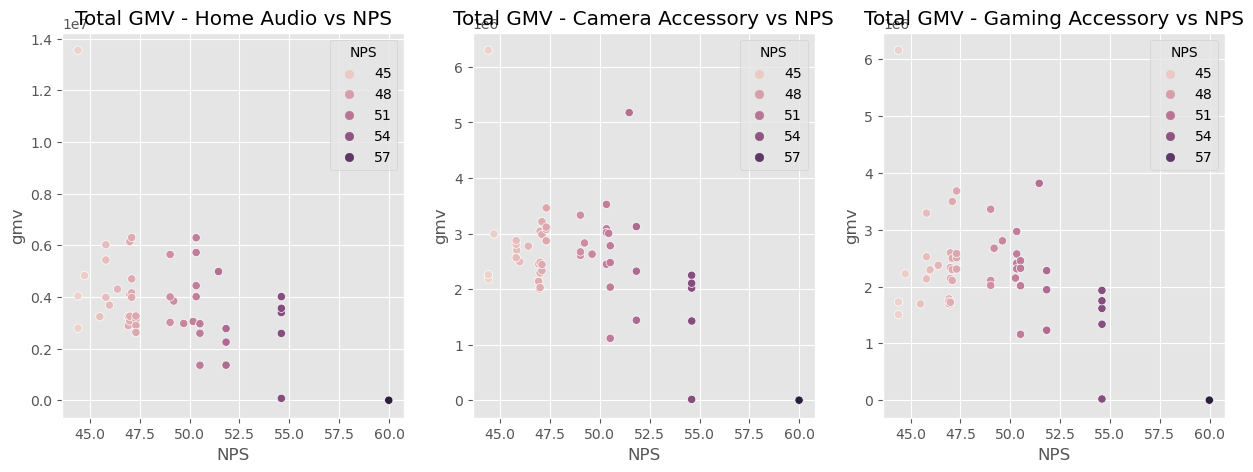

In [139]:
plt.figure(figsize = (15,5))
ax1 = plt.subplot(1, 3, 1)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_home_audio_data, hue = 'NPS')
ax1 = plt.title("Total GMV - Home Audio vs NPS")

ax1 = plt.subplot(1, 3, 2)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_camera_data, hue = 'NPS')
ax1 = plt.title("Total GMV - Camera Accessory vs NPS")

ax1 = plt.subplot(1, 3, 3)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_gaming_data, hue = 'NPS')
ax1 = plt.title("Total GMV - Gaming Accessory vs NPS")


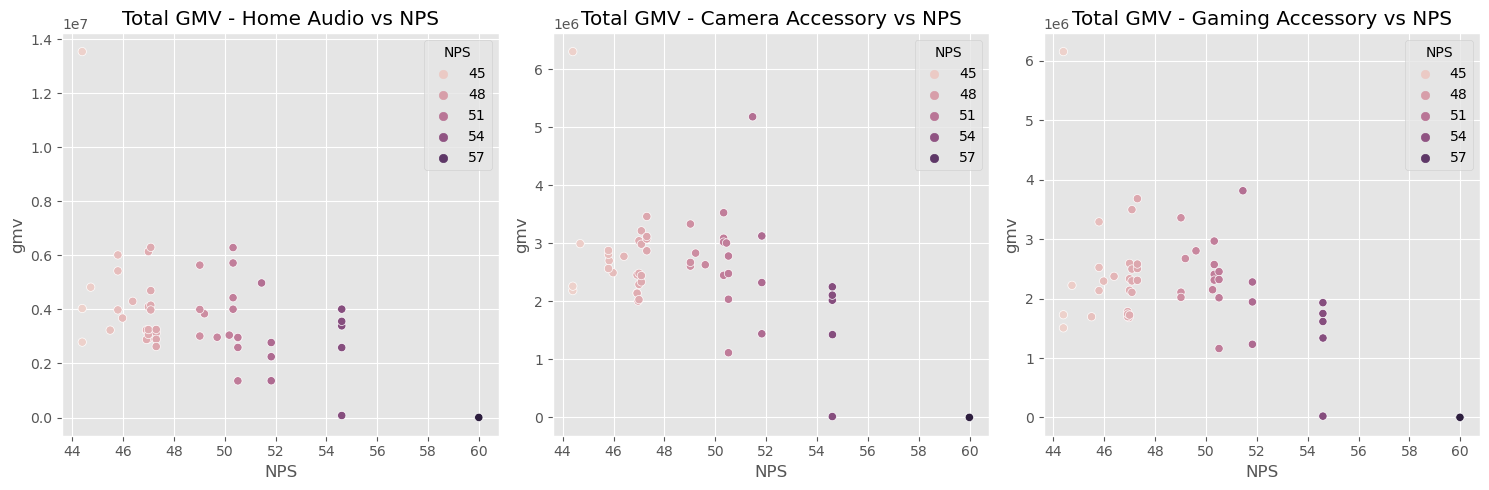

In [140]:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x='NPS', y='gmv', data=final_home_audio_data, hue='NPS', ax=ax1)
plt.title("Total GMV - Home Audio vs NPS")

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(x='NPS', y='gmv', data=final_camera_data, hue='NPS', ax=ax2)
plt.title("Total GMV - Camera Accessory vs NPS")

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x='NPS', y='gmv', data=final_gaming_data, hue='NPS', ax=ax3)
plt.title("Total GMV - Gaming Accessory vs NPS")

plt.tight_layout()
plt.show()


<AxesSubplot:title={'center':'GMV vs NPS:Gaming Accessory'}, xlabel='NPS', ylabel='gmv'>

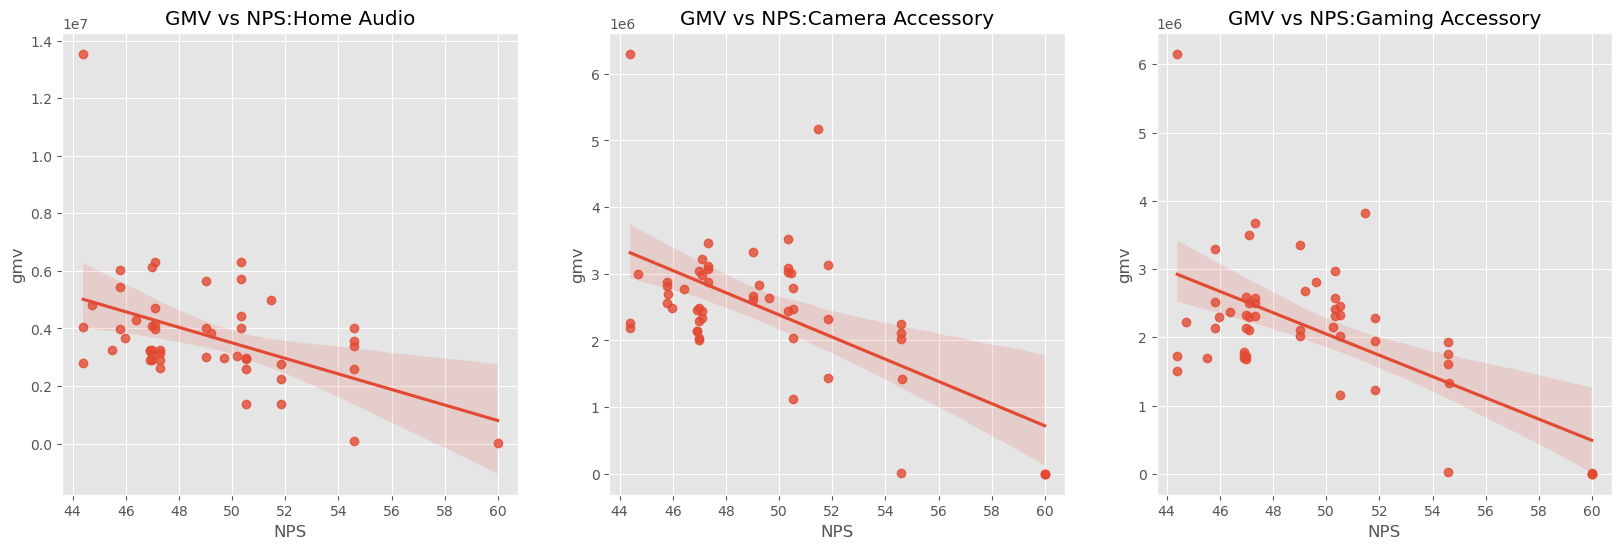

In [141]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
ax1.set_title('GMV vs NPS:Home Audio')
ax2 = fig.add_subplot(132)
ax2.set_title('GMV vs NPS:Camera Accessory')
ax3 = fig.add_subplot(133)
ax3.set_title('GMV vs NPS:Gaming Accessory')

sns.regplot(final_home_audio_data['NPS'],final_home_audio_data['gmv'],ax = ax1)
sns.regplot(final_camera_data['NPS'],final_camera_data['gmv'],ax = ax2)
sns.regplot(final_gaming_data['NPS'],final_gaming_data['gmv'],ax = ax3)

In [142]:
## adding Climate Feature
# Skipping the first 24 rows while reading the data to ignore the metadata
climate_2015 = pd.read_excel('./ONTARIO-2015.xlsx', skiprows=24)

climate_2015.head()


,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.0,NaN,-8.5,NaN,-4.3,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2015,1,2,†,3.0,NaN,-3.0,NaN,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,2015,1,3,†,2.5,NaN,-4.0,NaN,-0.8,...,0.0,NaN,24.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,2015,1,4,†,2.5,NaN,0.0,NaN,1.3,...,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,2015,1,5,†,-10.0,NaN,-13.5,NaN,-11.8,...,3.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [143]:
# Skipping the first 24 rows while reading the data to ignore the metadata

climate_2016 = pd.read_excel('./ONTARIO-2016.xlsx', skiprows=24)


climate_2016.head()


,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# Dropping the columns with all nulls

climate_2015.dropna(axis=1, thresh=1, inplace=True)

climate_2015.reset_index(drop=True, inplace=True)

climate_2016.dropna(axis=1, thresh=1, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)


In [145]:
# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2015.columns:
    if 'Flag' in col:
        print(climate_2015[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2015.drop(drop_cols, axis=1, inplace=True)

print(climate_2015.columns)

M    13
Name: Max Temp Flag, dtype: int64

M    39
Name: Min Temp Flag, dtype: int64

M    39
Name: Mean Temp Flag, dtype: int64

M    39
Name: Heat Deg Days Flag, dtype: int64

M    39
Name: Cool Deg Days Flag, dtype: int64

T    7
Name: Total Rain Flag, dtype: int64

T    9
Name: Total Snow Flag, dtype: int64

T    12
Name: Total Precip Flag, dtype: int64

T    2
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [146]:
# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2016.columns:
    if 'Flag' in col:
        print(climate_2016[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2016.drop(drop_cols, axis=1, inplace=True)

print(climate_2016.columns)

M    1
Name: Max Temp Flag, dtype: int64

M    8
Name: Min Temp Flag, dtype: int64

M    8
Name: Mean Temp Flag, dtype: int64

M    8
Name: Heat Deg Days Flag, dtype: int64

M    8
Name: Cool Deg Days Flag, dtype: int64

T    3
Name: Total Rain Flag, dtype: int64

T    7
Name: Total Snow Flag, dtype: int64

T    7
Name: Total Precip Flag, dtype: int64

T    6
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [147]:
# Formatting column names

climate_2015.columns = [col.replace(' (°C)','').strip() for col in climate_2015.columns]
climate_2016.columns = [col.replace(' (°C)','').strip() for col in climate_2016.columns]


In [148]:
climate_2015

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2015,12,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,2015-12-28,2015,12,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,2015-12-29,2015,12,29,6.5,-2.0,2.3,15.7,0.0,0.0,0.0,0.0,0.0
363,2015-12-30,2015,12,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
climate_2016

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2016-12-27,2016,12,27,0.5,-2.0,-0.8,18.8,0.0,0.0,0.0,0.0,0.0
362,2016-12-28,2016,12,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,2016-12-29,2016,12,29,6.0,-1.5,2.3,15.7,0.0,0.0,0.0,0.0,0.0
364,2016-12-30,2016,12,30,2.5,-2.5,0.0,18.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# Dropping rows where all the columns have nulls

cols = ['Mean Temp',
 'Total Rain (mm)']

climate_2015.dropna(subset=cols, inplace=True)

climate_2015.reset_index(drop=True, inplace=True)

climate_2016.dropna(subset=cols, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)


In [151]:
climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0


In [152]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          190 non-null    datetime64[ns]
 1   Year               190 non-null    int64         
 2   Month              190 non-null    int64         
 3   Day                190 non-null    int64         
 4   Max Temp           190 non-null    float64       
 5   Min Temp           190 non-null    float64       
 6   Mean Temp          190 non-null    float64       
 7   Heat Deg Days      190 non-null    float64       
 8   Cool Deg Days      190 non-null    float64       
 9   Total Rain (mm)    190 non-null    float64       
 10  Total Snow (cm)    190 non-null    float64       
 11  Total Precip (mm)  190 non-null    float64       
 12  Snow on Grnd (cm)  190 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 19.4 KB


In [153]:
import datetime

In [154]:
# Extracting week # from the date field and formatting it

climate_2015['order_week'] = climate_2015['Date/Time'].apply(lambda x: x.strftime("%V"))

climate_2015['order_week'] = climate_2015['order_week'].apply(lambda x: str(x).lstrip('0'))

climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_week
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0,1
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,1
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0,1
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0,1
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0,2


In [155]:
## Extracting week # from the date field and formatting it
climate_2016['order_week'] = climate_2015['Date/Time'].apply(lambda x: x.strftime("%V"))

climate_2016['order_week'] = climate_2015['order_week'].apply(lambda x: str(x).lstrip('0'))

climate_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,1
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,1
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,1
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,1
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,2


In [156]:
climate_2015['order_week'] = climate_2015['order_week'].astype(int)

In [157]:
climate_2016['order_week'] = climate_2016['order_week'].fillna(0).astype(int)

In [158]:
#Mapping order_week according to the new logic
climate_2016['order_week'] = climate_2016.apply(lambda x: mapWeek(x['order_week'],x['Year']), axis = 1)

In [159]:
climate_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,54
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,54
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,54
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,54
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,55


In [160]:
# Extracting July to Dec month's data

climate_2015 = climate_2015[climate_2015['Month'] >= 7]
climate_2015.reset_index(drop=True, inplace=True)

climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_week
0,2015-07-01,2015,7,1,24.5,17.0,20.8,0.0,2.8,0.0,0.0,0.0,0.0,27
1,2015-07-02,2015,7,2,24.0,14.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,27
2,2015-07-03,2015,7,3,25.0,10.0,17.5,0.5,0.0,0.0,0.0,0.0,0.0,27
3,2015-07-04,2015,7,4,26.0,11.0,18.5,0.0,0.5,0.0,0.0,0.0,0.0,27
4,2015-07-05,2015,7,5,28.0,14.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,27


In [161]:
# Extracting Jan to June month's data

climate_2016 = climate_2016[climate_2016['Month'] <= 6]
climate_2016.reset_index(drop=True, inplace=True)

climate_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,54
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,54
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,54
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,54
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,55


In [162]:
climate_2015.sort_values(by=['order_week'], ascending = True, inplace = True)

In [163]:
climate_2016.sort_values(by=['order_week'], ascending = True, inplace = True)

In [164]:
# Getting weekly data

climate_2015 = climate_2015.groupby(['order_week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate_2015.head()

,order_week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,28.0,10.0,19.360000,0.100000,1.460000,0.000000,0.0,0.000000,0.0
1,28,28.0,12.5,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0
2,29,33.0,11.0,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0
3,30,31.5,14.5,23.060000,0.000000,5.060000,1.080000,0.0,1.080000,0.0
4,31,33.5,16.0,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0


In [165]:
# Getting weekly data

climate_2016 = climate_2016.groupby(['order_week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate_2016.head()

,order_week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,34.5,13.0,25.033333,0.000,7.033333,1.733333,0.00,1.733333,0.0
1,54,11.0,-14.0,-2.075000,20.075,0.000000,5.900000,1.75,7.650000,3.0
2,55,4.5,-10.5,-1.350000,19.350,0.000000,3.800000,0.00,3.800000,9.5
3,56,9.5,-9.0,0.100000,17.900,0.000000,5.100000,0.00,5.100000,0.0
4,57,13.0,1.5,7.300000,10.700,0.000000,0.000000,0.00,0.000000,0.0


In [166]:
#Checking duplicates
climate_2015.duplicated().any()

False

In [167]:
climate_2016.duplicated().any()

False

In [168]:
climate_2015.isnull().values.any()

False

In [169]:
climate_2016.isnull().values.any()

False

In [170]:
climate = pd.concat([climate_2015, climate_2016], axis = 0)

climate.shape

(53, 10)

In [171]:
# Dropping redundant columns
climate_data=climate.drop('Max Temp',axis=1)
climate_data=climate_data.drop('Min Temp',axis=1)
climate_data=climate_data.drop('Heat Deg Days',axis=1)
climate_data=climate_data.drop('Cool Deg Days',axis=1)
climate_data=climate_data.drop('Total Snow (cm)',axis=1)
climate_data=climate_data.drop('Total Precip (mm)',axis=1)
climate_data=climate_data.drop('Snow on Grnd (cm)',axis=1)
climate_data.head()

,order_week,Mean Temp,Total Rain (mm)
0,27,19.360000,0.000000
1,28,20.100000,4.416667
2,29,23.183333,1.400000
3,30,23.060000,1.080000
4,31,24.566667,4.633333


In [172]:
final_camera_data_climate = pd.merge(final_camera_data,climate_data, on = "order_week", how = 'inner')
final_gaming_data_climate = pd.merge(final_gaming_data,climate_data, on = "order_week", how = 'inner')
final_home_audio_data_climate = pd.merge(final_home_audio_data,climate_data, on = "order_week", how = 'inner')

## Data Modelling

In [173]:
#Function to calculate the elasticity of the important KPIs
def calculateElasticity(df_train, gmv, coefficient_df):
    elasticity = []
    for i in coefficient_df.feature:
        feature_mean = df_train[i].mean()
        elasticity.append((((coefficient_df.loc[coefficient_df['feature']==i]['coefficient'].mean())*feature_mean)/gmv.mean()))
    coefficient_df['elasticity'] = pd.Series(elasticity)
    return coefficient_df

#### Building the Basic Linear Models camera accessory

In [174]:
# taking the final camera accessory data for basic linear mode
final_camera_data.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,13.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,433.0,0.0,226.0,17.0,0.0,366.0,0.0,0.0,13.0,16.0
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,491.0,0.0,188.0,23.0,0.0,382.0,0.0,0.0,24.0,22.0
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,457.0,0.0,194.0,18.0,0.0,423.0,0.0,0.0,23.0,30.0
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,363.0,0.0,112.0,26.0,0.0,233.0,0.0,0.0,23.0,13.0


In [175]:
# dropping the uncontrolable factors=
df = final_camera_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [176]:
# checking the number of columns in the dataset
len(df.columns)

46

In [177]:
# printing the columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [178]:
# splitting the data into test and train set
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [179]:
scaler = MinMaxScaler()

In [180]:
# Apply scaler() to all the columns except the categorical variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [181]:
# assigning the x_train and y_train values
y_train = df_train.pop('gmv')
X_train = df_train

### RFE

In [183]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your feature and target variables
lm = LinearRegression()

rfe = RFE(estimator=lm, n_features_to_select=20)
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=20)

In [184]:
# selecting  the top 20 features selected by rfe
col = X_train.columns[rfe.support_]
col

Index(['adStock_TV', 'adStock_Digital', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'product_procurement_sla', 'NPS', 'Binoculars', 'CameraBattery',
       'CameraBatteryCharger', 'CameraFilmRolls', 'CameraMicrophone', 'Filter',
       'Flash', 'ReflectorUmbrella', 'Strap', 'Telescope'],
      dtype='object')

In [185]:
#checking  the features which are not included in the top 20 
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'discount', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day',
       'CameraAccessory', 'CameraBag', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraHousing', 'CameraMount', 'CameraRemoteControl', 'CameraTripod',
       'ExtensionTube', 'FlashShoeAdapter', 'Lens', 'Softbox'],
      dtype='object')

In [186]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [187]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           8.29e-19
Time:                        20:32:02   Log-Likelihood:                 125.60
No. Observations:                  41   AIC:                            -209.2
Df Residuals:                      20   BIC:                            -173.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,5004.65
2,adStock_Digital,3555.79
3,adStock_Online marketing,2679.83
4,adStock_ Affiliates,2408.77
6,adStock_Radio,1566.53
7,adStock_Other,1500.77
0,const,549.55
1,adStock_TV,234.17
13,CameraBatteryCharger,23.97
15,CameraMicrophone,21.33


In [188]:
#removing the feature with highest p-values
X_train_new= X_train_rfe.drop(["CameraBatteryCharger"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     215.5
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           7.05e-20
Time:                        20:32:03   Log-Likelihood:                 125.10
No. Observations:                  41   AIC:                            -210.2
Df Residuals:                      21   BIC:                            -175.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,4578.06
2,adStock_Digital,3268.93
3,adStock_Online marketing,2436.39
4,adStock_ Affiliates,2249.87
6,adStock_Radio,1564.57
7,adStock_Other,1496.67
0,const,546.16
1,adStock_TV,226.77
10,NPS,14.23
19,Telescope,12.20


In [189]:
#removing the feature with highest p-values
X_train_new1 = X_train_new.drop(["NPS"], axis = 1)

X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     221.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           9.76e-21
Time:                        20:33:42   Log-Likelihood:                 123.63
No. Observations:                  41   AIC:                            -209.3
Df Residuals:                      22   BIC:                            -176.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,3367.34
2,adStock_Digital,2381.04
3,adStock_Online marketing,2293.59
4,adStock_ Affiliates,2073.27
6,adStock_Radio,1198.73
7,adStock_Other,1146.46
0,const,523.80
1,adStock_TV,187.18
18,Telescope,11.68
11,CameraBattery,10.02


In [190]:
#removing the feature with highest p-values
X_train_new2 = X_train_new1.drop(["CameraMicrophone"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     219.4
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           2.17e-21
Time:                        20:34:05   Log-Likelihood:                 121.35
No. Observations:                  41   AIC:                            -206.7
Df Residuals:                      23   BIC:                            -175.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,2767.76
2,adStock_Digital,1999.06
3,adStock_Online marketing,1681.75
4,adStock_ Affiliates,1512.07
6,adStock_Radio,1164.16
7,adStock_Other,1107.41
0,const,504.77
1,adStock_TV,155.35
17,Telescope,11.00
11,CameraBattery,9.55


In [191]:
# dropping feature based on the highest p-value
X_train_new3 = X_train_new2.drop(["Telescope"], axis = 1)

X_train_lm = sm.add_constant(X_train_new3)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     216.4
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           5.46e-22
Time:                        20:34:29   Log-Likelihood:                 118.96
No. Observations:                  41   AIC:                            -203.9
Df Residuals:                      24   BIC:                            -174.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,2767.55
2,adStock_Digital,1998.00
3,adStock_Online marketing,1561.81
4,adStock_ Affiliates,1392.08
6,adStock_Radio,1161.77
7,adStock_Other,1104.48
0,const,504.58
1,adStock_TV,155.31
11,CameraBattery,8.37
10,Binoculars,7.98


In [192]:
#removing the feature with highest p-values
X_train_new4 = X_train_new3.drop(["ReflectorUmbrella"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
 
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           2.27e-21
Time:                        20:34:47   Log-Likelihood:                 112.05
No. Observations:                  41   AIC:                            -192.1
Df Residuals:                      25   BIC:                            -164.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,2460.57
2,adStock_Digital,1795.34
3,adStock_Online marketing,1259.12
6,adStock_Radio,1137.83
4,adStock_ Affiliates,1125.10
7,adStock_Other,1079.66
0,const,476.12
1,adStock_TV,144.54
10,Binoculars,7.85
14,Flash,7.79


In [193]:
#removing the feature with highest p-values
X_train_new5 = X_train_new4.drop(["sla"], axis = 1)
# Add a constant
X_train_lm = sm.add_constant(X_train_new5)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     147.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           4.23e-21
Time:                        20:35:05   Log-Likelihood:                 106.86
No. Observations:                  41   AIC:                            -183.7
Df Residuals:                      26   BIC:                            -158.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,1507.33
2,adStock_Digital,1097.42
3,adStock_Online marketing,954.14
4,adStock_ Affiliates,807.28
6,adStock_Radio,711.74
7,adStock_Other,670.66
0,const,135.61
1,adStock_TV,84.85
9,Binoculars,7.83
13,Flash,7.79


In [194]:
#removing the feature with highest p-values
X_train_new6 = X_train_new5.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           5.98e-22
Time:                        20:35:21   Log-Likelihood:                 105.91
No. Observations:                  41   AIC:                            -183.8
Df Residuals:                      27   BIC:                            -159.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,1123.96
2,adStock_Digital,815.11
3,adStock_Online marketing,802.82
4,adStock_ Affiliates,652.26
6,adStock_Radio,562.10
7,adStock_Other,531.45
1,adStock_TV,63.90
0,const,59.92
8,Binoculars,7.83
12,Flash,7.79


In [195]:
#removing the feature with highest p-values
X_train_new7= X_train_new6.drop(["CameraFilmRolls"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.02e-22
Time:                        20:35:58   Log-Likelihood:                 104.65
No. Observations:                  41   AIC:                            -183.3
Df Residuals:                      28   BIC:                            -161.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,1095.51
3,adStock_Online marketing,787.26
2,adStock_Digital,787.01
4,adStock_ Affiliates,638.86
6,adStock_Radio,550.70
7,adStock_Other,522.79
1,adStock_TV,63.03
0,const,56.18
8,Binoculars,7.82
11,Flash,6.77


In [196]:
#removing the feature with highest p-values
X_train_new8= X_train_new7.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     94.61
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.18e-19
Time:                        20:36:14   Log-Likelihood:                 90.860
No. Observations:                  41   AIC:                            -157.7
Df Residuals:                      29   BIC:                            -137.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Online marketing,316.59
4,adStock_ Affiliates,251.80
5,adStock_Radio,207.36
6,adStock_Other,183.66
1,adStock_TV,23.80
0,const,12.83
7,Binoculars,7.81
11,Strap,5.92
10,Flash,5.67
8,CameraBattery,5.52


In [197]:
#removing the feature with highest p-values
X_train_new9= X_train_new8.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.10e-20
Time:                        20:36:33   Log-Likelihood:                 90.859
No. Observations:                  41   AIC:                            -159.7
Df Residuals:                      30   BIC:                            -140.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_ Affiliates,182.29
3,adStock_Online marketing,165.05
0,const,12.49
9,Flash,5.63
10,Strap,5.45
6,Binoculars,5.40
1,adStock_TV,4.88
8,Filter,4.56
2,adStock_Digital,4.24
7,CameraBattery,3.91


In [198]:
#removing the feature with highest p-values
X_train_new10= X_train_new9.drop(["Flash"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.11e-21
Time:                        20:36:52   Log-Likelihood:                 90.660
No. Observations:                  41   AIC:                            -161.3
Df Residuals:                      31   BIC:                            -144.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_ Affiliates,175.44
3,adStock_Online marketing,158.62
0,const,11.07
1,adStock_TV,4.83
6,Binoculars,4.70
8,Filter,4.54
2,adStock_Digital,3.76
7,CameraBattery,3.58
9,Strap,2.74
5,adStock_Other,1.51


In [199]:
#removing the feature with highest p-values
X_train_new11= X_train_new10.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.38e-22
Time:                        20:37:09   Log-Likelihood:                 90.100
No. Observations:                  41   AIC:                            -162.2
Df Residuals:                      32   BIC:                            -146.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,adStock_Online marketing,93.03
3,adStock_ Affiliates,86.79
0,const,10.83
5,Binoculars,4.70
7,Filter,4.45
6,CameraBattery,3.39
8,Strap,2.70
1,adStock_Digital,2.35
4,adStock_Other,1.48


In [200]:
#removing the feature with highest p-values
X_train_new12= X_train_new11.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new12)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     155.6
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           2.13e-23
Time:                        20:37:24   Log-Likelihood:                 89.195
No. Observations:                  41   AIC:                            -162.4
Df Residuals:                      33   BIC:                            -148.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,adStock_Online marketing,92.97
3,adStock_ Affiliates,86.10
0,const,10.78
4,Binoculars,4.43
6,Filter,4.36
5,CameraBattery,3.39
7,Strap,2.68
1,adStock_Digital,2.23


In [201]:
#removing the feature with highest vif as all the p-values were in the acceptable range.
X_train_new13= X_train_new12.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           5.09e-24
Time:                        20:37:43   Log-Likelihood:                 87.702
No. Observations:                  41   AIC:                            -161.4
Df Residuals:                      34   BIC:                            -149.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,10.30
3,Binoculars,4.42
5,Filter,4.32
4,CameraBattery,3.34
6,Strap,2.65
2,adStock_Online marketing,1.83
1,adStock_Digital,1.79


In [202]:
#removing the feature with highest p-values
X_train_new14= X_train_new13.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     198.9
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.16e-24
Time:                        20:37:58   Log-Likelihood:                 86.219
No. Observations:                  41   AIC:                            -160.4
Df Residuals:                      35   BIC:                            -150.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,10.14
4,Filter,4.22
2,Binoculars,4.16
3,CameraBattery,3.34
5,Strap,2.07
1,adStock_Online marketing,1.68


###### Selecting this as our first model for evaluation as all the p-values & VIFs are in the acceptable range

In [203]:
# Dropping feature based on the highest p-value
X_train_new15= X_train_new14.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new15)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.11e-24
Time:                        20:39:36   Log-Likelihood:                 83.029
No. Observations:                  41   AIC:                            -156.1
Df Residuals:                      36   BIC:                            -147.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0197      0.016      1.231

,Features,VIF
0,const,9.03
3,Filter,4.09
1,Binoculars,3.98
2,CameraBattery,3.15
4,Strap,1.73


##### Selecting this as our second model for evaluation as all the p-values & VIFs are in the acceptable range & there is not much drop in the value of adjusted R-square

In [204]:
# Dropping another feature to see if the model is able to explain the variance with one less feature or not based upon minimum loss in adjusted r-squared
X_train_new16= X_train_new15.drop(["CameraBattery"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     223.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           9.30e-24
Time:                        20:40:16   Log-Likelihood:                 77.408
No. Observations:                  41   AIC:                            -146.8
Df Residuals:                      37   BIC:                            -140.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0441      0.016      2.733      0.0

,Features,VIF
0,const,7.18
1,Binoculars,3.91
2,Filter,3.27
3,Strap,1.38


###### Selecting this as our third model for evaluation as all the p-values & VIFs are in the acceptable range & there is not much drop in the value of adjusted R-square

In [205]:
# Dropping another feature to see if the model is able to explain the variance with one less feature or not based upon minimum loss in adjusted r-squared
X_train_new17= X_train_new16.drop(["Binoculars"], axis = 1)
 # Add a constant
X_train_lm4 = sm.add_constant(X_train_new17)
    # Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.params
print(lr4.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm4 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm4 .values, i) for i in range(X_train_lm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.08e-21
Time:                        20:41:42   Log-Likelihood:                 68.984
No. Observations:                  41   AIC:                            -132.0
Df Residuals:                      38   BIC:                            -126.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0523      0.019      2.691      0.0

,Features,VIF
0,const,7.08
1,Filter,1.11
2,Strap,1.11


###### Selecting this as our fourth model for evaluation as all the p-values & VIFs are in the acceptable range & there is not much drop in the value of adjusted R-square

In [206]:
# k-fold CV - adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm, X_train_lm2, X_train_lm3, X_train_lm4]
for i in range(0,len(x_trains)):
    x_test = df[x_trains[i].drop('const',axis = 1).columns]
    x_test = sm.add_constant(x_test)
    y_test = df['gmv']
    scores = cross_val_score(lm, x_test, y_test , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.5671595846317571
lr model 2 r2_score 0.4742062650940852
lr model 3 r2_score 0.4155578660449487
lr model 4 r2_score 0.3736566495627495


In [207]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [208]:
# k-fold CV
lm = LinearRegression()
# scores = cross_val_score(lm, X_train_lm4, y_train, scoring='r2', cv=5)
# scores

#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm, X_train_lm2, X_train_lm3, X_train_lm4]
for i in range(0,len(x_trains)):
    x_test = df[x_trains[i].drop('const',axis = 1).columns]
    x_test = sm.add_constant(x_test)
    y_test = df['gmv']
    scores = cross_val_score(lm, x_trains[i], y_train , scoring='neg_mean_squared_error', cv=10)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.001807100139691704
lr model 2 MSE 0.002366523396743719
lr model 3 MSE 0.0034810533940532475
lr model 4 MSE 0.004558406628348922


### Model Evaluation

In [209]:
y_test = df_test.pop('gmv')
X_test = df_test

In [210]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [211]:
X_test.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
6,33,8,2015,0.000000,0.387803,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
32,60,2,2016,0.440584,0.588921,0.211609,0.718614,0.866206,0.972552,0.329271,...,0.969427,0.0,0.692308,0.686877,0.0,0.626277,0.0,0.0,0.767442,0.460317
38,66,4,2016,0.990971,0.300736,0.617353,0.191557,0.671023,0.790947,0.230894,...,0.713376,0.4,0.720000,0.627544,0.0,0.600000,0.0,0.5,0.720930,0.666667
35,63,3,2016,1.000000,0.579623,0.611897,0.418960,0.681721,0.785803,0.251681,...,0.791083,1.0,1.000000,0.657861,0.0,0.681752,1.0,0.0,0.976744,0.746032
33,61,2,2016,0.422372,0.644730,0.222695,0.696666,0.857921,0.963873,0.336290,...,0.960510,0.6,0.649231,0.879168,0.0,0.551825,0.0,0.5,0.976744,0.682540


In [212]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,adStock_Digital,adStock_Online marketing,adStock_ Affiliates,Binoculars,CameraBattery,Filter,Strap
6,1.0,0.387803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
32,1.0,0.588921,0.866206,0.972552,0.876866,1.000000,0.692308,0.767442
38,1.0,0.300736,0.671023,0.790947,0.925373,0.746073,0.720000,0.720930
35,1.0,0.579623,0.681721,0.785803,0.910448,0.749346,1.000000,0.976744
33,1.0,0.644730,0.857921,0.963873,0.985075,0.545812,0.649231,0.976744
51,1.0,0.214785,0.277200,0.326371,0.417910,0.165576,0.335385,0.465116
5,1.0,0.483964,0.006601,0.009083,0.000000,0.000000,0.000000,0.000000
26,1.0,0.399872,0.877653,0.952215,0.858209,0.363874,0.695385,0.604651
25,1.0,1.000000,0.770804,0.808525,0.861940,0.419503,0.784615,0.651163
45,1.0,0.000000,1.000000,1.000000,1.000000,0.496073,0.640000,1.000000


In [213]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

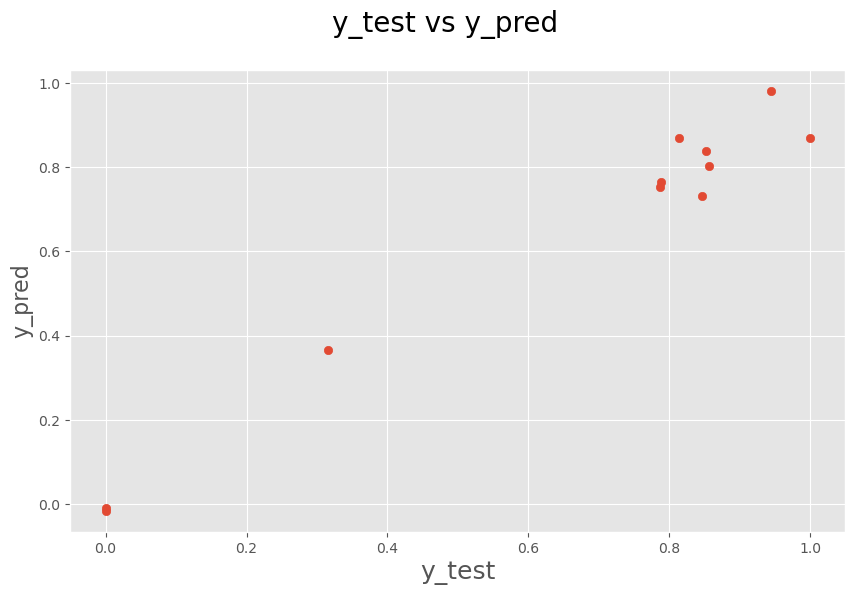

In [214]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

#### Elasticity - Camera Accessory - Basic Linear Model

In [215]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

<AxesSubplot:xlabel='elasticity', ylabel='feature'>

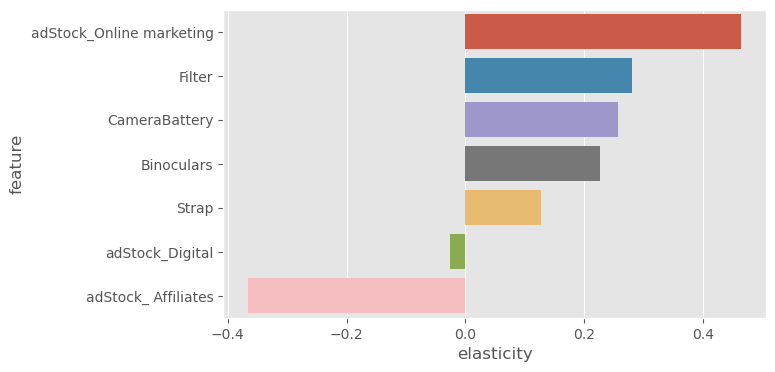

In [216]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

#### Gaming Accessory - Basic Linear Model

In [217]:
# Creating df1 by dropping the features which the company cannot control
df1= final_gaming_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [218]:
#Checking the columns
df1.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day'],
      dtype='object')

In [219]:
#Doing the test train split
np.random.seed(0)
df1_train, df1_test = train_test_split(df1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [222]:
#Scaling the features
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars1=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days']
df1_train[num_vars1] = scaler.fit_transform(df1_train[num_vars1])
df1_test[num_vars1] = scaler.fit_transform(df1_test[num_vars1])

In [223]:
# assiging the values for x_train & y_train
y_train1 = df1_train.pop('gmv')
X_train1 = df1_train

#### RFE

In [242]:
# Running RFE with the output number of the variable equal to 20

lm = LinearRegression()

rfe = RFE(estimator=lm, n_features_to_select=20)
rfe.fit(X_train1, y_train1)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [243]:
## selecting the top 20 rfe features
col = X_train1.columns[rfe.support_]
col

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'NPS', 'discount', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day'],
      dtype='object')

In [244]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_train1[col]

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe1)
# Create a first fitted model
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     5.335
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           0.000171
Time:                        21:06:24   Log-Likelihood:                 54.163
No. Observations:                  42   AIC:                            -66.33
Df Residuals:                      21   BIC:                            -29.83
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,1.107943e+10
10,adStock_SEM,4.938500e+03
5,adStock_Digital,2.695940e+03
12,adStock_Other,2.453750e+03
11,adStock_Radio,2.442490e+03
9,adStock_ Affiliates,1.450910e+03
8,adStock_Online marketing,1.274730e+03
3,Year,6.805700e+02
7,adStock_Content Marketing,4.377100e+02
4,adStock_TV,3.875000e+02


In [245]:
# removing the feature with highest p-value
X_train1_new= X_train_rfe1.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new)
  
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     5.687
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           8.87e-05
Time:                        21:06:25   Log-Likelihood:                 53.568
No. Observations:                  42   AIC:                            -67.14
Df Residuals:                      22   BIC:                            -32.38
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,1.041369e+10
9,adStock_SEM,4.911180e+03
5,adStock_Digital,2.676730e+03
11,adStock_Other,2.443450e+03
10,adStock_Radio,2.439990e+03
3,Year,6.396900e+02
7,adStock_Content Marketing,4.371900e+02
4,adStock_TV,3.621400e+02
2,Month,2.390000e+02
1,order_week,2.321300e+02


In [246]:
# dropping feature on the basis of highest p-value
X_train1_new1= X_train1_new.drop(["total_holidays"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new1)

lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     6.249
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           3.53e-05
Time:                        21:06:26   Log-Likelihood:                 53.492
No. Observations:                  42   AIC:                            -68.98
Df Residuals:                      23   BIC:                            -35.97
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,9.447005e+09
9,adStock_SEM,4.777550e+03
5,adStock_Digital,2.603920e+03
11,adStock_Other,2.390480e+03
10,adStock_Radio,2.380860e+03
3,Year,5.803100e+02
7,adStock_Content Marketing,4.358900e+02
4,adStock_TV,3.577100e+02
2,Month,2.166500e+02
1,order_week,1.982300e+02


In [247]:
# removing feature on the basis of highest vif value  as all the p-values are in acceptable range
X_train1_new2= X_train1_new1.drop(["is_holiday"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new2)
    # Create a first fitted model
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     6.860
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.37e-05
Time:                        21:06:27   Log-Likelihood:                 53.381
No. Observations:                  42   AIC:                            -70.76
Df Residuals:                      24   BIC:                            -39.48
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,8.961184e+09
9,adStock_SEM,4.754330e+03
5,adStock_Digital,2.591710e+03
11,adStock_Other,2.384680e+03
10,adStock_Radio,2.376890e+03
3,Year,5.504600e+02
7,adStock_Content Marketing,4.345500e+02
4,adStock_TV,3.574600e+02
2,Month,2.062500e+02
1,order_week,1.905000e+02


In [248]:
# removing feature on the basis of highest p-value
X_train1_new3= X_train1_new2.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new3)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     6.768
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.36e-05
Time:                        21:06:28   Log-Likelihood:                 51.400
No. Observations:                  42   AIC:                            -68.80
Df Residuals:                      25   BIC:                            -39.26
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [249]:
# removing feature on the basis of highest p-value
X_train1_new4= X_train1_new3.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new4)
   
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     5.487
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           7.98e-05
Time:                        21:06:28   Log-Likelihood:                 46.218
No. Observations:                  42   AIC:                            -60.44
Df Residuals:                      26   BIC:                            -32.63
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
7,adStock_SEM,2669.97
4,adStock_Digital,1972.57
8,adStock_Radio,1070.31
9,adStock_Other,847.57
0,const,720.25
3,adStock_TV,73.62
6,adStock_ Affiliates,41.27
5,adStock_Sponsorship,39.76
2,Month,17.07
12,NPS,13.30


In [250]:
# removing feature on the basis of highest p-value
X_train1_new5= X_train1_new4.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new5)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     4.228
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           0.000651
Time:                        21:06:29   Log-Likelihood:                 40.630
No. Observations:                  42   AIC:                            -51.26
Df Residuals:                      27   BIC:                            -25.19
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
7,adStock_SEM,2651.87
4,adStock_Digital,1964.59
8,adStock_Radio,1052.43
9,adStock_Other,813.03
0,const,552.66
3,adStock_TV,61.43
5,adStock_Sponsorship,27.27
6,adStock_ Affiliates,18.70
2,Month,14.78
14,is_special_sale_day,6.07


In [251]:
# removing feature on the basis of highest p-value
X_train1_new6= X_train1_new5.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new6)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     4.711
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           0.000290
Time:                        21:06:30   Log-Likelihood:                 40.595
No. Observations:                  42   AIC:                            -53.19
Df Residuals:                      28   BIC:                            -28.86
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
7,adStock_SEM,2556.40
4,adStock_Digital,1894.73
8,adStock_Radio,1041.41
9,adStock_Other,807.14
0,const,552.56
3,adStock_TV,61.41
5,adStock_Sponsorship,25.84
6,adStock_ Affiliates,15.50
2,Month,14.12
1,order_week,5.85


In [252]:
# removing feature on the basis of highest p-value
X_train1_new7= X_train1_new6.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new7)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     4.061
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           0.000985
Time:                        21:06:31   Log-Likelihood:                 36.958
No. Observations:                  42   AIC:                            -47.92
Df Residuals:                      29   BIC:                            -25.33
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,153.68
8,adStock_Other,84.23
7,adStock_Radio,82.01
3,adStock_TV,20.74
5,adStock_ Affiliates,13.48
4,adStock_Sponsorship,7.08
1,order_week,5.64
6,adStock_SEM,5.47
11,total_special_sale_days,5.44
12,is_special_sale_day,5.25


In [253]:
# removing feature on the basis of highest p-value
X_train1_new8= X_train1_new7.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new8)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     4.469
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           0.000529
Time:                        21:06:31   Log-Likelihood:                 36.627
No. Observations:                  42   AIC:                            -49.25
Df Residuals:                      30   BIC:                            -28.40
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,146.25
5,adStock_ Affiliates,6.41
4,adStock_Sponsorship,6.34
6,adStock_SEM,5.44
10,total_special_sale_days,5.43
11,is_special_sale_day,5.23
1,order_week,5.15
2,Month,4.51
3,adStock_TV,3.70
7,adStock_Radio,3.41


In [254]:
# removing feature on the basis of highest p-value
X_train1_new9= X_train1_new8.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new9)
   
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5.061
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           0.000228
Time:                        21:06:32   Log-Likelihood:                 36.580
No. Observations:                  42   AIC:                            -51.16
Df Residuals:                      31   BIC:                            -32.04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,146.25
5,adStock_ Affiliates,5.99
9,total_special_sale_days,5.29
10,is_special_sale_day,4.90
1,order_week,4.74
2,Month,4.49
3,adStock_TV,3.61
6,adStock_Radio,3.41
7,product_procurement_sla,2.86
4,adStock_Sponsorship,2.58


In [255]:
# removing feature on the basis of highest p-value
X_train1_new10= X_train1_new9.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new10)

lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5.801
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           8.96e-05
Time:                        18:48:52   Log-Likelihood:                 36.572
No. Observations:                  42   AIC:                            -53.14
Df Residuals:                      32   BIC:                            -35.77
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,128.45
8,total_special_sale_days,5.07
9,is_special_sale_day,4.83
1,order_week,4.50
5,adStock_ Affiliates,3.75
3,adStock_TV,3.16
6,product_procurement_sla,2.86
2,Month,2.75
4,adStock_Sponsorship,2.53
7,discount,1.78


In [256]:
# removing feature on the basis of highest p-value
X_train1_new12= X_train1_new10.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new12)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     5.574
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           0.000170
Time:                        18:49:30   Log-Likelihood:                 34.206
No. Observations:                  42   AIC:                            -50.41
Df Residuals:                      33   BIC:                            -34.77
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,126.41
7,total_special_sale_days,5.04
8,is_special_sale_day,4.81
1,order_week,4.50
2,Month,2.69
5,product_procurement_sla,2.66
4,adStock_Sponsorship,2.40
3,adStock_TV,1.95
6,discount,1.58


In [257]:
# removing feature on the basis of highest p-value
X_train1_new13= X_train1_new12.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new12)
    
lr1= sm.OLS(y_train1, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     5.574
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           0.000170
Time:                        18:50:45   Log-Likelihood:                 34.206
No. Observations:                  42   AIC:                            -50.41
Df Residuals:                      33   BIC:                            -34.77
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,126.41
7,total_special_sale_days,5.04
8,is_special_sale_day,4.81
1,order_week,4.50
2,Month,2.69
5,product_procurement_sla,2.66
4,adStock_Sponsorship,2.40
3,adStock_TV,1.95
6,discount,1.58


In [258]:
# removing feature on the basis of highest p-value
X_train1_new14= X_train1_new13.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new14)
    
lr1= sm.OLS(y_train1, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     7.258
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           4.34e-05
Time:                        18:53:42   Log-Likelihood:                 33.228
No. Observations:                  42   AIC:                            -52.46
Df Residuals:                      35   BIC:                            -40.29
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,41.73
5,total_special_sale_days,4.29
6,is_special_sale_day,4.21
2,Month,2.04
1,order_week,1.93
4,discount,1.56
3,adStock_Sponsorship,1.40


In [259]:
# removing feature on the basis of highest p-value
X_train1_new15= X_train1_new14.drop(["Month"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new15)
    
lr1= sm.OLS(y_train1, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     7.735
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           5.04e-05
Time:                        18:55:05   Log-Likelihood:                 31.575
No. Observations:                  42   AIC:                            -51.15
Df Residuals:                      36   BIC:                            -40.72
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,19.96
4,total_special_sale_days,3.97
5,is_special_sale_day,3.96
3,discount,1.55
1,order_week,1.41
2,adStock_Sponsorship,1.03


In [262]:
# removing feature on the basis of highest p-value
X_train1_new16= X_train1_new15.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train1_new16)
    
lr2= sm.OLS(y_train1, X_train_lm1).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     6.515
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           0.000450
Time:                        19:01:07   Log-Likelihood:                 27.449
No. Observations:                  42   AIC:                            -44.90
Df Residuals:                      37   BIC:                            -36.21
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,17.62
4,is_special_sale_day,3.88
3,total_special_sale_days,3.84
2,discount,1.55
1,order_week,1.41


In [265]:
# removing feature on the basis of highest p-value
X_train1_new17= X_train1_new16.drop(["order_week"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train1_new17)
    
lr3= sm.OLS(y_train1, X_train_lm1).fit()

lr3.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     6.515
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           0.000450
Time:                        19:02:14   Log-Likelihood:                 27.449
No. Observations:                  42   AIC:                            -44.90
Df Residuals:                      37   BIC:                            -36.21
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,13.14
2,total_special_sale_days,3.84
3,is_special_sale_day,3.73
1,discount,1.14


In [266]:
#Checking performance of top 3 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train1 , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score -0.5365941576305588
lr model 2 r2_score -0.42353164969361173
lr model 3 r2_score -0.5365941576305588


In [267]:
#Checking performance of top 4 models finding MSE
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train1 , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.030338284559270578
lr model 2 MSE 0.0301428126124542
lr model 3 MSE 0.030338284559270578


#### Model Evaluation

In [268]:
y_test = df1_test.pop('gmv')
X_test = df1_test

In [269]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'NPS', 'discount', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day'],
      dtype='object')

In [271]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,discount,total_special_sale_days,is_special_sale_day
25,1.0,0.595767,1.000000,1.0
48,1.0,0.320509,0.000000,0.0
52,1.0,0.187079,0.000000,0.0
37,1.0,0.180817,0.000000,0.0
6,1.0,0.000000,0.666667,1.0
18,1.0,0.353539,0.666667,1.0
20,1.0,0.194384,0.000000,0.0
46,1.0,0.547399,0.000000,0.0
5,1.0,1.000000,0.000000,0.0
31,1.0,0.307708,0.666667,1.0


#### Home Audio - Basic Linear Model

In [284]:
# Dropping the unnecessary features which the company cannot control from the Home Audio data frame with KPIs
df2= final_home_audio_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)
df2.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [285]:
#Doing the test-train split
np.random.seed(0)
df2_train, df2_test = train_test_split(df2, train_size = 0.8, test_size = 0.2, random_state = 100)

In [286]:
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars2=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df2_train[num_vars2] = scaler.fit_transform(df2_train[num_vars2])
df2_test[num_vars2] = scaler.fit_transform(df2_test[num_vars2])

In [287]:
# Splitting into X_train & y_train
y_train2 = df2_train.pop('gmv')
X_train2 = df2_train

In [289]:
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=20)  # Create RFE object with Linear Regression estimator
rfe.fit(X_train2, y_train2)  # Fit RFE to your training data


RFE(estimator=LinearRegression(), n_features_to_select=20)

In [290]:
# selecting the top 20 features given by rfe
col = X_train2.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'product_procurement_sla', 'discount', 'NPS', 'BoomBox', 'DJController',
       'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

In [291]:
# checking the features not selected in top 20
X_train2.columns[~rfe.support_]

Index(['order_week', 'Month', 'sla', 'total_premiumness', 'total_holidays',
       'is_holiday', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'Dock', 'DockingStation', 'SlingBox'],
      dtype='object')

In [292]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train2[col]

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)
# Create a first fitted model
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           2.54e-25
Time:                        19:28:31   Log-Likelihood:                 163.51
No. Observations:                  40   AIC:                            -285.0
Df Residuals:                      19   BIC:                            -249.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,5.152366e+08
8,adStock_SEM,6.435800e+03
3,adStock_Digital,4.596150e+03
10,adStock_Other,3.343800e+03
9,adStock_Radio,3.330620e+03
7,adStock_ Affiliates,3.048150e+03
6,adStock_Online marketing,2.554740e+03
5,adStock_Content Marketing,5.735500e+02
2,adStock_TV,4.600800e+02
4,adStock_Sponsorship,3.147700e+02


In [293]:
# removing the feature based on the highest p-value
X_train2_new= X_train_rfe2.drop(["adStock_ Affiliates"], axis = 1)
# Add a constant
X_train_lm2 = sm.add_constant(X_train2_new)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1294.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           8.04e-27
Time:                        19:28:49   Log-Likelihood:                 163.19
No. Observations:                  40   AIC:                            -286.4
Df Residuals:                      20   BIC:                            -252.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,4.639621e+08
7,adStock_SEM,6.435050e+03
3,adStock_Digital,4.481370e+03
8,adStock_Radio,3.325900e+03
9,adStock_Other,3.259240e+03
5,adStock_Content Marketing,4.094100e+02
2,adStock_TV,2.871000e+02
6,adStock_Online marketing,1.320000e+02
4,adStock_Sponsorship,7.846000e+01
12,NPS,3.465000e+01


In [294]:
# removing the feature based on the highest p-value
X_train2_new1= X_train2_new.drop(["HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new1)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1371.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           3.32e-28
Time:                        19:29:07   Log-Likelihood:                 162.29
No. Observations:                  40   AIC:                            -286.6
Df Residuals:                      21   BIC:                            -254.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,4.618482e+08
7,adStock_SEM,6.429010e+03
3,adStock_Digital,4.472120e+03
8,adStock_Radio,3.322460e+03
9,adStock_Other,3.257320e+03
5,adStock_Content Marketing,4.041900e+02
2,adStock_TV,2.870900e+02
6,adStock_Online marketing,1.290400e+02
4,adStock_Sponsorship,7.518000e+01
12,NPS,3.380000e+01


In [295]:
# removing the feature on the basis of highest p-value
X_train2_new2= X_train2_new1.drop(["SoundMixer"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new2)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1440.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.50e-29
Time:                        19:29:34   Log-Likelihood:                 161.20
No. Observations:                  40   AIC:                            -286.4
Df Residuals:                      22   BIC:                            -256.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,4.187530e+08
7,adStock_SEM,6.343390e+03
3,adStock_Digital,4.442900e+03
8,adStock_Radio,3.302670e+03
9,adStock_Other,3.239950e+03
5,adStock_Content Marketing,3.961000e+02
2,adStock_TV,2.814400e+02
6,adStock_Online marketing,1.279400e+02
4,adStock_Sponsorship,7.513000e+01
12,NPS,3.029000e+01


In [296]:
# removing the feature based on highest p-value
X_train2_new3= X_train2_new2.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new3)
    # Create a first fitted model
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1543.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           5.52e-31
Time:                        19:29:51   Log-Likelihood:                 160.49
No. Observations:                  40   AIC:                            -287.0
Df Residuals:                      23   BIC:                            -258.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,3.820926e+08
7,adStock_SEM,3.079370e+03
3,adStock_Digital,2.339970e+03
8,adStock_Radio,1.321580e+03
9,adStock_Other,1.233710e+03
5,adStock_Content Marketing,3.478200e+02
2,adStock_TV,1.196400e+02
6,adStock_Online marketing,7.773000e+01
4,adStock_Sponsorship,7.437000e+01
1,Year,2.349000e+01


In [297]:
# removing the feature on the basis of highest p-value
X_train2_new4= X_train2_new3.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new4)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1554.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           4.30e-32
Time:                        19:30:14   Log-Likelihood:                 158.49
No. Observations:                  40   AIC:                            -285.0
Df Residuals:                      24   BIC:                            -258.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,3.820525e+08
7,adStock_SEM,3.075660e+03
3,adStock_Digital,2.335470e+03
8,adStock_Radio,1.310120e+03
9,adStock_Other,1.212610e+03
5,adStock_Content Marketing,3.099200e+02
2,adStock_TV,1.142400e+02
4,adStock_Sponsorship,6.974000e+01
6,adStock_Online marketing,6.330000e+01
1,Year,2.349000e+01


In [298]:
# removing the features in the basis of highest p-values
X_train2_new5= X_train2_new4.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new5)
  
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1607.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           2.60e-33
Time:                        19:30:41   Log-Likelihood:                 156.97
No. Observations:                  40   AIC:                            -283.9
Df Residuals:                      25   BIC:                            -258.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,2.183017e+08
6,adStock_SEM,1.823730e+03
8,adStock_Other,1.072630e+03
7,adStock_Radio,1.019670e+03
3,adStock_Digital,8.534600e+02
4,adStock_Content Marketing,1.774600e+02
2,adStock_TV,1.138800e+02
5,adStock_Online marketing,2.799000e+01
1,Year,1.341000e+01
12,FMRadio,1.095000e+01


In [299]:
# removing column on the bsis of highest p-value
X_train2_new6= X_train2_new5.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new6)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1752.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           8.50e-35
Time:                        19:30:57   Log-Likelihood:                 156.42
No. Observations:                  40   AIC:                            -284.8
Df Residuals:                      26   BIC:                            -261.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_SEM,896.83
7,adStock_Other,640.00
6,adStock_Radio,581.72
2,adStock_Digital,383.29
3,adStock_Content Marketing,137.31
1,adStock_TV,70.09
0,const,42.36
4,adStock_Online marketing,26.67
11,FMRadio,6.01
12,HomeAudioSpeaker,5.96


In [300]:
# dropping feature on the basis of highest vif values as all the p-values are in acceptable range
X_train2_new7= X_train2_new6.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new7)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1736.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.03e-35
Time:                        19:31:12   Log-Likelihood:                 153.88
No. Observations:                  40   AIC:                            -281.8
Df Residuals:                      27   BIC:                            -259.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_SEM,822.73
7,adStock_Other,571.59
6,adStock_Radio,519.49
2,adStock_Digital,366.49
3,adStock_Content Marketing,124.48
1,adStock_TV,64.31
0,const,39.14
4,adStock_Online marketing,23.71
11,HomeAudioSpeaker,4.93
9,BoomBox,3.41


In [301]:
# removinf feature on the basis of highest p-value
X_train2_new8= X_train2_new7.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new8)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1762.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.02e-36
Time:                        19:32:03   Log-Likelihood:                 151.72
No. Observations:                  40   AIC:                            -279.4
Df Residuals:                      28   BIC:                            -259.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_SEM,796.79
7,adStock_Other,554.19
6,adStock_Radio,507.56
2,adStock_Digital,366.45
3,adStock_Content Marketing,107.44
1,adStock_TV,61.48
0,const,36.57
4,adStock_Online marketing,23.05
8,BoomBox,2.88
10,HomeAudioSpeaker,2.69


In [302]:
# removing features on the basis of highest p-value
X_train2_new9= X_train2_new8.drop(["DJController"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new9)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1791.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.15e-37
Time:                        19:32:19   Log-Likelihood:                 149.44
No. Observations:                  40   AIC:                            -276.9
Df Residuals:                      29   BIC:                            -258.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_SEM,786.00
7,adStock_Other,550.50
6,adStock_Radio,504.94
2,adStock_Digital,361.35
3,adStock_Content Marketing,106.80
1,adStock_TV,60.80
0,const,35.60
4,adStock_Online marketing,22.96
8,BoomBox,2.87
9,HomeAudioSpeaker,2.69


In [303]:
# removing feature on the basis of highest p-value
X_train2_new10= X_train2_new9.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new10)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1644.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           7.07e-38
Time:                        19:32:37   Log-Likelihood:                 144.95
No. Observations:                  40   AIC:                            -269.9
Df Residuals:                      30   BIC:                            -253.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
6,adStock_Other,112.53
5,adStock_Radio,95.01
4,adStock_SEM,76.92
2,adStock_Content Marketing,74.09
1,adStock_TV,18.77
3,adStock_Online marketing,18.04
0,const,17.14
7,BoomBox,2.84
8,HomeAudioSpeaker,2.64
9,VoiceRecorder,1.43


In [304]:
# removing feature on the basis of highest p-value
X_train2_new11= X_train2_new10.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new11)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1596.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           2.53e-38
Time:                        19:32:52   Log-Likelihood:                 141.35
No. Observations:                  40   AIC:                            -264.7
Df Residuals:                      31   BIC:                            -249.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,adStock_Content Marketing,55.64
4,adStock_SEM,55.40
0,const,16.07
3,adStock_Online marketing,4.41
5,adStock_Other,3.94
1,adStock_TV,2.91
6,BoomBox,2.62
7,HomeAudioSpeaker,2.25
8,VoiceRecorder,1.34


In [305]:
# removing feature on the basis of highest p-value
X_train2_new12= X_train2_new11.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new12)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1818.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           9.72e-40
Time:                        19:33:06   Log-Likelihood:                 140.66
No. Observations:                  40   AIC:                            -265.3
Df Residuals:                      32   BIC:                            -251.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,adStock_Content Marketing,21.73
4,adStock_SEM,19.40
0,const,14.94
3,adStock_Online marketing,3.78
5,BoomBox,2.38
1,adStock_TV,2.25
6,HomeAudioSpeaker,2.13
7,VoiceRecorder,1.33


In [306]:
# removing feature on the basis of highest p-value
X_train2_new13= X_train2_new12.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new13)

lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2153.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           2.57e-41
Time:                        19:33:18   Log-Likelihood:                 140.34
No. Observations:                  40   AIC:                            -266.7
Df Residuals:                      33   BIC:                            -254.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,adStock_Content Marketing,20.90
3,adStock_SEM,18.04
0,const,14.80
2,adStock_Online marketing,2.73
4,BoomBox,2.36
5,HomeAudioSpeaker,2.13
6,VoiceRecorder,1.33


In [307]:
# removing feature on the basis of highest p-value
X_train2_new14= X_train2_new13.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm2_1 = sm.add_constant(X_train2_new14)

lr1 = sm.OLS(y_train2, X_train_lm2_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_1.values, i) for i in range(X_train_lm2_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2553.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           9.56e-43
Time:                        19:33:32   Log-Likelihood:                 139.51
No. Observations:                  40   AIC:                            -267.0
Df Residuals:                      34   BIC:                            -256.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,adStock_SEM,16.63
1,adStock_Content Marketing,16.12
0,const,7.99
4,HomeAudioSpeaker,1.90
3,BoomBox,1.80
5,VoiceRecorder,1.31


In [308]:
## removing features on the basis of features which give lesser drop in adj. r2 values 
X_train2_new15= X_train2_new14.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm2_2 = sm.add_constant(X_train2_new15)

lr = sm.OLS(y_train2, X_train_lm2_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_2.values, i) for i in range(X_train_lm2_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2931.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.14e-43
Time:                        19:33:51   Log-Likelihood:                 137.23
No. Observations:                  40   AIC:                            -264.5
Df Residuals:                      35   BIC:                            -256.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0200      0.004  

,Features,VIF
0,const,7.99
3,HomeAudioSpeaker,1.75
2,BoomBox,1.69
1,adStock_SEM,1.56
4,VoiceRecorder,1.24


In [309]:
# removing features to get lesser drop in adj r2 square value
X_train2_new16= X_train2_new15.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm2_3 = sm.add_constant(X_train2_new16)

lr3 = sm.OLS(y_train2, X_train_lm2_3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_3.values, i) for i in range(X_train_lm2_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3882.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           3.07e-45
Time:                        19:34:15   Log-Likelihood:                 136.54
No. Observations:                  40   AIC:                            -265.1
Df Residuals:                      36   BIC:                            -258.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0202      0.004  

,Features,VIF
0,const,7.98
1,BoomBox,1.60
2,HomeAudioSpeaker,1.51
3,VoiceRecorder,1.17


In [310]:
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm2_1, X_train_lm2_2,X_train_lm2_3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train2 , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.97789042819595
lr model 2 r2_score 0.9749546464440317
lr model 3 r2_score 0.9738550597877804


In [311]:
#Checking MSE of top 4 models
x_trains = [X_train_lm2_1, X_train_lm2_2,X_train_lm2_3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train2 , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.00014911740498965592
lr model 2 MSE 0.00011449711514170123
lr model 3 MSE 0.00011138949581708754


In [312]:
## Based upon the lowest number of features & the best model performance, we select model 3 as the best basic linear model for Home Audio Category

Text(0.5, 0, 'Errors')

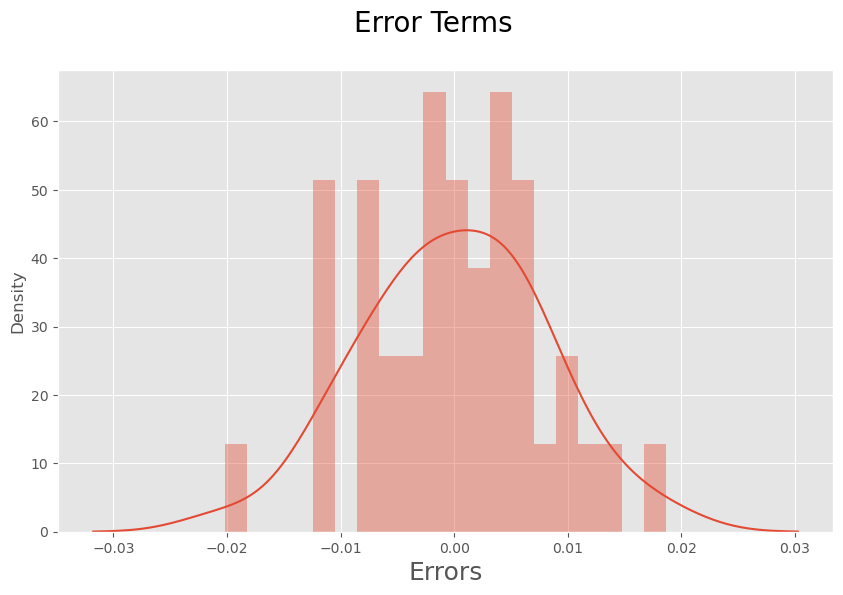

In [313]:
##Residual analysis
y_train_price = lr3.predict(X_train_lm2_3)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train2 - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### Model Evaluation

In [314]:
y_test = df2_test.pop('gmv')
X_test = df2_test

In [315]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'BoomBox', 'DJController', 'Dock', 'DockingStation',
       'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker', 'SlingBox', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

In [316]:
X_test.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,BoomBox,DJController,Dock,DockingStation,FMRadio,HiFiSystem,HomeAudioSpeaker,SlingBox,SoundMixer,VoiceRecorder
6,36,9,2015,0.244605,0.290300,0.663463,0.328685,0.275383,0.283422,0.141059,...,1.000000,0.0,1.000000,0.000000,0.833648,0.666667,0.416162,0.0,0.0,0.375000
36,66,4,2016,0.990932,0.356995,0.729638,0.222751,0.668837,0.773385,0.229379,...,0.447761,0.0,0.437500,0.526316,0.720227,0.454545,0.446061,0.0,0.0,0.894231
37,67,4,2016,0.912173,0.207337,0.674933,0.128442,0.684842,0.797143,0.230402,...,0.388060,0.0,0.666667,0.684211,0.725898,0.878788,0.379394,1.0,0.0,0.894231
28,58,2,2016,0.547775,0.324276,0.172513,0.988332,0.911965,1.000000,0.312876,...,0.492537,0.0,0.645833,0.210526,0.897921,0.515152,1.000000,0.0,0.0,0.730769
43,73,5,2016,0.240274,0.000000,0.813115,1.000000,1.000000,0.980171,0.745088,...,0.358209,0.0,0.020833,0.842105,0.551985,0.333333,0.381414,0.0,0.5,1.000000


In [317]:
X_test = X_test[X_train_lm2_3.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,BoomBox,HomeAudioSpeaker,VoiceRecorder
6,1.0,1.000000,0.416162,0.375000
36,1.0,0.447761,0.446061,0.894231
37,1.0,0.388060,0.379394,0.894231
28,1.0,0.492537,1.000000,0.730769
43,1.0,0.358209,0.381414,1.000000
49,1.0,0.462687,0.194343,0.240385
5,1.0,0.000000,0.000000,0.000000
33,1.0,0.582090,0.871515,0.798077
20,1.0,0.402985,0.960000,0.394231
42,1.0,0.402985,0.426263,0.932692


In [318]:
# Making predictions using the final model
y_pred = lr3.predict(X_test)

Text(0, 0.5, 'y_pred')

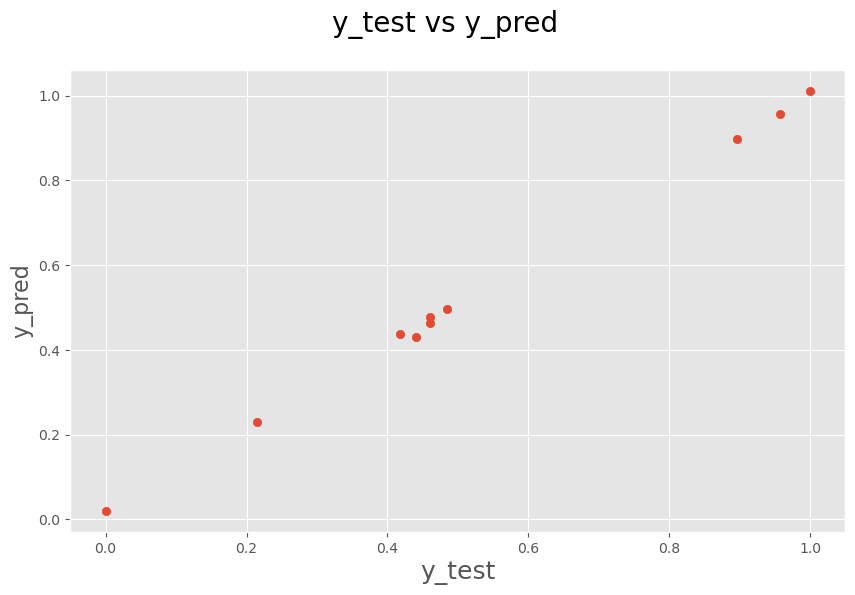

In [319]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [320]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr3.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2_3, y_train2, coefficients_df)

<AxesSubplot:xlabel='elasticity', ylabel='feature'>

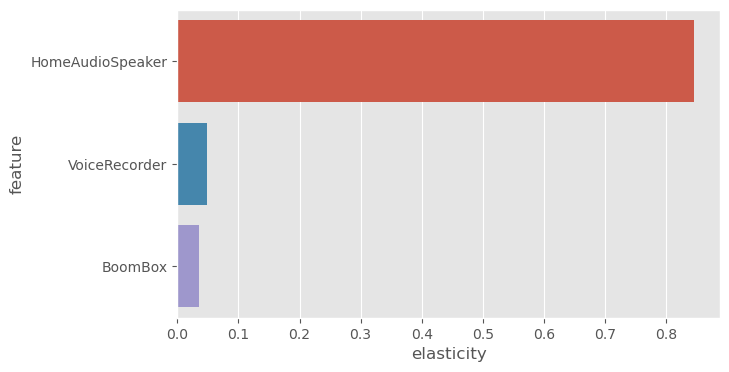

In [321]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

#### Building the Multiplicative models

##### Camera Accessory - Multiplicative model

In [322]:
# taking the camera accessory dataset
final_camera_data.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,13.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,433.0,0.0,226.0,17.0,0.0,366.0,0.0,0.0,13.0,16.0
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,491.0,0.0,188.0,23.0,0.0,382.0,0.0,0.0,24.0,22.0
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,457.0,0.0,194.0,18.0,0.0,423.0,0.0,0.0,23.0,30.0
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,363.0,0.0,112.0,26.0,0.0,233.0,0.0,0.0,23.0,13.0


In [323]:
final_camera_data.replace(0.0, 0.000001).head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
0,27,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,13.0,0.000001,0.000001,0.000001,0.000001,2.0,0.000001,0.000001,0.000001,0.000001
1,28,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,433.0,0.000001,226.000000,17.000000,0.000001,366.0,0.000001,0.000001,13.000000,16.000000
2,29,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,491.0,0.000001,188.000000,23.000000,0.000001,382.0,0.000001,0.000001,24.000000,22.000000
3,30,7,2015,0.100936,1.187350,3.475439,0.000437,0.622161,0.256525,2.354858,...,457.0,0.000001,194.000000,18.000000,0.000001,423.0,0.000001,0.000001,23.000000,30.000000
4,31,8,2015,0.052078,0.913194,2.003552,0.000220,0.343392,0.146684,1.805811,...,363.0,0.000001,112.000000,26.000000,0.000001,233.0,0.000001,0.000001,23.000000,13.000000


In [324]:
## Taking log and dropping the uncotrollable features for the company
df = np.log(final_camera_data.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [325]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [326]:
# scaling 
scaler = MinMaxScaler()

In [327]:
# checking the features in the dataset
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [328]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [329]:
# assigning x_traim amd y_train values
y_train = df_train.pop('gmv')
X_train = df_train

In [331]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=20)  # Create RFE object with Linear Regression estimator
rfe.fit(X_train, y_train)  # Fit RFE to your training data

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [332]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['order_week', 'adStock_TV', 'adStock_Digital',
       'adStock_Content Marketing', 'adStock_Online marketing', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'discount',
       'total_premiumness', 'Binoculars', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraTripod', 'Flash',
       'Lens', 'Telescope'],
      dtype='object')

In [333]:
# neglecting the features other than top 20 features given by rfe
X_train.columns[~rfe.support_]

Index(['Month', 'Year', 'adStock_Sponsorship', 'adStock_ Affiliates',
       'product_procurement_sla', 'NPS', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CameraAccessory', 'CameraEyeCup', 'CameraFilmRolls',
       'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'ExtensionTube', 'Filter', 'FlashShoeAdapter',
       'ReflectorUmbrella', 'Softbox', 'Strap'],
      dtype='object')

In [334]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [335]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4682.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.82e-32
Time:                        19:25:46   Log-Likelihood:                 188.50
No. Observations:                  41   AIC:                            -335.0
Df Residuals:                      20   BIC:                            -299.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,10241.62
7,adStock_Radio,3860.97
8,adStock_Other,3686.64
14,CameraBattery,1716.17
13,CameraBag,1705.36
15,CameraBatteryCharger,819.46
11,total_premiumness,674.36
12,Binoculars,664.75
17,CameraTripod,518.87
18,Flash,220.27


In [336]:
# Let's drop feature units with highest p-value 
X_train_new= X_train_rfe.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5116.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.78e-34
Time:                        19:26:09   Log-Likelihood:                 188.27
No. Observations:                  41   AIC:                            -336.5
Df Residuals:                      21   BIC:                            -302.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,8908.34
6,adStock_Radio,2077.60
7,adStock_Other,1978.67
12,CameraBag,1680.98
13,CameraBattery,1606.31
14,CameraBatteryCharger,819.38
11,Binoculars,649.76
10,total_premiumness,620.95
16,CameraTripod,516.64
17,Flash,207.26


In [337]:
# Let's drop featuree with highest p-value
X_train_new1 = X_train_new.drop(["Binoculars"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5430.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           5.66e-36
Time:                        19:26:25   Log-Likelihood:                 187.43
No. Observations:                  41   AIC:                            -336.9
Df Residuals:                      22   BIC:                            -304.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,8426.62
6,adStock_Radio,1627.13
12,CameraBattery,1604.70
7,adStock_Other,1557.36
11,CameraBag,1149.31
13,CameraBatteryCharger,812.49
10,total_premiumness,600.64
15,CameraTripod,507.53
16,Flash,202.60
17,Lens,187.87


In [338]:
# Let's drop feature  with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5506.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.95e-37
Time:                        19:26:42   Log-Likelihood:                 185.63
No. Observations:                  41   AIC:                            -335.3
Df Residuals:                      23   BIC:                            -304.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,7362.60
11,CameraBattery,1603.96
10,CameraBag,1125.96
12,CameraBatteryCharger,804.00
9,total_premiumness,599.85
14,CameraTripod,504.47
15,Flash,196.42
16,Lens,185.08
17,Telescope,151.54
4,adStock_Online marketing,109.85


In [339]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5932.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           3.43e-39
Time:                        19:27:10   Log-Likelihood:                 185.04
No. Observations:                  41   AIC:                            -336.1
Df Residuals:                      24   BIC:                            -307.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,6985.99
10,CameraBattery,1594.26
9,CameraBag,1117.30
11,CameraBatteryCharger,797.53
8,total_premiumness,554.66
13,CameraTripod,423.34
14,Flash,196.42
15,Lens,156.65
16,Telescope,151.14
4,adStock_Online marketing,108.68


In [340]:
# drop feature  with higest p-value
X_train_new4 = X_train_new3.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5903.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.63e-40
Time:                        19:27:25   Log-Likelihood:                 182.79
No. Observations:                  41   AIC:                            -333.6
Df Residuals:                      25   BIC:                            -306.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,5119.21
9,CameraBattery,1482.30
8,CameraBag,1021.26
10,CameraBatteryCharger,707.85
12,CameraTripod,411.34
7,total_premiumness,400.45
13,Flash,177.81
14,Lens,145.72
15,Telescope,112.76
4,adStock_Online marketing,108.22


In [341]:
# dropping the feature with highest p-value
X_train_new5 = X_train_new4.drop(["Telescope"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5900.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           8.03e-42
Time:                        19:27:41   Log-Likelihood:                 180.56
No. Observations:                  41   AIC:                            -331.1
Df Residuals:                      26   BIC:                            -305.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,5045.53
9,CameraBattery,1270.93
8,CameraBag,907.21
10,CameraBatteryCharger,693.95
12,CameraTripod,409.56
7,total_premiumness,400.03
13,Flash,135.07
14,Lens,134.34
4,adStock_Online marketing,100.37
11,CameraBatteryGrip,69.34


In [342]:
# dropping the feature with highest p-value
X_train_new6 = X_train_new5.drop(["Lens"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6227.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.10e-43
Time:                        19:28:04   Log-Likelihood:                 179.37
No. Observations:                  41   AIC:                            -330.7
Df Residuals:                      27   BIC:                            -306.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,4038.91
9,CameraBattery,1165.07
10,CameraBatteryCharger,532.70
8,CameraBag,455.15
12,CameraTripod,398.95
7,total_premiumness,143.21
13,Flash,123.61
4,adStock_Online marketing,96.95
11,CameraBatteryGrip,57.41
2,adStock_TV,39.82


In [343]:
# dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["CameraBattery"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6267.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.14e-44
Time:                        19:28:20   Log-Likelihood:                 177.12
No. Observations:                  41   AIC:                            -328.2
Df Residuals:                      28   BIC:                            -306.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,4014.05
9,CameraBatteryCharger,348.86
11,CameraTripod,334.90
8,CameraBag,315.26
7,total_premiumness,137.58
12,Flash,121.71
4,adStock_Online marketing,82.05
10,CameraBatteryGrip,57.41
2,adStock_TV,36.34
1,order_week,26.40


In [344]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["Flash"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6518.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           4.35e-46
Time:                        19:28:36   Log-Likelihood:                 175.42
No. Observations:                  41   AIC:                            -326.8
Df Residuals:                      29   BIC:                            -306.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,3372.30
9,CameraBatteryCharger,342.47
11,CameraTripod,320.75
8,CameraBag,296.17
7,total_premiumness,97.03
4,adStock_Online marketing,79.24
10,CameraBatteryGrip,38.83
2,adStock_TV,36.20
1,order_week,23.56
5,adStock_SEM,22.95


In [345]:
# dropping the feature with highest p-value
X_train_new9= X_train_new8.drop(["CameraBatteryGrip"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6994.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.18e-47
Time:                        19:28:51   Log-Likelihood:                 174.21
No. Observations:                  41   AIC:                            -326.4
Df Residuals:                      30   BIC:                            -307.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,3252.62
9,CameraBatteryCharger,341.31
10,CameraTripod,300.63
8,CameraBag,269.44
4,adStock_Online marketing,68.63
2,adStock_TV,33.19
1,order_week,23.35
5,adStock_SEM,20.71
7,total_premiumness,16.85
3,adStock_Digital,14.41


In [346]:
# dropping the feature with highest p-value
X_train_new10= X_train_new9.drop(["CameraBag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6598.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.66e-48
Time:                        19:29:19   Log-Likelihood:                 170.19
No. Observations:                  41   AIC:                            -320.4
Df Residuals:                      31   BIC:                            -303.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,3116.34
8,CameraBatteryCharger,255.33
9,CameraTripod,242.56
4,adStock_Online marketing,67.21
2,adStock_TV,28.05
1,order_week,22.35
5,adStock_SEM,20.71
7,total_premiumness,16.77
3,adStock_Digital,14.41
6,discount,5.23


In [347]:
# dropping the feature with highest p-value
X_train_new11= X_train_new10.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7045.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.12e-49
Time:                        19:29:37   Log-Likelihood:                 168.47
No. Observations:                  41   AIC:                            -318.9
Df Residuals:                      32   BIC:                            -303.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,3101.82
7,CameraBatteryCharger,255.33
8,CameraTripod,242.53
1,order_week,22.02
3,adStock_Online marketing,21.97
6,total_premiumness,16.74
4,adStock_SEM,11.81
2,adStock_Digital,7.74
5,discount,5.23


In [348]:
# dropping the feature with highest p-value
X_train_new12= X_train_new11.drop(["order_week"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6066.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.08e-49
Time:                        19:29:57   Log-Likelihood:                 162.04
No. Observations:                  41   AIC:                            -308.1
Df Residuals:                      33   BIC:                            -294.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
6,CameraBatteryCharger,79.64
0,const,53.51
7,CameraTripod,48.69
5,total_premiumness,14.90
3,adStock_SEM,9.47
1,adStock_Digital,7.06
2,adStock_Online marketing,4.36
4,discount,1.43


In [349]:
# # dropping the feature with highest vif
X_train_new13= X_train_new12.drop(["CameraBatteryCharger"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6437.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.93e-50
Time:                        19:30:13   Log-Likelihood:                 159.48
No. Observations:                  41   AIC:                            -305.0
Df Residuals:                      34   BIC:                            -293.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,51.14
3,adStock_SEM,8.79
1,adStock_Digital,7.05
5,total_premiumness,6.19
6,CameraTripod,5.01
2,adStock_Online marketing,4.30
4,discount,1.43


In [350]:
# dropping the feature with highest p-value
X_train_new14= X_train_new13.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6807.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           3.09e-51
Time:                        19:30:29   Log-Likelihood:                 156.30
No. Observations:                  41   AIC:                            -300.6
Df Residuals:                      35   BIC:                            -290.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1185      0.00

,Features,VIF
0,const,49.74
4,total_premiumness,5.59
2,adStock_SEM,5.00
5,CameraTripod,4.98
1,adStock_Digital,4.68
3,discount,1.42


In [351]:
# dropping the feature with highest vif
X_train_new15= X_train_new14.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7883.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.02e-52
Time:                        19:30:45   Log-Likelihood:                 154.16
No. Observations:                  41   AIC:                            -298.3
Df Residuals:                      36   BIC:                            -289.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1240      0.00

,Features,VIF
0,const,40.16
3,total_premiumness,4.91
4,CameraTripod,4.71
2,discount,1.21
1,adStock_SEM,1.16


In [352]:
# dropping the feature with highest vif
X_train_new16= X_train_new15.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new16)
  
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.042e+04
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           3.49e-54
Time:                        19:31:03   Log-Likelihood:                 153.41
No. Observations:                  41   AIC:                            -298.8
Df Residuals:                      37   BIC:                            -292.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1249      0.00

,Features,VIF
0,const,39.34
2,total_premiumness,4.84
3,CameraTripod,4.68
1,discount,1.21


In [353]:
# dropping the feature with highest p-value
X_train_new17= X_train_new16.drop(["total_premiumness"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new17)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     88.74
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           4.80e-15
Time:                        19:31:19   Log-Likelihood:                 50.818
No. Observations:                  41   AIC:                            -95.64
Df Residuals:                      38   BIC:                            -90.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0715      0.071     -1.011   

,Features,VIF
0,const,38.75
1,discount,1.17
2,CameraTripod,1.17


In [354]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 2 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9757094192634008
lr model 2 r2_score -0.2129552719803307


In [355]:
import numpy as np
from sklearn import metrics

# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.00016472933083790274
lr model 2 MSE 0.05948641535559037


######  linear model 1 performs much better than the second one, therefore we choose that as the best among the multiplicative models for Camera Category

#### Residual Analysis

In [356]:
y_train_price = lr1.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

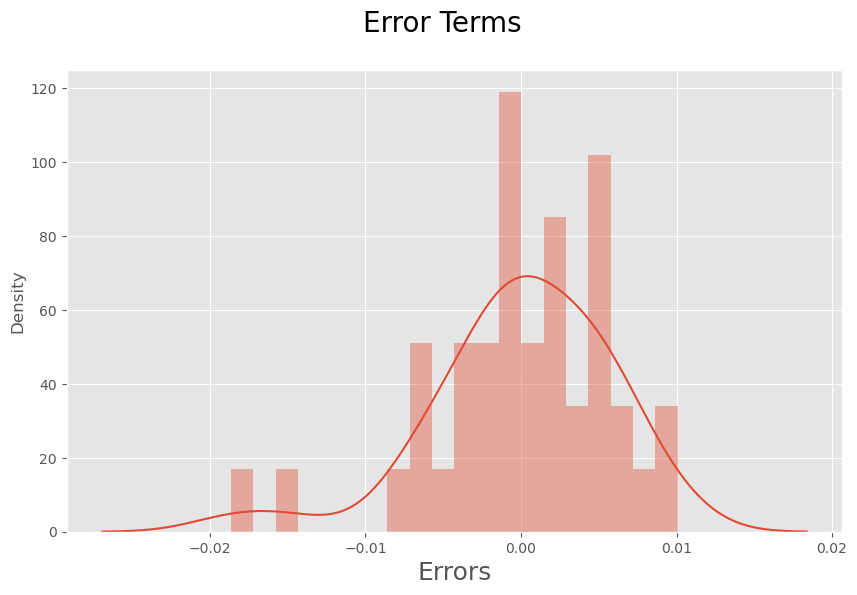

In [357]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Model Evaluation

In [358]:
y_test = df_test.pop('gmv')
X_test = df_test

In [359]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [360]:
X_test.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
6,3.496508,2.079442,7.608374,0.000000,0.528047,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
32,4.094345,0.693147,7.608871,0.848092,0.712667,0.562074,0.963253,0.968376,0.993137,0.467760,...,0.995349,0.000000,0.981238,0.982579,0.0,0.976999,0.0,0.000000,0.984941,0.956799
38,4.189655,1.386294,7.608871,0.998315,0.434195,0.858298,0.816250,0.912312,0.942289,0.352485,...,0.949417,0.940597,0.983239,0.978389,0.0,0.974892,0.0,0.952225,0.981384,0.977422
35,4.143135,1.098612,7.608871,1.000000,0.704939,0.855724,0.903255,0.915779,0.940687,0.378158,...,0.964899,1.000000,1.000000,0.980577,0.0,0.981170,1.0,0.000000,0.998661,0.983685
33,4.110874,0.693147,7.608871,0.840296,0.757672,0.575356,0.959803,0.966262,0.990927,0.475426,...,0.993964,0.966883,0.977960,0.994027,0.0,0.970778,0.0,0.952225,0.998661,0.978733


In [361]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,discount,total_premiumness,CameraTripod
6,1.0,1.000000,0.000000,0.000000
32,1.0,0.073731,8.686092,0.995349
38,1.0,0.166549,8.539150,0.949417
35,1.0,0.175447,8.581482,0.964899
33,1.0,0.258246,8.585786,0.993964
51,1.0,0.161667,7.491088,0.671571
5,1.0,0.171340,0.000000,0.000000
26,1.0,0.154162,8.508354,1.000000
25,1.0,0.000000,8.239857,0.976496
45,1.0,0.297622,8.488382,0.907066


In [362]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

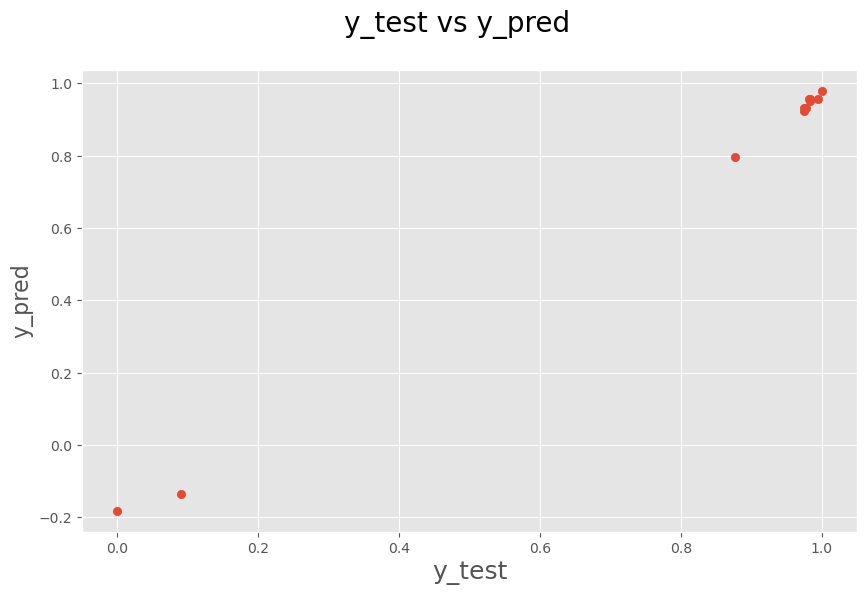

In [363]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [364]:
## Elasticity Analysis

coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

<AxesSubplot:xlabel='elasticity', ylabel='feature'>

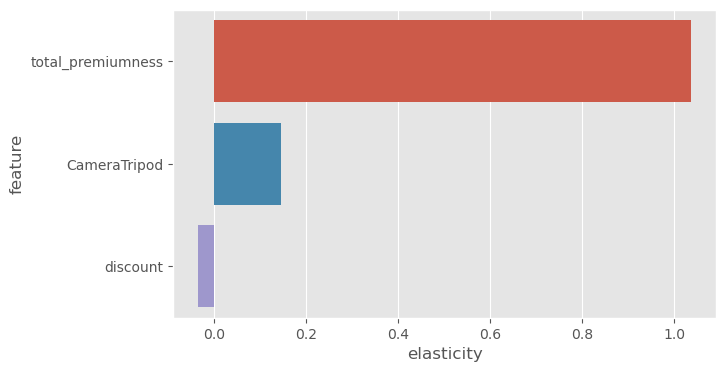

In [365]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

#### Gaming Accessory - Multiplicative model

In [366]:
# replacing '0.0' with '0.0000001' and taking log of the dataset to avaoid the nana values for log 0
df = np.log(final_gaming_data.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [367]:
df.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,product_procurement_sla,NPS,discount,total_premiumness,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day
0,3.295837,1.945910,7.608374,-2.921877,-0.456885,0.617112,-8.363510,-1.103164,-1.989137,0.227872,...,1.165752,4.000026,-1.151222,3.178054,0.000000,0.000000,-13.815511,-13.815511,0.000000,0.000000
1,3.332205,1.945910,7.608374,-2.516412,-0.051419,1.022577,-7.958044,-0.697699,-1.583672,0.633337,...,1.174963,4.000026,-0.868303,7.890583,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511
2,3.367296,1.945910,7.608374,-2.362261,0.102731,1.176728,-7.803894,-0.543549,-1.429521,0.787488,...,0.999081,4.000026,-0.797925,7.814803,-13.815511,-13.815511,0.693147,0.000000,0.000000,0.000000
3,3.401197,1.945910,7.608374,-2.293268,0.171724,1.245721,-7.734901,-0.474556,-1.360528,0.856481,...,0.951353,4.000026,-0.923857,7.682022,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511
4,3.433987,2.079442,7.608374,-2.955022,-0.090807,0.694922,-8.420842,-1.068883,-1.919477,0.591010,...,1.171037,4.000089,-0.771931,7.359468,-13.815511,-13.815511,-13.815511,-13.815511,0.000000,0.000000


In [368]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.20, random_state = 100)

In [369]:
# initialising scaler
scaler = MinMaxScaler()

In [370]:
# checking the columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day'],
      dtype='object')

In [371]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.20, random_state = 100)

In [372]:
# initialising scaler
scaler = MinMaxScaler()

In [373]:
# checking the columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day'],
      dtype='object')

In [374]:
# Apply scaler() to all the columns except the categorical features
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [375]:
# assigning the values for x_train and y_train
y_train = df_train.pop('gmv')
X_train = df_train

In [377]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=20)  # Create RFE object with Linear Regression estimator
rfe.fit(X_train, y_train)  # Fit RFE to your training data

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [378]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['order_week', 'Month', 'Year', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'product_procurement_sla', 'NPS', 'discount',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day'],
      dtype='object')

In [379]:
# neglecting the features not selected in top 20 by rfe
X_train.columns[~rfe.support_]

Index(['adStock_TV', 'total_pay_days', 'is_pay_day'], dtype='object')

In [380]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [381]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1159.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.38e-27
Time:                        20:38:43   Log-Likelihood:                 157.21
No. Observations:                  42   AIC:                            -272.4
Df Residuals:                      21   BIC:                            -235.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,5.673826e+11
7,adStock_Online marketing,1.452543e+04
8,adStock_ Affiliates,1.121200e+04
18,is_holiday,9.136540e+03
17,total_holidays,9.127990e+03
11,adStock_Other,2.802470e+03
10,adStock_Radio,2.036500e+03
20,is_special_sale_day,8.254500e+02
19,total_special_sale_days,8.185400e+02
3,Year,6.020800e+02


In [384]:
# Let's drop feature  with highest p-value
X_train_new= X_train_rfe.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1195.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           7.85e-29
Time:                        20:40:22   Log-Likelihood:                 155.81
No. Observations:                  42   AIC:                            -271.6
Df Residuals:                      22   BIC:                            -236.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,3.886602e+11
7,adStock_Online marketing,1.361235e+04
8,adStock_ Affiliates,1.041615e+04
17,is_holiday,7.920410e+03
16,total_holidays,7.910570e+03
11,adStock_Other,2.614690e+03
10,adStock_Radio,2.017870e+03
19,is_special_sale_day,7.952800e+02
18,total_special_sale_days,7.911200e+02
3,Year,4.123900e+02


In [385]:
# Let's drop with highest p-value
X_train_new1 = X_train_new.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1151.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.01e-29
Time:                        20:41:30   Log-Likelihood:                 152.95
No. Observations:                  42   AIC:                            -267.9
Df Residuals:                      23   BIC:                            -234.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,2.409824e+11
16,is_holiday,7.384630e+03
15,total_holidays,7.372910e+03
6,adStock_Online marketing,4.746060e+03
7,adStock_ Affiliates,4.541220e+03
10,adStock_Other,2.608440e+03
9,adStock_Radio,1.877130e+03
18,is_special_sale_day,7.823200e+02
17,total_special_sale_days,7.784100e+02
3,Year,2.557000e+02


In [386]:
# dropping the feature with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1205.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           5.24e-31
Time:                        20:43:09   Log-Likelihood:                 151.83
No. Observations:                  42   AIC:                            -267.7
Df Residuals:                      24   BIC:                            -236.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,2.119092e+11
15,is_holiday,7.263680e+03
14,total_holidays,7.250250e+03
9,adStock_Other,8.830500e+02
17,is_special_sale_day,7.812000e+02
16,total_special_sale_days,7.771400e+02
8,adStock_Radio,5.658400e+02
3,Year,2.248400e+02
1,order_week,5.619000e+01
6,adStock_Online marketing,3.844000e+01


In [387]:
# dropping the feature with highest p-value
X_train_new3= X_train_new2.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1274.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.49e-32
Time:                        20:43:55   Log-Likelihood:                 150.85
No. Observations:                  42   AIC:                            -267.7
Df Residuals:                      25   BIC:                            -238.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,31668.72
14,is_holiday,6989.44
13,total_holidays,6970.05
16,is_special_sale_day,764.10
15,total_special_sale_days,757.68
8,adStock_Other,626.12
7,adStock_Radio,555.31
1,order_week,45.94
5,adStock_Online marketing,33.41
2,Month,26.37


In [388]:
# dropping the feature with highest p-value
X_train_new4= X_train_new3.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1410.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           6.64e-34
Time:                        20:44:41   Log-Likelihood:                 150.81
No. Observations:                  42   AIC:                            -269.6
Df Residuals:                      26   BIC:                            -241.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,28961.00
13,is_holiday,6419.39
12,total_holidays,6409.28
15,is_special_sale_day,735.73
14,total_special_sale_days,731.15
7,adStock_Other,584.00
6,adStock_Radio,544.57
1,order_week,42.09
4,adStock_Online marketing,22.37
5,adStock_SEM,17.29


In [389]:
# dropping the feature with highest p-value
X_train_new5= X_train_new4.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1550.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.92e-35
Time:                        20:45:24   Log-Likelihood:                 150.55
No. Observations:                  42   AIC:                            -271.1
Df Residuals:                      27   BIC:                            -245.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,28432.79
12,is_holiday,6201.72
11,total_holidays,6187.70
14,is_special_sale_day,725.51
13,total_special_sale_days,721.41
6,adStock_Other,47.70
1,order_week,42.08
4,adStock_Online marketing,19.55
2,Month,17.11
5,adStock_SEM,10.34


In [390]:
# dropping the feature with highest vif
X_train_new6= X_train_new5.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     624.0
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           6.87e-31
Time:                        20:46:23   Log-Likelihood:                 129.18
No. Observations:                  42   AIC:                            -230.4
Df Residuals:                      28   BIC:                            -206.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,27260.67
11,is_holiday,5285.26
10,total_holidays,5265.47
13,is_special_sale_day,724.10
12,total_special_sale_days,720.74
6,adStock_Other,35.12
1,order_week,23.60
4,adStock_Online marketing,13.22
2,Month,12.80
5,adStock_SEM,9.23


In [391]:
# dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     656.8
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           6.34e-32
Time:                        20:47:17   Log-Likelihood:                 127.84
No. Observations:                  42   AIC:                            -229.7
Df Residuals:                      29   BIC:                            -207.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,25156.90
10,is_holiday,4531.46
9,total_holidays,4529.45
12,is_special_sale_day,688.58
11,total_special_sale_days,681.50
5,adStock_Other,25.05
1,order_week,13.05
2,Month,9.15
4,adStock_SEM,5.89
3,adStock_Digital,5.54


In [392]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["total_holidays"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     712.8
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           4.05e-33
Time:                        20:48:55   Log-Likelihood:                 127.02
No. Observations:                  42   AIC:                            -230.0
Df Residuals:                      30   BIC:                            -209.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,3636.46
11,is_special_sale_day,684.79
10,total_special_sale_days,677.34
5,adStock_Other,23.63
1,order_week,11.95
2,Month,8.86
3,adStock_Digital,5.20
4,adStock_SEM,5.19
8,total_premiumness,2.87
7,product_procurement_sla,2.78


In [393]:
# dropping the feature with highest p-value
X_train_new9= X_train_new8.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     683.4
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.90e-33
Time:                        20:50:00   Log-Likelihood:                 123.46
No. Observations:                  42   AIC:                            -224.9
Df Residuals:                      31   BIC:                            -205.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,3356.73
10,is_special_sale_day,672.24
9,total_special_sale_days,664.52
3,adStock_Digital,5.16
4,adStock_SEM,4.68
1,order_week,3.71
7,total_premiumness,2.81
6,product_procurement_sla,2.78
5,sla,2.44
2,Month,1.89


In [394]:
# dropping the feature with highest p-value
X_train_new10= X_train_new9.drop(["is_special_sale_day"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     781.0
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           6.93e-35
Time:                        20:50:48   Log-Likelihood:                 123.39
No. Observations:                  42   AIC:                            -226.8
Df Residuals:                      32   BIC:                            -209.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,746.34
3,adStock_Digital,4.95
4,adStock_SEM,4.66
1,order_week,3.64
7,total_premiumness,2.78
6,product_procurement_sla,2.57
5,sla,2.26
2,Month,1.72
9,total_special_sale_days,1.19
8,is_holiday,1.10


In [395]:
# dropping the feature with highest p-value
X_train_new11= X_train_new10.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     903.2
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.33e-36
Time:                        20:51:51   Log-Likelihood:                 123.32
No. Observations:                  42   AIC:                            -228.6
Df Residuals:                      33   BIC:                            -213.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,703.85
1,order_week,3.54
5,product_procurement_sla,2.56
6,total_premiumness,2.52
4,sla,2.26
2,Month,1.72
3,adStock_Digital,1.68
8,total_special_sale_days,1.17
7,is_holiday,1.10


In [396]:
# dropping the feature with highest p-value
X_train_new12= X_train_new11.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1062.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           7.06e-38
Time:                        20:52:58   Log-Likelihood:                 123.28
No. Observations:                  42   AIC:                            -230.6
Df Residuals:                      34   BIC:                            -216.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,289.13
5,total_premiumness,2.45
4,sla,2.06
1,order_week,1.75
3,adStock_Digital,1.67
2,Month,1.52
7,total_special_sale_days,1.17
6,is_holiday,1.08


In [397]:
# dropping the feature with highest p-value
X_train_new13= X_train_new12.drop(["order_week"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1026.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           8.27e-38
Time:                        20:53:44   Log-Likelihood:                 118.74
No. Observations:                  42   AIC:                            -223.5
Df Residuals:                      35   BIC:                            -211.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,52.84
4,total_premiumness,2.16
3,sla,2.05
1,Month,1.46
2,adStock_Digital,1.46
6,total_special_sale_days,1.17
5,is_holiday,1.06


In [398]:
# dropping the feature with highest p-value
X_train_new14= X_train_new13.drop(["total_premiumness"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     9.229
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.01e-05
Time:                        20:54:40   Log-Likelihood:                 27.382
No. Observations:                  42   AIC:                            -42.76
Df Residuals:                      36   BIC:                            -32.34
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,49.05
2,adStock_Digital,1.42
1,Month,1.38
5,total_special_sale_days,1.15
3,sla,1.11
4,is_holiday,1.04


In [399]:
# dropping the feature with highest p-value
X_train_new15= X_train_new14.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     11.26
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           4.47e-06
Time:                        20:55:27   Log-Likelihood:                 26.779
No. Observations:                  42   AIC:                            -43.56
Df Residuals:                      37   BIC:                            -34.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,48.49
4,total_special_sale_days,1.08
2,sla,1.07
1,Month,1.04
3,is_holiday,1.04


In [400]:
# dropping the feature with highest p-value
X_train_new16= X_train_new15.drop(["is_holiday"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new16)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     14.98
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.37e-06
Time:                        20:56:54   Log-Likelihood:                 26.446
No. Observations:                  42   AIC:                            -44.89
Df Residuals:                      38   BIC:                            -37.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,43.21
2,sla,1.07
3,total_special_sale_days,1.06
1,Month,1.01


#### Home Audio - Multiplicative model

In [402]:
#Creating df with removal of features uncontrollable by the company, also, replacing 0.0 with lowest value to handle infinity given by log
df = np.log(final_home_audio_data.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [403]:
#Checking the dataset
df.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,BoomBox,DJController,Dock,DockingStation,FMRadio,HiFiSystem,HomeAudioSpeaker,SlingBox,SoundMixer,VoiceRecorder
0,3.295837,1.945910,7.608374,-2.921877,-0.456885,0.617112,-8.363510,-1.103164,-1.989137,0.227872,...,1.386294,-13.815511,-13.815511,-13.815511,0.693147,-13.815511,3.258097,-13.815511,-13.815511,-13.815511
1,3.332205,1.945910,7.608374,-2.516412,-0.051419,1.022577,-7.958044,-0.697699,-1.583672,0.633337,...,4.094345,-13.815511,3.401197,0.000000,6.169611,2.564949,7.155396,-13.815511,-13.815511,3.218876
2,3.367296,1.945910,7.608374,-2.362261,0.102731,1.176728,-7.803894,-0.543549,-1.429521,0.787488,...,4.043051,-13.815511,3.912023,0.000000,6.276643,3.295837,7.320527,-13.815511,-13.815511,3.258097
3,3.401197,1.945910,7.608374,-2.293268,0.171724,1.245721,-7.734901,-0.474556,-1.360528,0.856481,...,4.174387,-13.815511,4.025352,-13.815511,6.232448,2.995732,7.194437,-13.815511,-13.815511,3.091042
4,3.433987,2.079442,7.608374,-2.955022,-0.090807,0.694922,-8.420842,-1.068883,-1.919477,0.591010,...,3.610918,-13.815511,3.784190,-13.815511,5.918894,2.397895,6.844815,-13.815511,-13.815511,2.772589


In [404]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [405]:
scaler = MinMaxScaler()

In [406]:
#Checking columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [407]:
# Apply scaler() to all the columns except the categorical ones
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [408]:
y_train = df_train.pop('gmv')
X_train = df_train

In [409]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=20)  # Create RFE object with Linear Regression estimator
rfe.fit(X_train, y_train)  # Fit RFE to your training data

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [410]:
#Extracting selected columns by RFE into a list
col = X_train.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'NPS', 'BoomBox', 'Dock', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'HomeAudioSpeaker', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [411]:
#Columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'product_procurement_sla', 'discount',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'DJController', 'SlingBox'],
      dtype='object')

In [412]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [413]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2749.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           8.77e-29
Time:                        21:04:08   Log-Likelihood:                 182.68
No. Observations:                  40   AIC:                            -323.4
Df Residuals:                      19   BIC:                            -287.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,3.174567e+11
6,adStock_Online marketing,1.851995e+04
7,adStock_ Affiliates,1.557983e+04
10,adStock_Other,2.940140e+03
9,adStock_Radio,2.868780e+03
1,Year,3.366700e+02
5,adStock_Content Marketing,3.217500e+02
20,VoiceRecorder,1.943300e+02
2,adStock_TV,1.409600e+02
14,Dock,1.391100e+02


In [414]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3045.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.55e-30
Time:                        21:04:22   Log-Likelihood:                 182.67
No. Observations:                  40   AIC:                            -325.3
Df Residuals:                      20   BIC:                            -291.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,3.082335e+11
6,adStock_ Affiliates,4.275460e+03
5,adStock_Online marketing,4.009960e+03
9,adStock_Other,2.575540e+03
8,adStock_Radio,2.328760e+03
1,Year,3.268900e+02
19,VoiceRecorder,1.839900e+02
13,Dock,1.368400e+02
2,adStock_TV,1.099400e+02
16,HiFiSystem,1.075600e+02


In [415]:
# Let's drop feature with highest p-value
X_train_new1 = X_train_new.drop(["DockingStation"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3309.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           3.20e-32
Time:                        21:04:35   Log-Likelihood:                 182.28
No. Observations:                  40   AIC:                            -326.6
Df Residuals:                      21   BIC:                            -294.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,3.080754e+11
6,adStock_ Affiliates,4.224390e+03
5,adStock_Online marketing,3.937830e+03
9,adStock_Other,2.575490e+03
8,adStock_Radio,2.326980e+03
1,Year,3.267200e+02
18,VoiceRecorder,1.622500e+02
13,Dock,1.128000e+02
2,adStock_TV,1.089800e+02
15,HiFiSystem,1.075600e+02


In [416]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["VoiceRecorder"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3564.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           7.11e-34
Time:                        21:04:51   Log-Likelihood:                 181.69
No. Observations:                  40   AIC:                            -327.4
Df Residuals:                      22   BIC:                            -297.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,2.212419e+11
6,adStock_ Affiliates,4.053250e+03
5,adStock_Online marketing,3.842800e+03
8,adStock_Radio,2.139960e+03
9,adStock_Other,2.125410e+03
1,Year,2.346300e+02
2,adStock_TV,9.643000e+01
15,HiFiSystem,7.232000e+01
13,Dock,6.337000e+01
14,FMRadio,4.389000e+01


In [417]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["BoomBox"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3874.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.41e-35
Time:                        21:05:07   Log-Likelihood:                 181.26
No. Observations:                  40   AIC:                            -328.5
Df Residuals:                      23   BIC:                            -299.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,2.140494e+11
6,adStock_ Affiliates,3.603920e+03
5,adStock_Online marketing,3.451380e+03
8,adStock_Radio,2.134890e+03
9,adStock_Other,2.091200e+03
1,Year,2.270100e+02
2,adStock_TV,9.536000e+01
14,HiFiSystem,7.138000e+01
12,Dock,6.335000e+01
13,FMRadio,4.236000e+01


In [418]:
# Let's drop feature with higest p-value
X_train_new4 = X_train_new3.drop(["Dock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4210.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.79e-37
Time:                        21:05:22   Log-Likelihood:                 180.78
No. Observations:                  40   AIC:                            -329.6
Df Residuals:                      24   BIC:                            -302.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,2.054000e+11
6,adStock_ Affiliates,3.290470e+03
5,adStock_Online marketing,3.196010e+03
8,adStock_Radio,2.130160e+03
9,adStock_Other,2.089570e+03
1,Year,2.178300e+02
2,adStock_TV,8.774000e+01
12,FMRadio,3.933000e+01
13,HiFiSystem,2.961000e+01
7,adStock_SEM,2.227000e+01


In [419]:
# Let's drop feature with higest p-value
X_train_new5 = X_train_new4.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4170.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.76e-38
Time:                        21:05:39   Log-Likelihood:                 178.39
No. Observations:                  40   AIC:                            -326.8
Df Residuals:                      25   BIC:                            -301.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1162.1527    

,Features,VIF
0,const,2.013457e+11
7,adStock_Radio,2.130000e+03
8,adStock_Other,2.089500e+03
1,Year,2.135300e+02
2,adStock_TV,6.519000e+01
5,adStock_ Affiliates,4.857000e+01
11,FMRadio,3.767000e+01
12,HiFiSystem,2.538000e+01
6,adStock_SEM,2.217000e+01
3,adStock_Digital,1.780000e+01


In [420]:
# Let's drop feature with higest p-value
X_train_new6 = X_train_new5.drop(["HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4170.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.09e-39
Time:                        21:07:48   Log-Likelihood:                 176.13
No. Observations:                  40   AIC:                            -324.3
Df Residuals:                      26   BIC:                            -300.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1334.4135    

,Features,VIF
0,const,1.697774e+11
8,adStock_Other,1.679240e+03
7,adStock_Radio,1.481730e+03
1,Year,1.800500e+02
2,adStock_TV,5.892000e+01
5,adStock_ Affiliates,4.663000e+01
11,FMRadio,2.691000e+01
6,adStock_SEM,1.985000e+01
10,NPS,1.429000e+01
3,adStock_Digital,1.258000e+01


In [421]:
# Let's drop feature with higest p-value
X_train_new7= X_train_new6.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4274.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           5.43e-41
Time:                        21:08:48   Log-Likelihood:                 174.27
No. Observations:                  40   AIC:                            -322.5
Df Residuals:                      27   BIC:                            -300.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1322.7674    

,Features,VIF
0,const,1.696207e+11
1,Year,1.798800e+02
7,adStock_Other,1.576400e+02
5,adStock_ Affiliates,4.173000e+01
2,adStock_TV,3.742000e+01
10,FMRadio,2.527000e+01
6,adStock_SEM,1.888000e+01
11,HomeAudioSpeaker,1.178000e+01
9,NPS,1.177000e+01
3,adStock_Digital,1.130000e+01


In [422]:
# Let's drop feature with higest p-value
X_train_new8= X_train_new7.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4660.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.27e-42
Time:                        21:09:04   Log-Likelihood:                 173.53
No. Observations:                  40   AIC:                            -323.1
Df Residuals:                      28   BIC:                            -302.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1467.3019    

,Features,VIF
0,const,1.118587e+11
1,Year,1.186200e+02
7,adStock_Other,1.179600e+02
5,adStock_ Affiliates,3.969000e+01
2,adStock_TV,3.725000e+01
9,FMRadio,2.458000e+01
6,adStock_SEM,1.749000e+01
10,HomeAudioSpeaker,1.172000e+01
3,adStock_Digital,1.086000e+01
8,sla,8.620000e+00


In [423]:
# Let's drop feature with higest VIF

X_train_new9= X_train_new8.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1812.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           9.72e-38
Time:                        21:09:21   Log-Likelihood:                 152.05
No. Observations:                  40   AIC:                            -282.1
Df Residuals:                      29   BIC:                            -263.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0073    

,Features,VIF
0,const,44.69
4,adStock_ Affiliates,34.08
1,adStock_TV,30.96
8,FMRadio,23.67
5,adStock_SEM,13.81
9,HomeAudioSpeaker,10.98
2,adStock_Digital,8.85
7,sla,8.41
3,adStock_Sponsorship,6.57
6,adStock_Other,3.01


In [424]:
# Let's drop feature with higest p-value
X_train_new10= X_train_new9.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2072.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.22e-39
Time:                        21:09:38   Log-Likelihood:                 151.94
No. Observations:                  40   AIC:                            -283.9
Df Residuals:                      30   BIC:                            -267.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0061    

,Features,VIF
0,const,35.63
1,adStock_TV,22.47
7,FMRadio,20.56
4,adStock_ Affiliates,19.28
8,HomeAudioSpeaker,10.19
6,sla,7.20
3,adStock_Sponsorship,4.78
5,adStock_Other,3.00
2,adStock_Digital,2.33
9,SoundMixer,2.22


In [425]:
# Let's drop feature with higest p-value
X_train_new11= X_train_new10.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2405.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           4.46e-41
Time:                        21:09:55   Log-Likelihood:                 151.91
No. Observations:                  40   AIC:                            -285.8
Df Residuals:                      31   BIC:                            -270.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0062    

,Features,VIF
0,const,35.50
3,adStock_ Affiliates,18.69
1,adStock_TV,18.19
6,FMRadio,17.61
7,HomeAudioSpeaker,9.55
5,sla,6.00
4,adStock_Other,2.36
2,adStock_Digital,2.07
8,SoundMixer,1.80


In [426]:
# Let's drop feature with higest p-value
X_train_new12= X_train_new11.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2812.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           9.19e-43
Time:                        21:10:07   Log-Likelihood:                 151.74
No. Observations:                  40   AIC:                            -287.5
Df Residuals:                      32   BIC:                            -274.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0061    

,Features,VIF
0,const,35.44
5,FMRadio,15.67
6,HomeAudioSpeaker,7.85
4,sla,5.88
3,adStock_Other,2.35
2,adStock_ Affiliates,2.32
1,adStock_Digital,1.93
7,SoundMixer,1.27


In [427]:
# Let's drop feature with higest p-value
X_train_new13= X_train_new12.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3324.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.02e-44
Time:                        21:10:20   Log-Likelihood:                 151.39
No. Observations:                  40   AIC:                            -288.8
Df Residuals:                      33   BIC:                            -276.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0055    

,Features,VIF
0,const,34.78
4,FMRadio,15.67
5,HomeAudioSpeaker,7.72
3,sla,5.87
1,adStock_ Affiliates,2.28
2,adStock_Other,1.49
6,SoundMixer,1.26


In [428]:
# Let's drop feature with higest p-value
X_train_new14= X_train_new13.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3821.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.02e-45
Time:                        21:10:31   Log-Likelihood:                 149.93
No. Observations:                  40   AIC:                            -287.9
Df Residuals:                      34   BIC:                            -277.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0069    

,Features,VIF
0,const,33.96
3,FMRadio,15.65
4,HomeAudioSpeaker,7.67
2,sla,5.50
1,adStock_ Affiliates,2.24
5,SoundMixer,1.20


In [429]:
# Let's drop feature with higest VIF
X_train_new15= X_train_new14.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4608.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           4.23e-47
Time:                        21:10:43   Log-Likelihood:                 148.64
No. Observations:                  40   AIC:                            -287.3
Df Residuals:                      35   BIC:                            -278.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0066      0.006  

,Features,VIF
0,const,33.91
2,FMRadio,12.51
3,HomeAudioSpeaker,7.67
1,sla,3.35
4,SoundMixer,1.15


In [430]:
# Let's drop feature with higest p-value
X_train_new16= X_train_new15.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2701.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.05e-42
Time:                        21:10:57   Log-Likelihood:                 131.69
No. Observations:                  40   AIC:                            -255.4
Df Residuals:                      36   BIC:                            -248.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0186      0.008  

,Features,VIF
0,const,30.76
1,sla,1.48
2,HomeAudioSpeaker,1.38
3,SoundMixer,1.08


In [431]:
# k-fold Cross validation
lm = LinearRegression()
scores = cross_val_score(lm, X_train_lm, y_train, scoring='r2', cv=10)
scores.mean()

0.9042747917062668

#### Residual Analysis

In [432]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

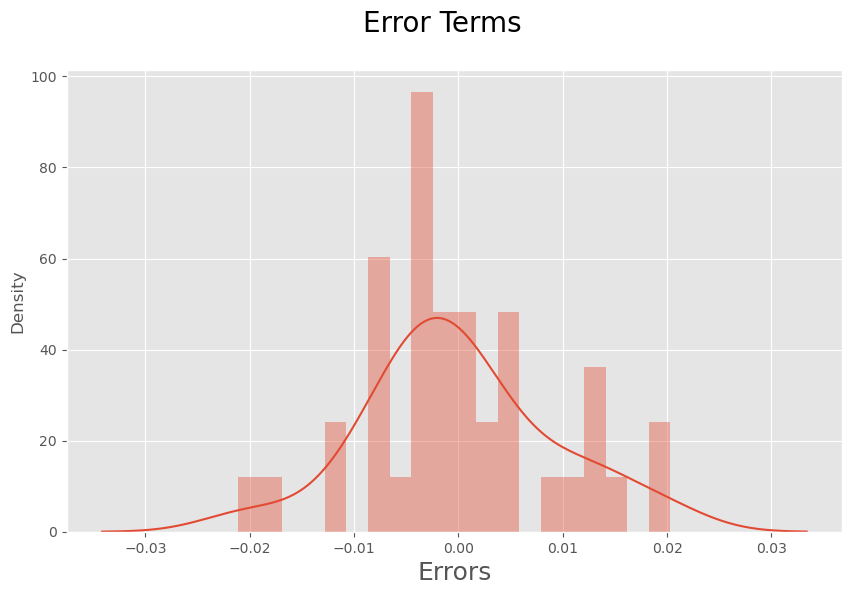

In [433]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<AxesSubplot:xlabel='elasticity', ylabel='feature'>

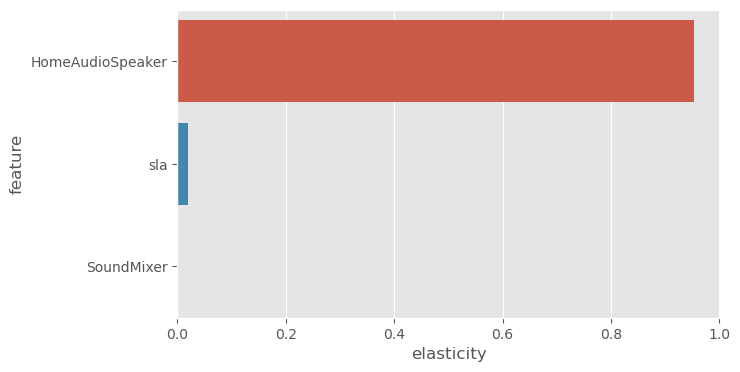

In [434]:
## Elasticity

coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)

plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

#### Model Evaluation

In [435]:
X_test = df_test
y_test = df_test.pop('gmv')

In [436]:
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,sla,HomeAudioSpeaker,SoundMixer
6,1.0,0.429915,0.887885,0.000000
36,1.0,0.390431,0.896755,0.000000
37,1.0,0.473084,0.876060,0.000000
28,1.0,0.255891,1.000000,0.000000
43,1.0,0.291969,0.876738,0.954404
49,1.0,0.000000,0.790585,0.000000
5,1.0,1.000000,0.000000,0.000000
33,1.0,0.363384,0.982409,0.000000
20,1.0,0.268393,0.994778,0.000000
42,1.0,0.302368,0.890951,1.000000


In [437]:
# Making predictions using the fourth model
y_pred = lr.predict(X_test)

Text(0, 0.5, 'y_pred')

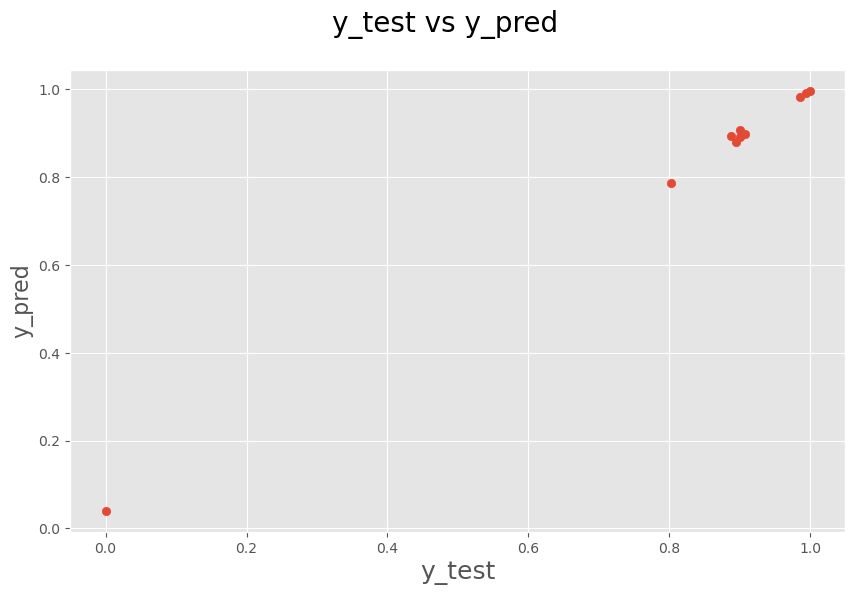

In [438]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      